In [2]:
import math

arr_rate = 1
mu_s = 10
mu_b = 1
ps = 0.9
pb = 0.1
lambda_s = arr_rate
lambda_b = arr_rate
max_k = 4

def calc_t_plus(i,j,big):
    ks = []
    total_q = 0
    if i>0:
        q = min(i,max_k)*mu_s
        ks.append([i-1,j,big,q])
        total_q += q
    if j>0:
        q = lambda_s
        ks.append([i+1,j-1,big,q])
        total_q += q
    else:
        if not big:
            q = lambda_b
            ks.append([i,j,True,q])
            total_q += q
    #total_p += lambda_b
    if total_q == 0:
        return 0
    total_t = 1/total_q
    for k in ks:
        pik = k[3]/total_q
        total_t += pik*calc_t_plus(k[0],k[1],k[2])
    #total_t = (total_t * pow(ps,j))# + (1/lambda_b)
    return total_t

def calc_t(i,j):
    ks = []
    total_q = 0
    if i>0:
        q = min(i,max_k)*mu_s
        ks.append([i-1,j,q])
        total_q += q
    if j>0:
        q = lambda_s
        ks.append([i+1,j-1,q])
        total_q += q
    #total_p += lambda_b
    if total_q == 0:
        return 0
    total_t = 1/total_q
    for k in ks:
        pik = k[2]/total_q
        total_t += pik*calc_t(k[0],k[1])
    #total_t = (total_t * pow(ps,j))# + (1/lambda_b)
    return total_t

simulation MTTA: 1.0948851073080508
model MTTA: 1.1045454545454545
-----
[ext] simulation MTTA: 2.002452509683619
[ext] model MTTA: 2.00970090515545


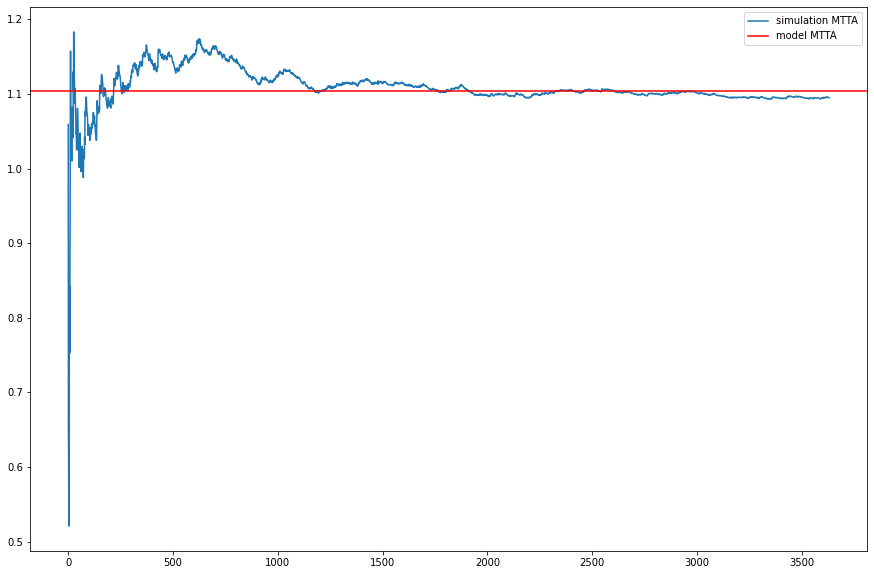

In [97]:
abs_time[0][0] = [0]
xb = 1
xa = 1
print('simulation MTTA: '+str(mean(abs_time[xb][xa])))
print('model MTTA: '+str(calc_t(xb,xa)))
print('-----')
print('[ext] simulation MTTA: '+str(mean(abs_plus[xb][xa])))
print('[ext] model MTTA: '+str(calc_t_plus(xb,xa,False)))


avg_abs = []
n = 1
tot = 0
for a in abs_time[xb][xa]:
    tot += a
    avg_abs.append(tot/n)
    n += 1
avg_plus = []
n = 1
tot = 0
for a in abs_plus[xb][xa]:
    tot += a
    avg_plus.append(tot/n)
    n += 1

plt.figure(figsize=(15,10))
plt.plot([i for i in range(len(avg_abs))], avg_abs, label = "simulation MTTA")
plt.axhline(y = calc_t(xb,xa), color = 'r', label = "model MTTA")
#plt.plot([i for i in range(len(avg_plus))], avg_plus, label = "Absorption time + big job arrives")
#plt.axhline(y = calc_t_plus(xb,xa,False), color = 'g', label = "(approximation) Absorption time")
plt.legend()
plt.show()

In [30]:
(1/6)+((2/6)*(1/4))+((4/6)*(1/2))

0.5833333333333333

In [155]:
mean(abs_time[1][2])-mean(abs_time[0][2])

0.007396364558361235

In [190]:
oz = 1*(1/4)
zo = 1*(1/2)+oz


tz = (0.603/(1))*((3/8)+0)+((0.465/(1))*((1/4)+oz))

(0.03)*((1/2)+tz)+((0.19)*((3/4)+oz))+((0.38)*((1/4)+zo))#+((0.98)*((1)+0))

0.59875875

In [2]:
import numpy as np
import queue
from statistics import mean
import matplotlib.pyplot as plt
import math
import random
import time
import statistics
import scipy.stats as sct
from tabulate import tabulate
import seaborn as sns
import pickle

def avl_server(t,servers):
    low = len(servers)
    i = 0
    for s in servers:
        if t > s[1]:
            if low == len(servers):
                low = i
            elif s[1] < servers[low][1]:
                low = i
        i += 1
    if low < len(servers):
        return low #return server with earliest idle time
    return len(servers)

def get_avl_servers(t,servers,n):
    empty = []
    i = 0
    for s in servers:
        if t >= s[1]: #get empty servers
            empty.append((i,s[1]))
        i += 1
    empty.sort(key = lambda x: x[1])
    return empty[:n] #return the [server index,free time]

def busy_server_n(t,servers):
    n = 0
    i = 0
    jobs = dict()
    jobs['big'] = []
    jobs['small'] = []
    jobs[''] = []
    for s in servers:
        if s[1] == 0:
            continue
        if t < s[1] and t >= s[0]: #get busy server
            n += 1
            #print(jobs)
            #print(s)
            #print(s[2])
            job_type = s[2].split('_')[0]
            #print(jobs[job_type])
            jobs[job_type].append(s[2])
            #print(jobs)
            #print('-----------')
        i+=1
    big_job_n = len(list(set(jobs['big'])))
    small_job_n = len(list(set(jobs['small'])))
    return (n,small_job_n,big_job_n) #reverse

def queue_counter(q,big_job_size):
    small_jobs = 0
    big_jobs = 0
    for job in q:
        if job[1] == big_job_size:
            big_jobs += 1
        else:
            small_jobs += 1
    return ((small_jobs,big_jobs))

def get_job_size(max_size, pb):
    limit = pb*100
    randn = random.randint(1,100)
    if randn > limit:
        return 1
    return max_size

def get_srv_rate(job_size, max_size, sm, bg):
    if job_size == 1:
        return sm
    elif job_size == max_size:
        return bg

pb: 0.01, µb: 0.05
Total time --- 2.4053518772125244 seconds ---


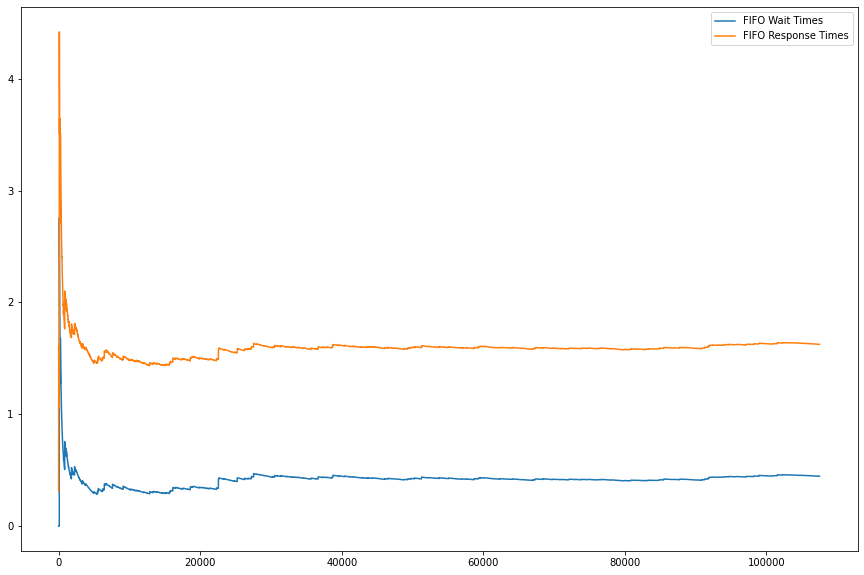

pb: 0.01, µb: 0.1
Total time --- 2.401949167251587 seconds ---


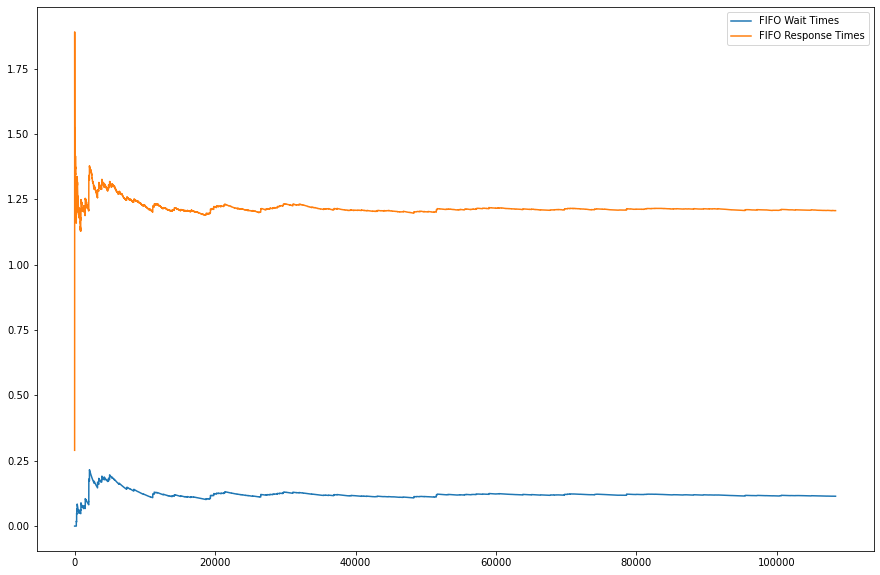

pb: 0.01, µb: 0.2
Total time --- 2.3547000885009766 seconds ---


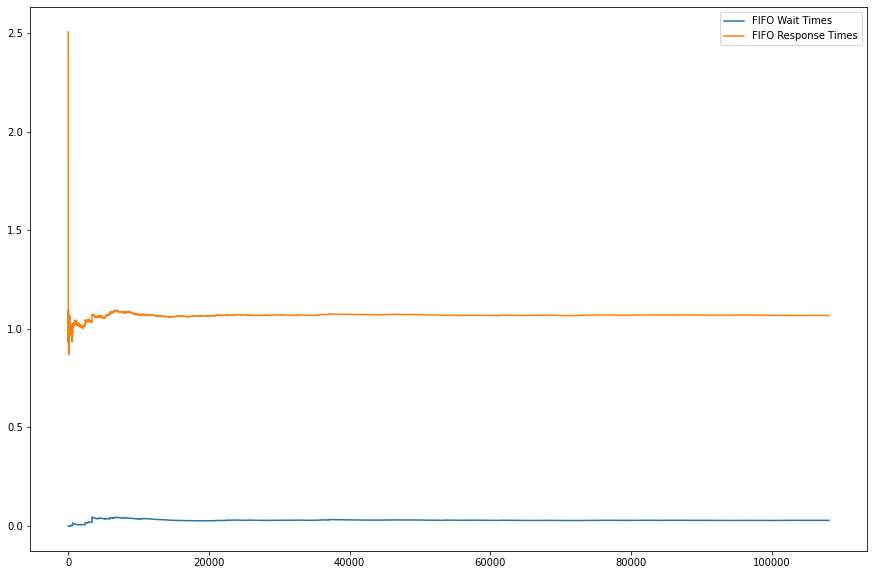

pb: 0.01, µb: 0.5
Total time --- 2.342447280883789 seconds ---


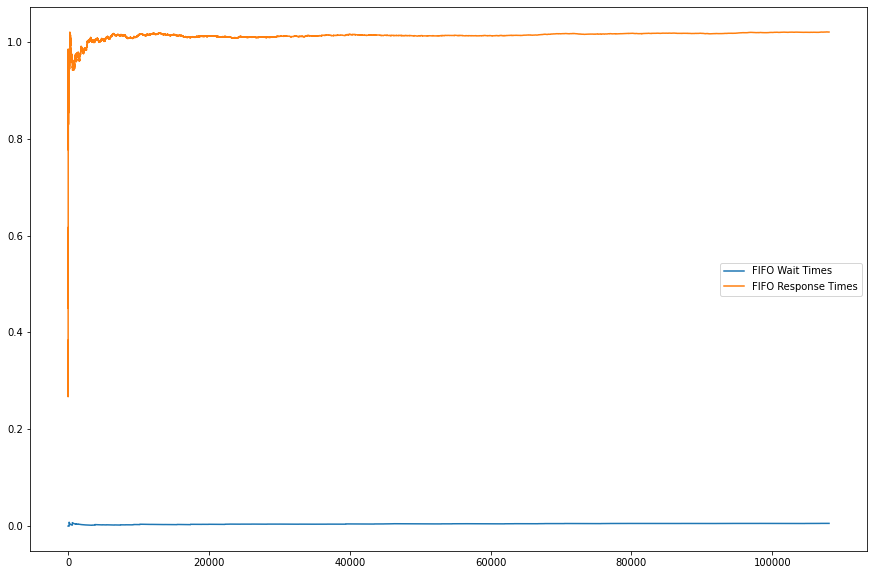

pb: 0.01, µb: 1
Total time --- 2.3683760166168213 seconds ---


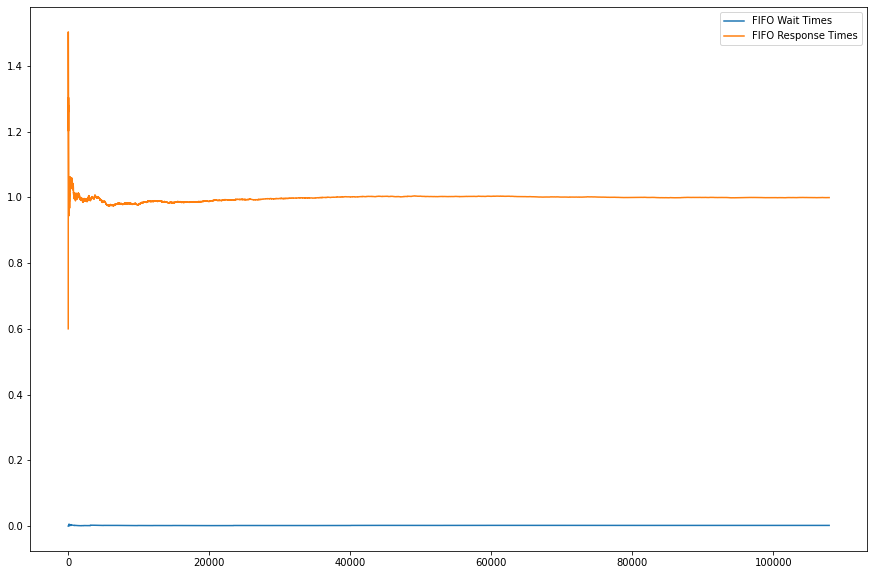

pb: 0.01, µb: 2
Total time --- 2.423952102661133 seconds ---


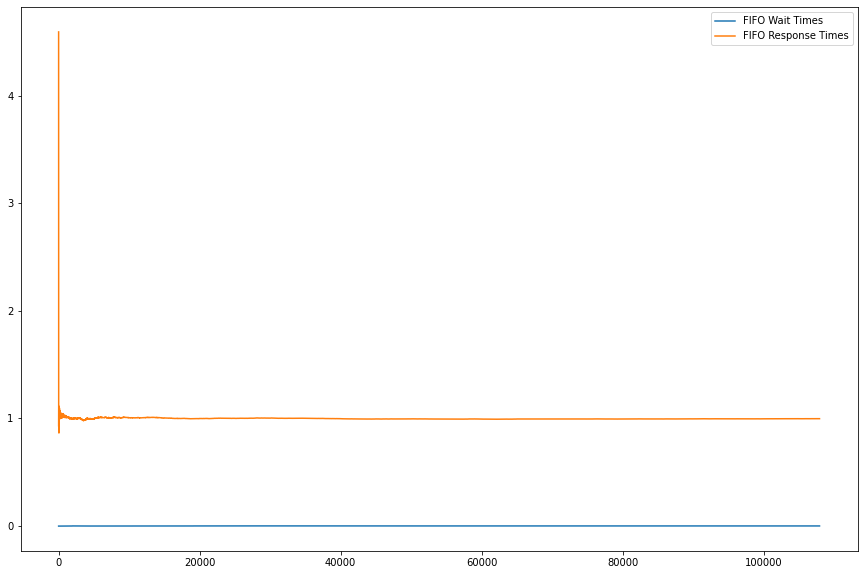

pb: 0.05, µb: 0.05
Total time --- 2.542732000350952 seconds ---


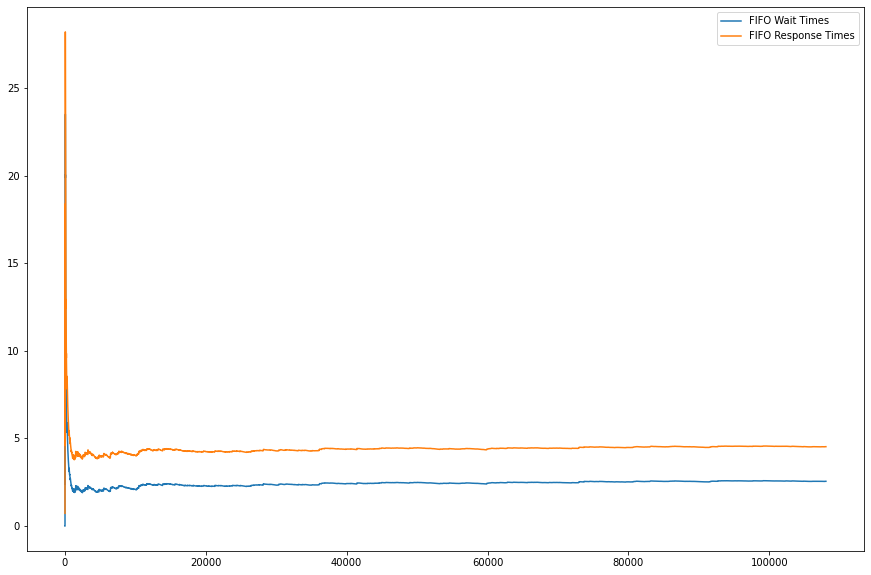

pb: 0.05, µb: 0.1
Total time --- 2.5034642219543457 seconds ---


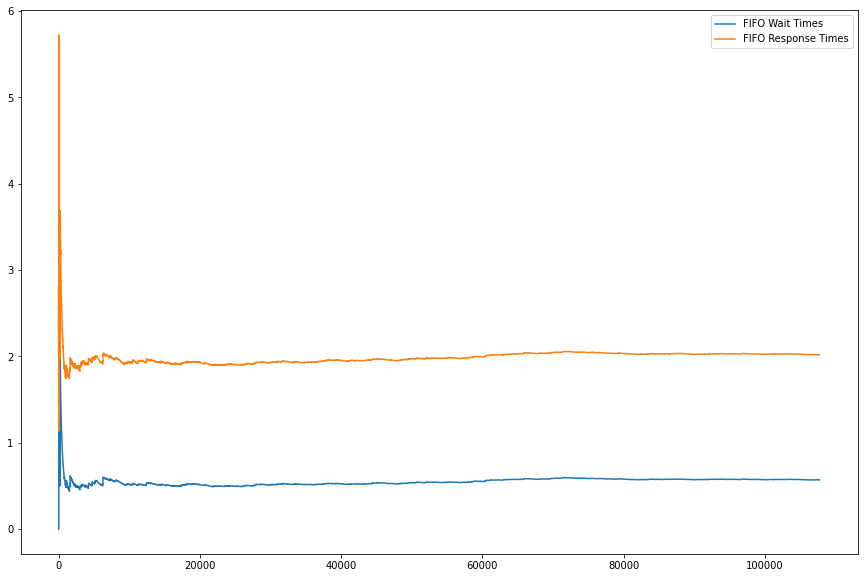

pb: 0.05, µb: 0.2
Total time --- 2.4235665798187256 seconds ---


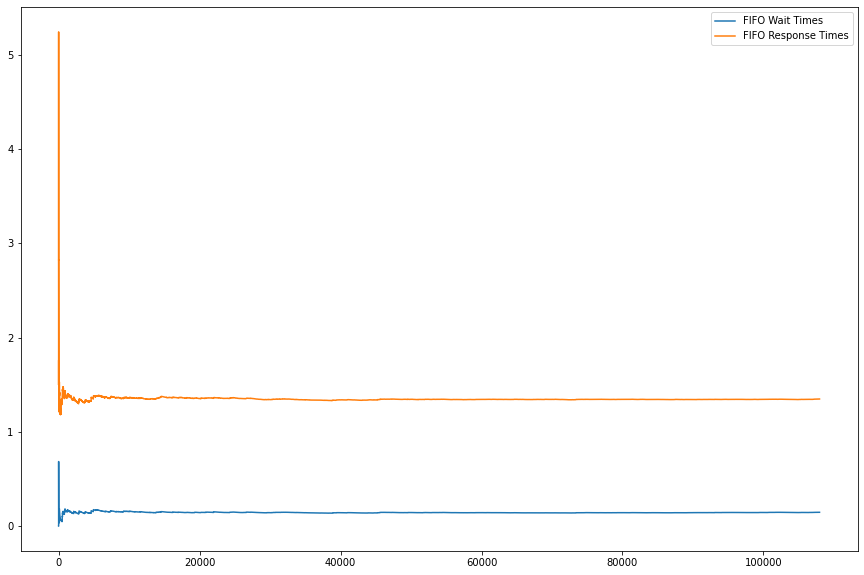

pb: 0.05, µb: 0.5
Total time --- 2.437755584716797 seconds ---


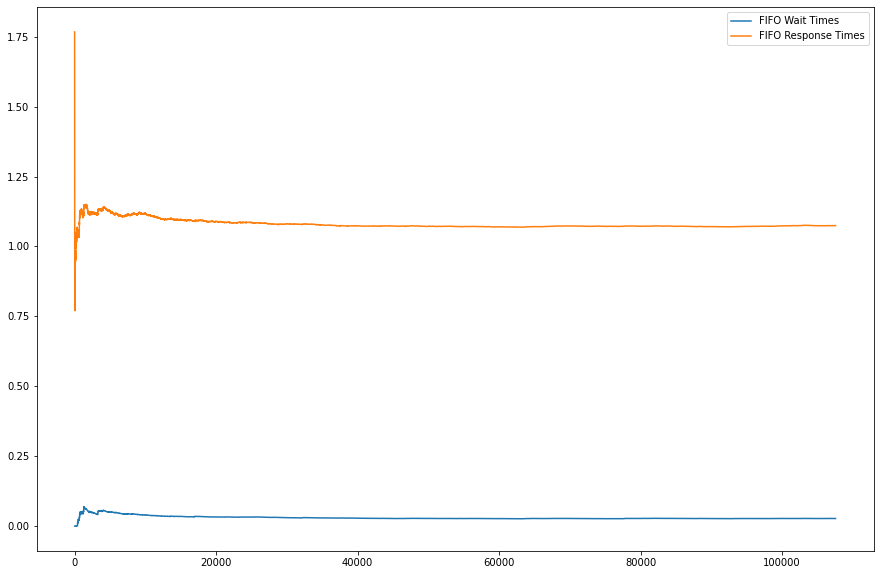

pb: 0.05, µb: 1
Total time --- 2.4335598945617676 seconds ---


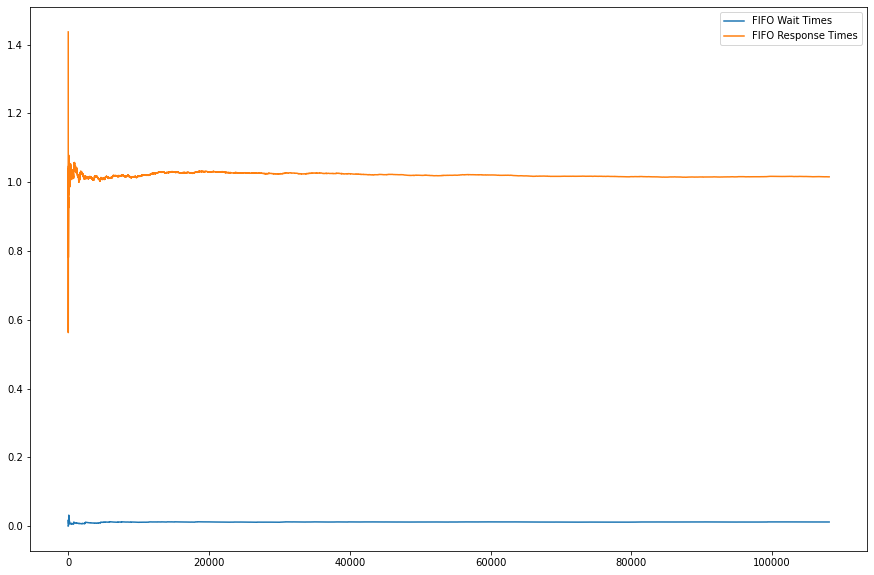

pb: 0.05, µb: 2
Total time --- 2.4112792015075684 seconds ---


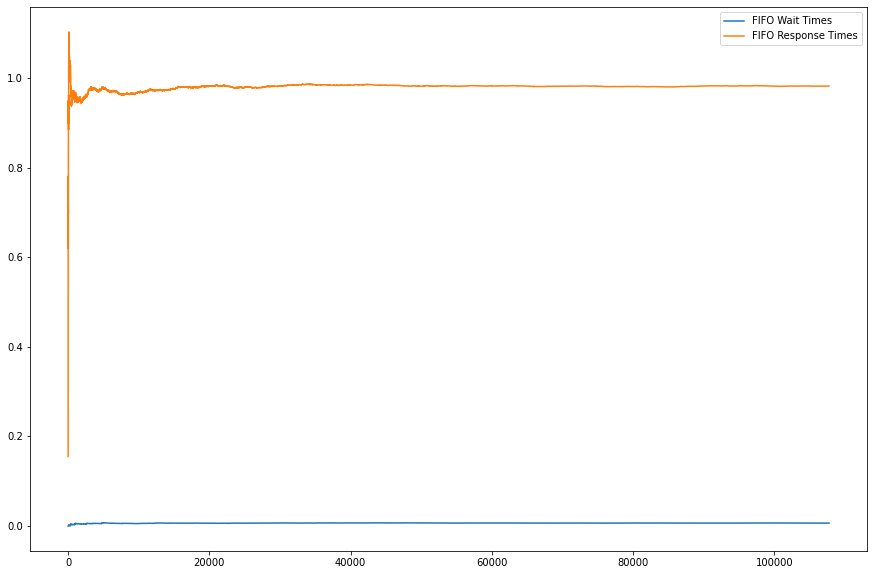

pb: 0.1, µb: 0.05
Total time --- 2.614744186401367 seconds ---


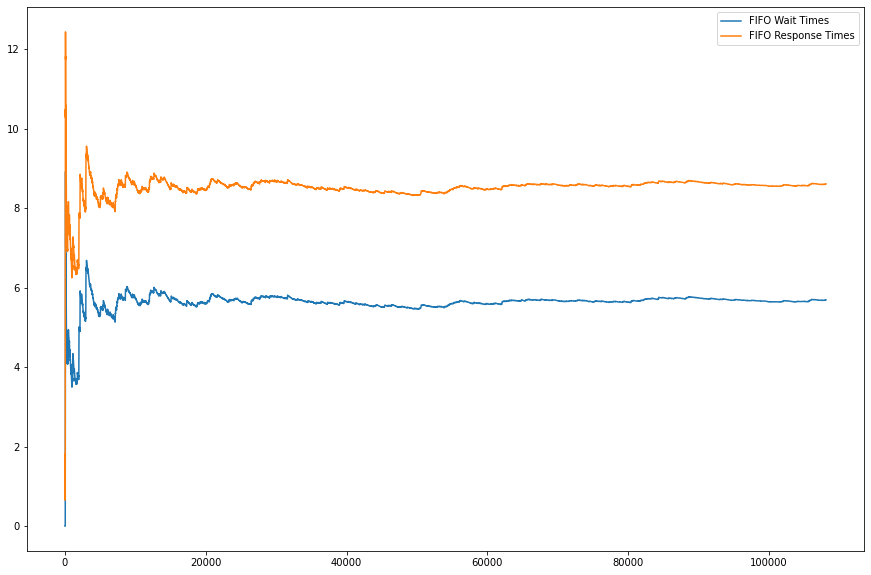

pb: 0.1, µb: 0.1
Total time --- 2.545600414276123 seconds ---


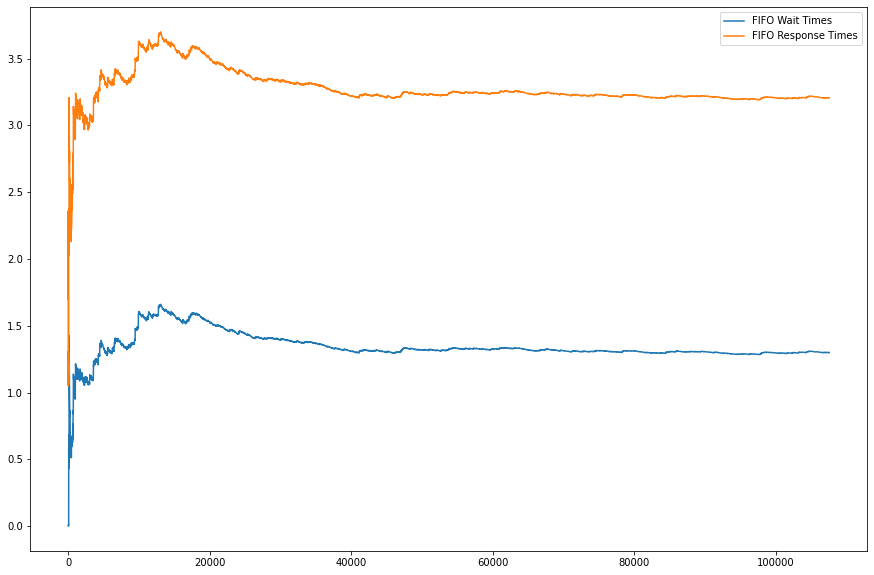

pb: 0.1, µb: 0.2
Total time --- 2.518420934677124 seconds ---


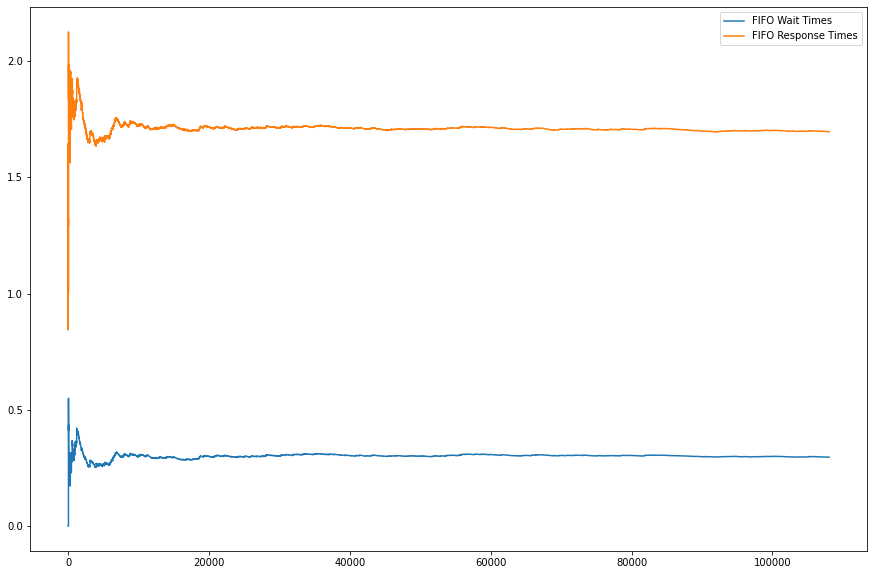

pb: 0.1, µb: 0.5
Total time --- 2.505702257156372 seconds ---


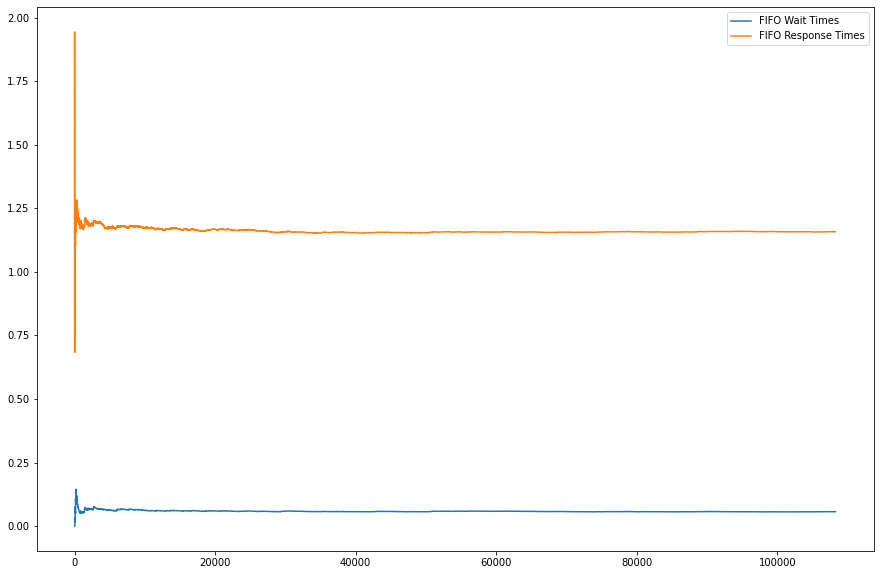

pb: 0.1, µb: 1
Total time --- 2.4705278873443604 seconds ---


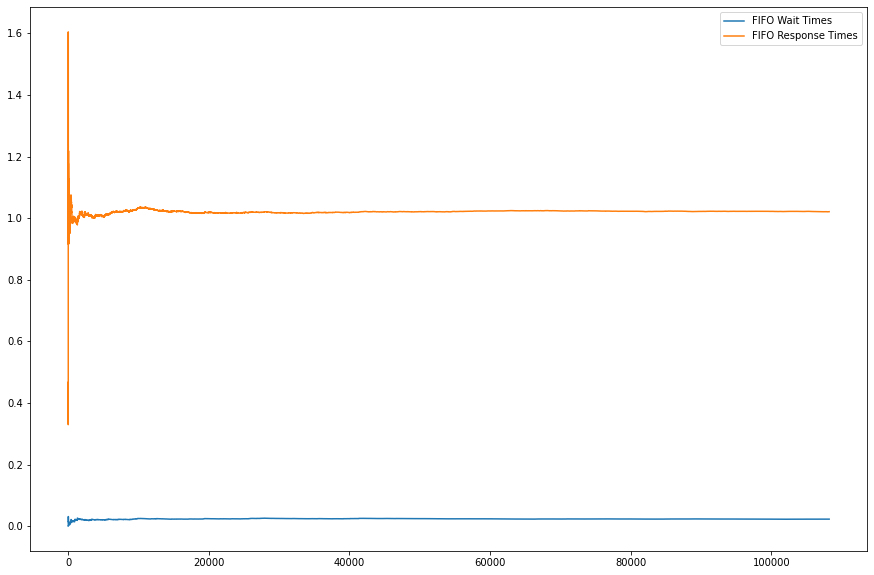

pb: 0.1, µb: 2
Total time --- 2.481821060180664 seconds ---


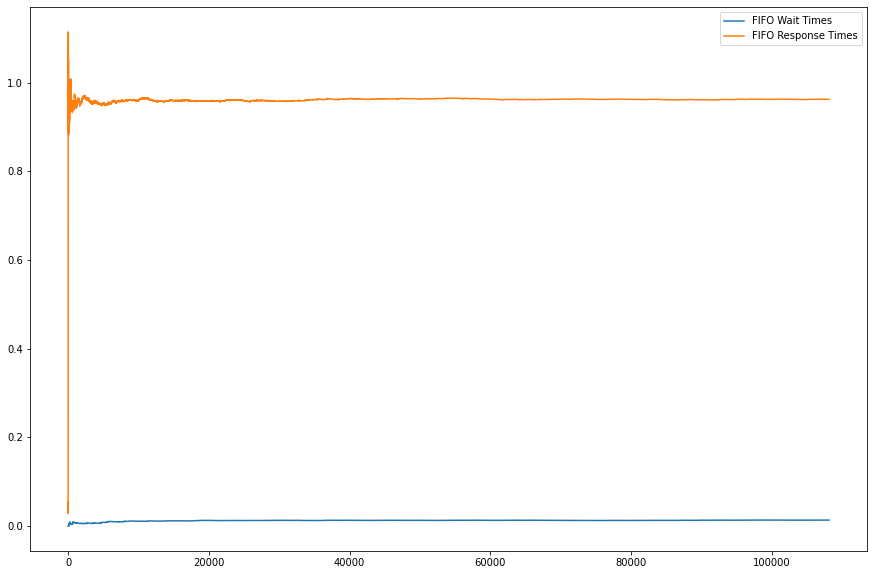

pb: 0.2, µb: 0.05
Total time --- 2.8943207263946533 seconds ---


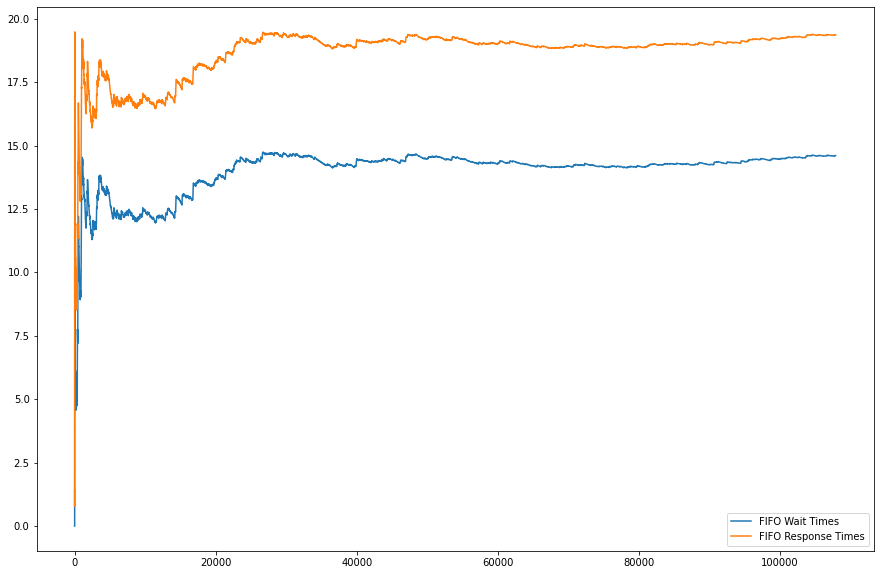

pb: 0.2, µb: 0.1
Total time --- 2.765220880508423 seconds ---


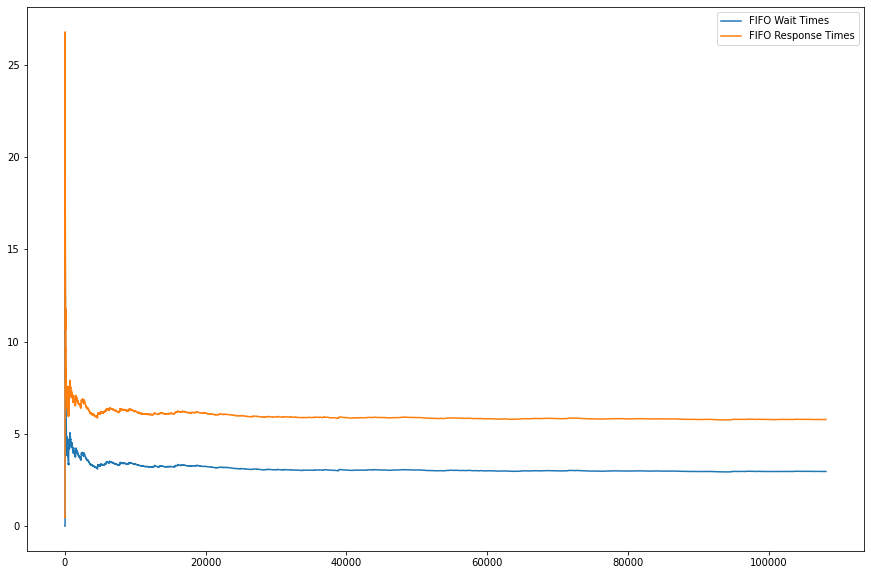

pb: 0.2, µb: 0.2
Total time --- 2.659367561340332 seconds ---


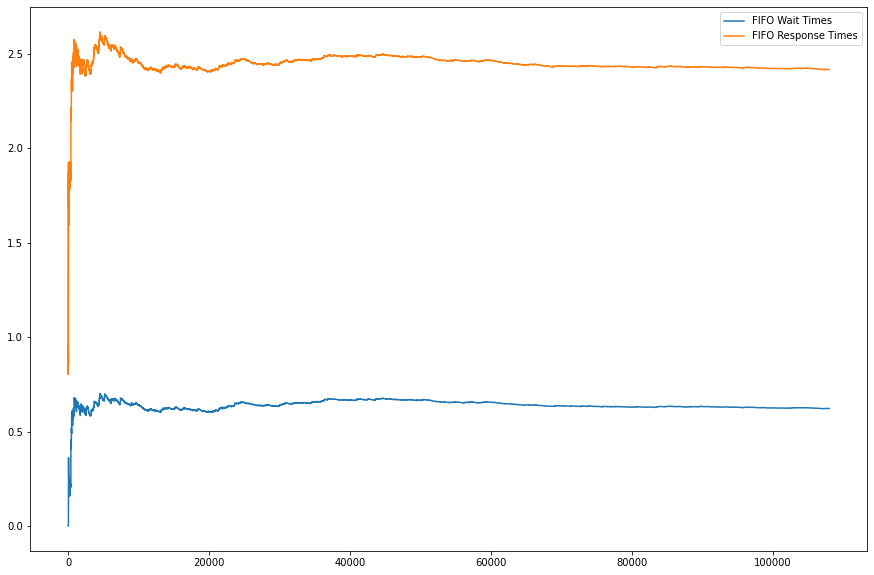

pb: 0.2, µb: 0.5
Total time --- 2.6655805110931396 seconds ---


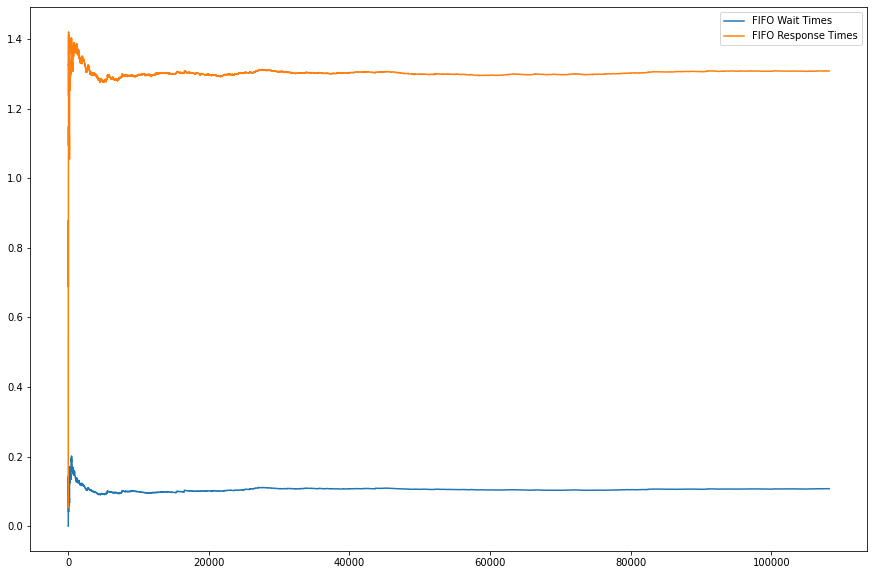

pb: 0.2, µb: 1
Total time --- 2.643441915512085 seconds ---


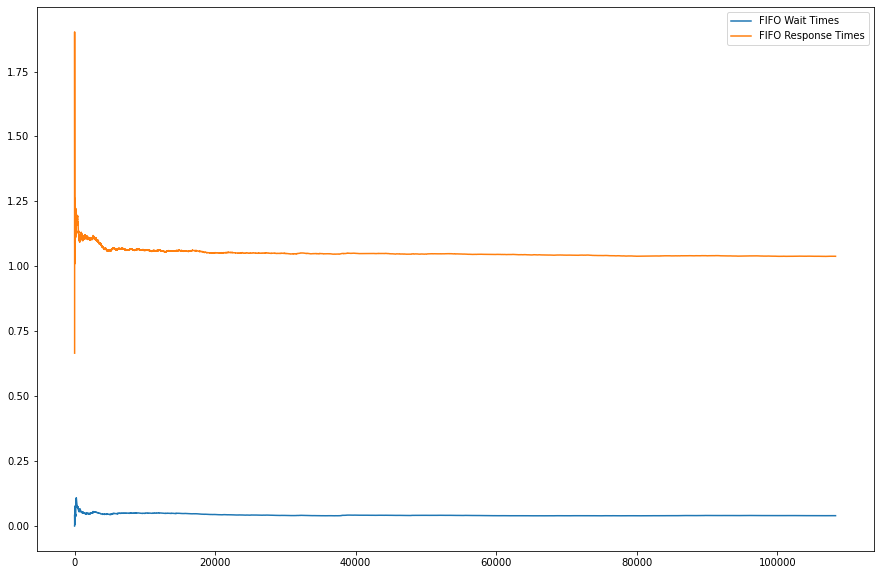

pb: 0.2, µb: 2
Total time --- 2.655744791030884 seconds ---


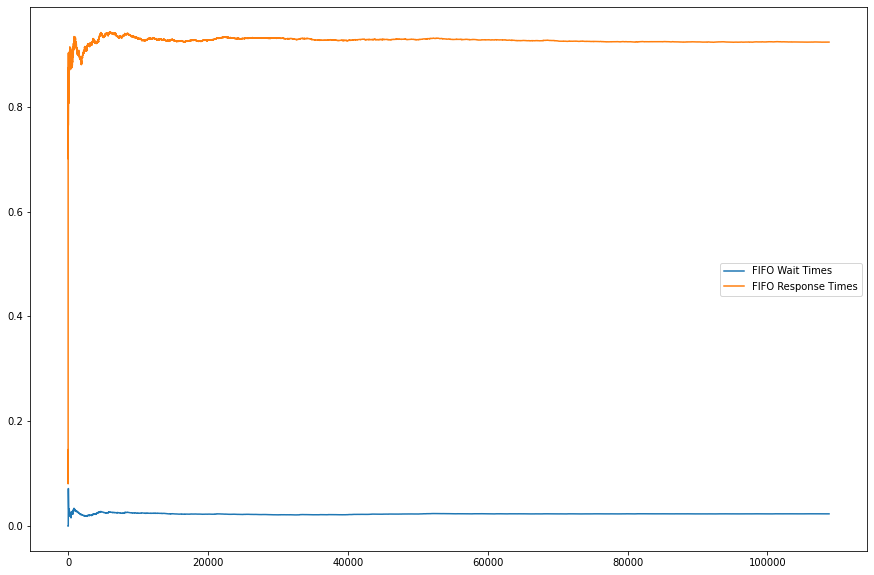

pb: 0.5, µb: 0.05
Total time --- 3.5897374153137207 seconds ---


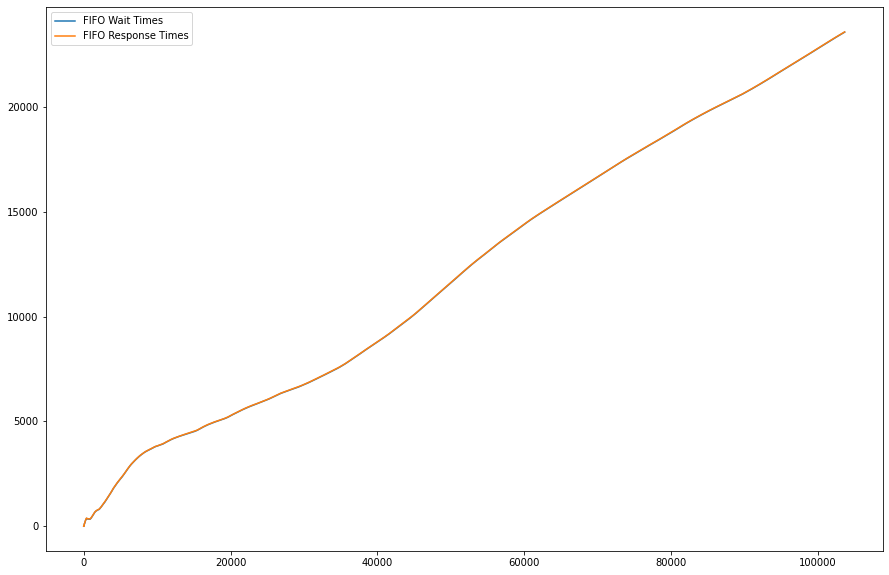

pb: 0.5, µb: 0.1
Total time --- 3.3293588161468506 seconds ---


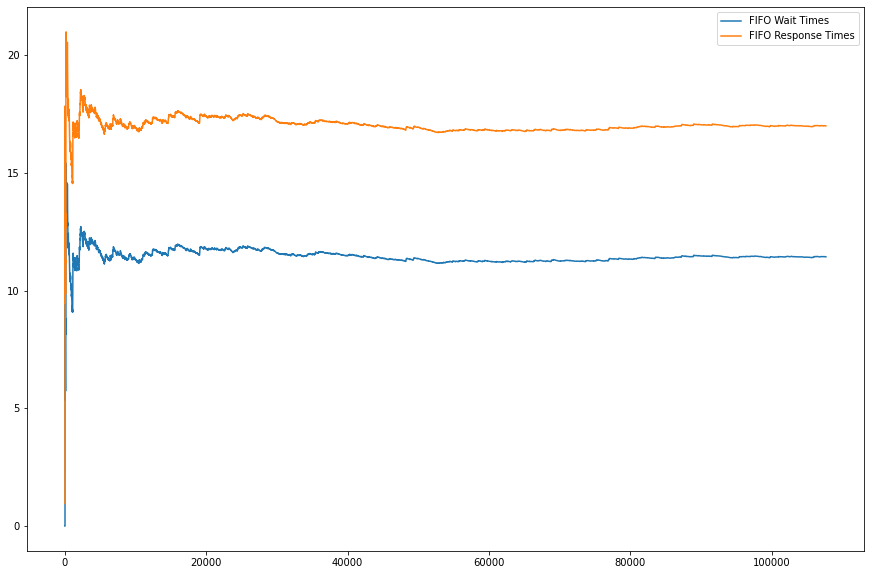

pb: 0.5, µb: 0.2
Total time --- 3.1707751750946045 seconds ---


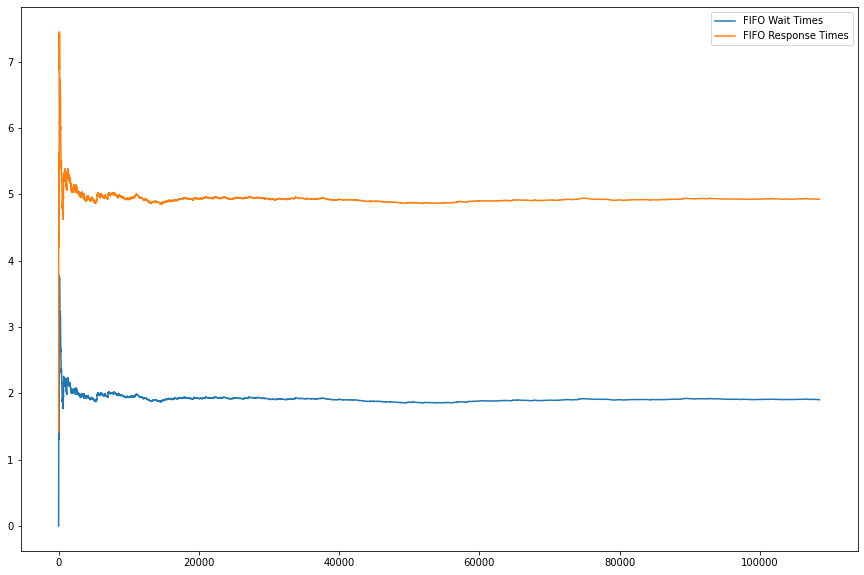

pb: 0.5, µb: 0.5
Total time --- 3.0301053524017334 seconds ---


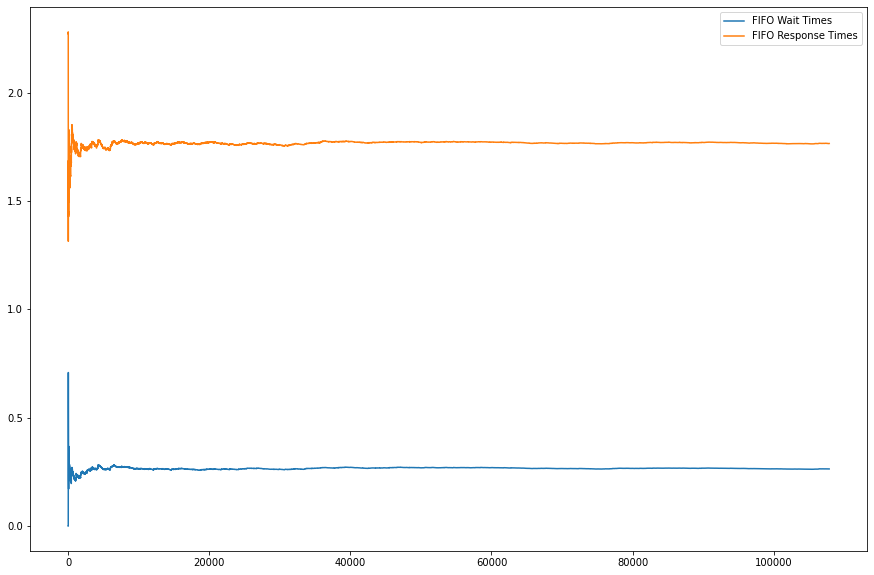

pb: 0.5, µb: 1
Total time --- 3.0341122150421143 seconds ---


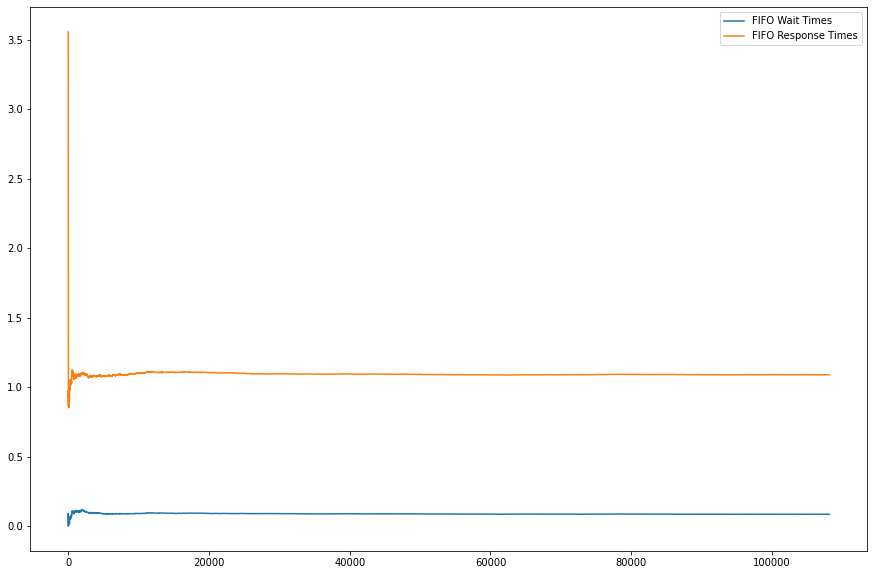

pb: 0.5, µb: 2
Total time --- 2.9955430030822754 seconds ---


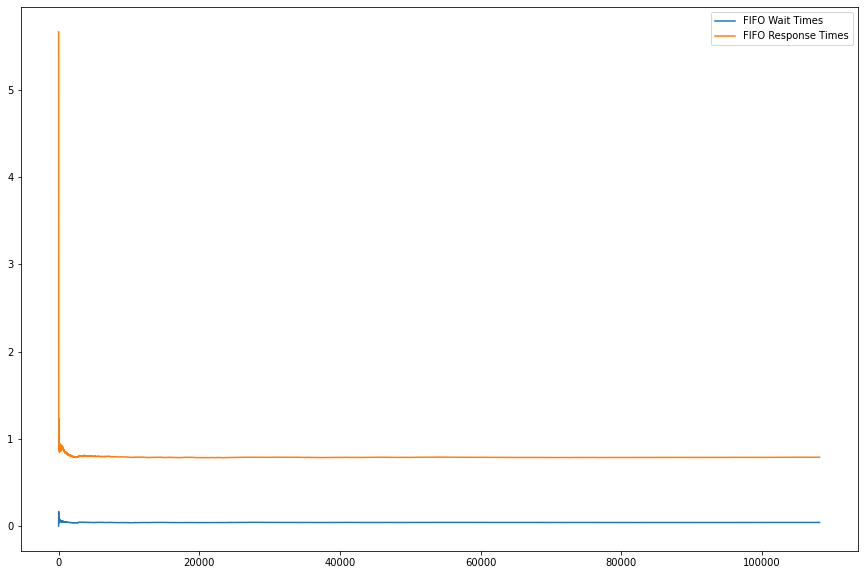

In [30]:
arr_rate = 0.1
mu_s = 1
#mu_b = 0.5
#ps = 0.5
#pb = 0.5
lambda_s = arr_rate
lambda_b = arr_rate
max_k = 10

measurements = []
abss = []
for pb in [0.01, 0.05, 0.1, 0.2, 0.5]:
    ps = 1-pb
    for mu_b in [0.05,0.1,0.2,0.5,1,2]:
        start_sim = time.time()
        max_job_size = max_k
        prob_b = pb
        mu_s = mu_s
        #mu_b = mu_b
        server_start = 0

        arr_rate = arr_rate
        duration = 3600*300

        server_n = max_k

        # POPULATE THE JOBS ARRIVAL TIMES AND JOB SIZE
        t = 0
        jobs_arr_t = []
        while t <= duration:
            iat = np.random.exponential(1/arr_rate)
            t += iat
            #jobs_arr_t.append((t,random.choice([1,job_size])))
            jobs_arr_t.append((t,get_job_size(max_job_size,prob_b)))

        waiting_times = []
        response_times = []
        queue = []

        # INITIATE THE N SERVERS
        servers = [] #[service_start,end]
        for s in range(server_n):
            servers.append([0,server_start,''])

        server_load = [[0,0]]
        queue_size = [[0,0]]
        jobs_inside = [[0,0,0]]
        throughput_small = 0
        throughput_big = 0

        '''big_job_hol = []
        abs_time = []
        abs_plus = []
        for kk in range (1000):
            abs_time.append([])
            abs_plus.append([])
            for kkk in range(1000):
                abs_time[kk].append([])
                abs_plus[kk].append([])
        #print(abs_time)
        xbxa = []
        big_dones = []'''

        job_id = 0
        big_finish = 0
        big_start = 0
        count_small = False
        xb = 0
        xa = 0
        # ITERATE EVENT-BASED (CAN BE JOBS ARRIVAL OR SERVICE FINISHED)
        while job_id < len(jobs_arr_t):
            t = 999999999
            curr_job = jobs_arr_t[job_id] 
            # ITERATE ALL THE SERVERS AND GET THE NEXT EARLIEST SERVER FINISH
            for s in servers:
                if s[1] > 0 and s[1] < t and s[1] > server_load[-1][0]:
                    t = s[1]
            # GET THE NEXT JOBS ARRIVAL
            if jobs_arr_t[job_id][0] < t:
                t = jobs_arr_t[job_id][0]
                queue.append(curr_job)
                job_id += 1
            # NOW, t IS THE NEXT EVENT HAPPENING
            #print(t)

            # HOL TECHNIQUE WHERE SCHEDULERS PRIORITIZE THE JOBS AT THE FRONT,
            # AND WAIT UNTIL HOWEVER MANY SERVERS THAT JOB NEEDS ARE AVAILABLE
            if len(queue) > 0:
                job = queue[0] #only the job at the front
                avl_servers_n = len(servers)-busy_server_n(t,servers)[0] #get the number of available servers
                if avl_servers_n >= job[1]: #if it's enough for the job at the front

                    ready_servers = get_avl_servers(t,servers,job[1]) #get all the servers ready to service
                    st = np.random.exponential(1/get_srv_rate(job[1],max_job_size,mu_s,mu_b)) #determine the service rate
                    for s in ready_servers:# put the job in each ready server
                        '''if count_small and job[0] <= big_finish and job[1] < max_job_size:
                            xb += 1
                        elif count_small and job[0] > big_finish and job[1] < max_job_size:
                            xa += 1
                        elif count_small and job[1] == max_job_size:
                            big_start = t
                            abs_plus[xb][xa].append(big_start-big_finish)
                            small_finish = ready_servers[-1][1]
                            #print(xb)
                            #print(xa)
                            if xb > 0 or xa > 0:
                                abs_time[xb][xa].append(small_finish-big_finish)
                            xbxa.append((xb,xa))
                            xb = 0
                            xa = 0
                            count_small = False'''
                        server_id = s[0]
                        job_name = ''
                        if job[1] == max_job_size: #for graph purpose
                            job_name += 'big'
                        else:
                            job_name += 'small'
                        job_name += '_'+str(job[0])
                        servers[server_id] = [t,t+st,job_name]
                    waiting_times.append((t-job[0],job[1])) #for graph purpose
                    response_times.append((t+st-job[0],job[1])) #for graph purpose
                    queue.pop(0)
                    if job[1] == max_job_size: #for graph purpose
                        throughput_big += 1
                        #big_finish = t+st
                        #count_small = True
                        #big_dones.append((job[0],t,t+st))
                    else:
                        throughput_small += 1

            '''if len(queue) > 0 and queue[0][1] == max_job_size:
                if len(big_job_hol) > 0:
                    if big_job_hol[-1][0] != queue[0][0]:
                        big_job_hol.append((queue[0][0],busy_server_n(t,servers)[1]))
                        #if big_job_hol[-1][1] == 0:
                        #    print(busy_server_n(t,servers))
                else:
                    big_job_hol.append((queue[0][0],busy_server_n(t,servers)[1]))'''

            server_state = busy_server_n(t,servers)
            #queue_state = queue_counter(queue,max_job_size)
            server_load.append((t,server_state[0])) #for graph purpose
            queue_size.append((t,len(queue))) #for graph purpose
            jobs_inside.append((t,server_state[1],server_state[2]))

        #print('Arrival rate: '+str(arr_rate))

        # counting the utilization
        '''util = 0 
        n_small = 0
        n_big = 0
        i = 1
        while i < len(server_load):
            if server_load[i-1][0] < server_start:
                i += 1
                continue
            timestamp = server_load[i][0] - server_load[i-1][0]
            load = server_load[i-1][1]
            small_load = jobs_inside[i-1][1]
            big_load = jobs_inside[i-1][2]
            util += (timestamp*load)
            n_small += (timestamp*small_load)
            n_big += (timestamp*big_load)
            i += 1
        duration -= server_start
        avg_util = util/duration/server_n
        avg_n_small = n_small/duration
        avg_n_big = n_big/duration
        avg_thr_small = throughput_small/duration
        avg_thr_big = throughput_big/duration
        measurements.append((avg_util,avg_n_big,avg_n_small,avg_thr_big,avg_thr_small))

        print('Utilization: '+str(avg_util))
        print('Small job throughput: '+str(avg_thr_small))
        print('Big job throughput: '+str(avg_thr_big))
        print('Average number of small job: '+str(avg_n_small))
        print('Average number of big job: '+str(avg_n_big))
        print(mean([wt[0] for wt in waiting_times]))
        print(mean([rt[0] for rt in response_times]))'''

        print('pb: '+str(pb)+', µb: '+str(mu_b))
        print("Total time --- %s seconds ---" % (time.time() - start_sim))
        #print('------------')

        '''abss.append([abs_time,abs_plus])

        hols = []
        for h in range(max_job_size+1):
            hols.append(0)
        for hol in big_job_hol:
            hols[hol[1]] = hols[hol[1]] + 1
        print(hols)
        print([h/sum(hols) for h in hols])

        plt.figure(figsize=(17,15))
        plt.bar([n for n in range(max_job_size+1)], [h/sum(hols) for h in hols], label = 'How many small jobs?')
        plt.legend()
        plt.xlabel('Small jobs')
        plt.ylabel('P')
        #plt.xticks([n+(width*0.5) for n in range(max_lambda)],
        #        [n+1 for n in range(max_lambda)])
        plt.show()'''

        avg_wait = []
        n = 1
        tot = 0
        for w in [wt[0] for wt in waiting_times]:
            tot += w
            avg_wait.append(tot/n)
            n += 1

        avg_resp = []
        n = 1
        tot = 0
        for w in [rt[0] for rt in response_times]:
            tot += w
            avg_resp.append(tot/n)
            n += 1

        plt.figure(figsize=(15,10))
        plt.plot([i for i in range(len(avg_wait))], avg_wait, label = "FIFO Wait Times")
        plt.plot([i for i in range(len(avg_resp))], avg_resp, label = "FIFO Response Times")
        plt.legend()
        plt.show()

        busy_times_s = []

        tracking = False
        for j in jobs_inside:
            if (not tracking) and j[1] > 0:
                tracking = True
                busy_times_s.append([j[0]])
            elif tracking and j[1] == 0:
                tracking = False
                busy_times_s[-1].append(j[0])
        if len(busy_times_s[-1]) < 2:
            busy_times_s[-1].append(j[0])

        busy_times = []

        tracking = False
        for j in jobs_inside:
            if (not tracking) and j[1]+j[2] > 0:
                tracking = True
                busy_times.append([j[0]])
            elif tracking and j[1]+j[2] == 0:
                tracking = False
                busy_times[-1].append(j[0])
        if len(busy_times[-1]) < 2:
            busy_times[-1].append(j[0])

        idle_times = []

        tracking = False
        for j in jobs_inside:
            if (not tracking) and j[1]+j[2] == 0:
                tracking = True
                idle_times.append([j[0]])
            elif tracking and j[1]+j[2] > 0:
                tracking = False
                idle_times[-1].append(j[0])
        if len(idle_times[-1]) < 2:
            idle_times[-1].append(j[0])

        measurements.append((busy_times_s,busy_times,idle_times))


        '''if len(busy_times) > 1:
            max_lim = 0
            
            data = np.sort(np.array([b[1]-b[0] for b in busy_times[:-1]]))
            mean = np.mean(data)
            std_dev = np.std(data)
            # 3. Normalize array around 0
            zero_based = abs(data - mean)
            # 4. Define maximum number of standard deviations
            max_deviations = 3
            # 5. Access only non-outliers using Boolean Indexing
            no_outliers = np.array(data[zero_based < max_deviations * std_dev])
            try:
                max_lim = max(no_outliers)
            except:
                data = np.sort(np.array([b[1]-b[0] for b in busy_times_s[:-1]]))
                mean = np.mean(data)
                std_dev = np.std(data)
                # 3. Normalize array around 0
                zero_based = abs(data - mean)
                # 4. Define maximum number of standard deviations
                max_deviations = 3
                # 5. Access only non-outliers using Boolean Indexing
                no_outliers = np.array(data[zero_based < max_deviations * std_dev])
                max_lim = max(no_outliers)

            data = np.sort(np.array([b[1]-b[0] for b in busy_times_s[:-1]]))

            plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
            plt.xlim([0, max_lim+1])
            plt.xlabel('Bs')
            plt.ylabel('pdf')
            plt.savefig('graphs/Bs '+str(mu_b)+' '+str(pb)+'.png', bbox_inches='tight')
            plt.show()

            data = np.sort(np.array([b[1]-b[0] for b in busy_times[:-1]]))

            plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
            plt.xlim([0, max_lim+1])
            plt.xlabel('B')
            plt.ylabel('pdf')
            plt.savefig('graphs/B '+str(mu_b)+' '+str(pb)+'.png', bbox_inches='tight')
            plt.show()

            data = np.sort(np.array([b[1]-b[0] for b in idle_times[:-1]]))

            plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
            plt.xlim([0, max_lim+1])
            plt.xlabel('I')
            plt.ylabel('pdf')
            plt.savefig('graphs/I '+str(mu_b)+' '+str(pb)+'.png', bbox_inches='tight')
            plt.show()
        else:
            print('Saturated')
            print('')
            print('----------------------------')'''
        
        

In [16]:
import pickle

# write list to binary file
# store list in binary file so 'wb' mode
with open('measurements_thesis_v2', 'wb') as fp:
    pickle.dump(measurements, fp)
    print('Done writing list into a binary file')



Done writing list into a binary file


In [3]:
# Read list to memory
# for reading also binary mode is important
measurements = []

with open('measurements', 'rb') as fp:
    measurements = pickle.load(fp)


In [6]:
len(measurements)

30

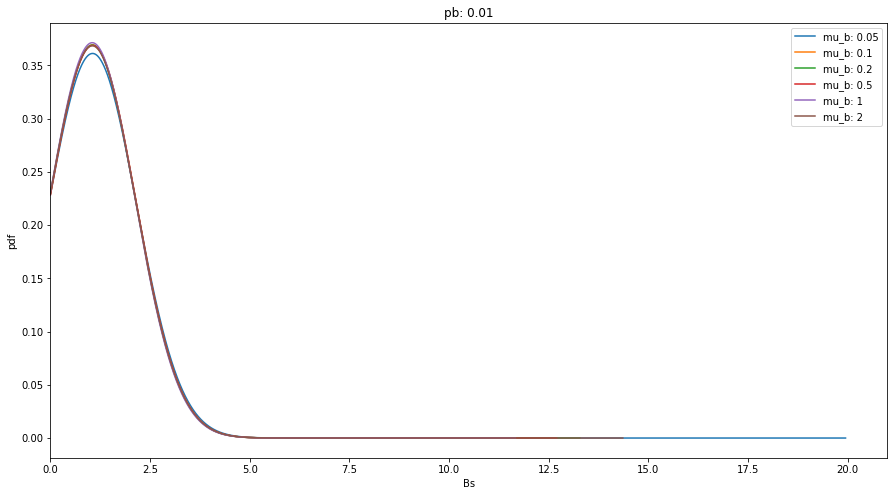

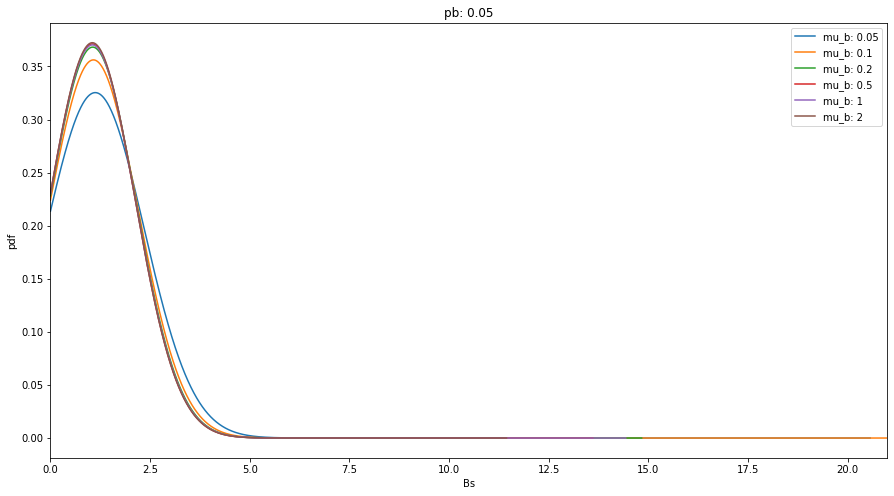

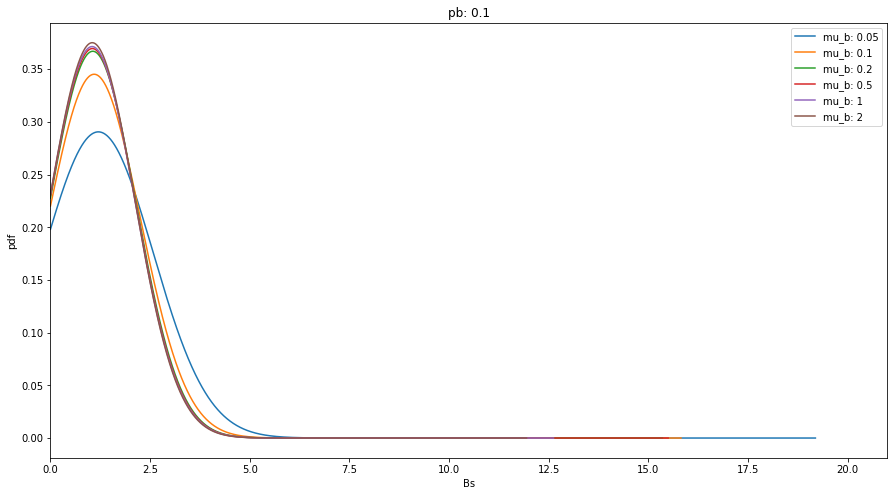

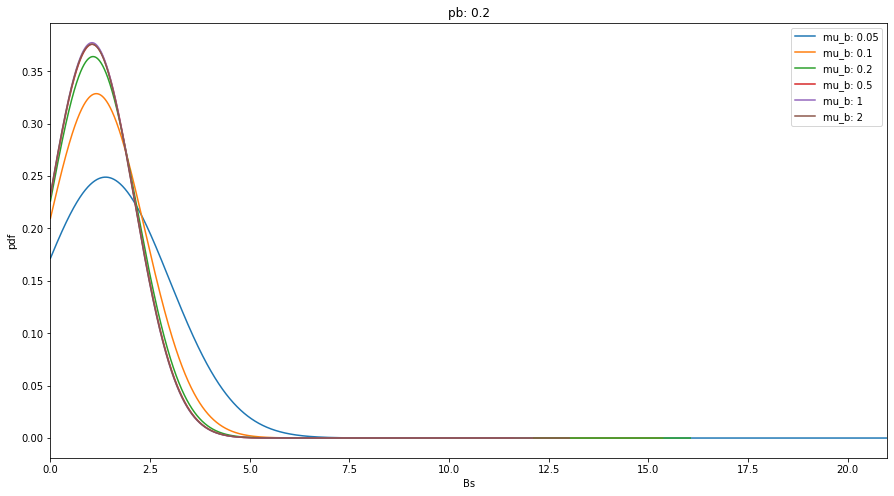

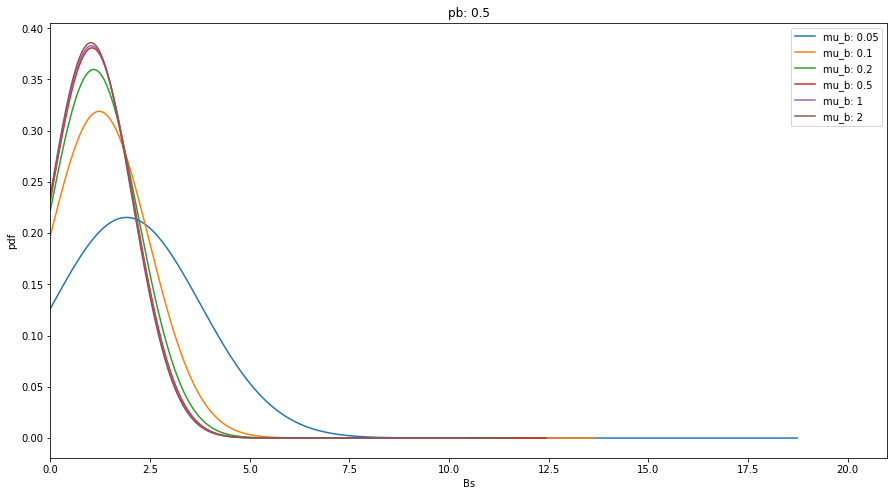

In [39]:
max_lim = 20

i = 0
for pb in [0.01, 0.05, 0.1, 0.2, 0.5]:
    ps = 1-pb
    plt.figure(figsize=(15,8))
    for mu_b in [0.05,0.1,0.2,0.5,1,2]:
        data = np.sort(np.array([b[1]-b[0] for b in measurements[i][0][:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()), label='mu_b: '+str(mu_b))
        
        
        i+= 1
    plt.xlim([0, max_lim+1])
    plt.xlabel('Bs')
    plt.ylabel('pdf')
    plt.title('pb: '+str(pb))
    plt.legend()
    plt.savefig('graphs_v4/'+str(i)+') Bs pb '+str(pb)+'.png', bbox_inches='tight')
    plt.show()

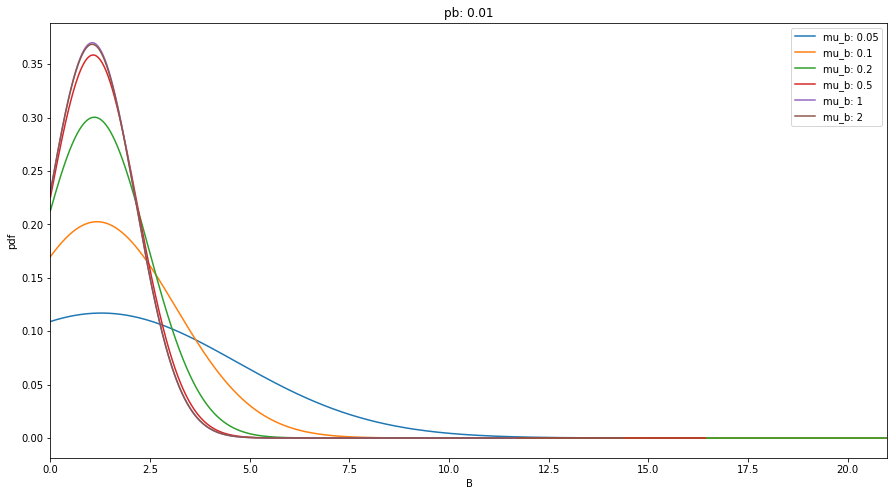

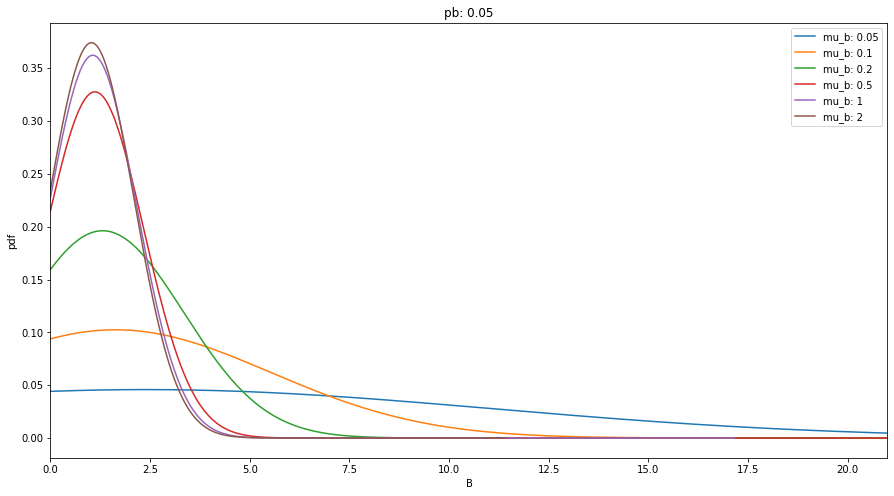

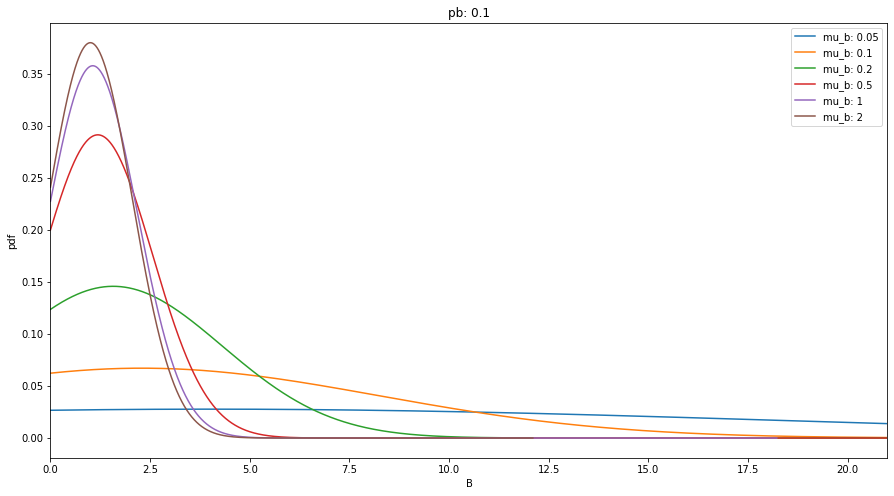

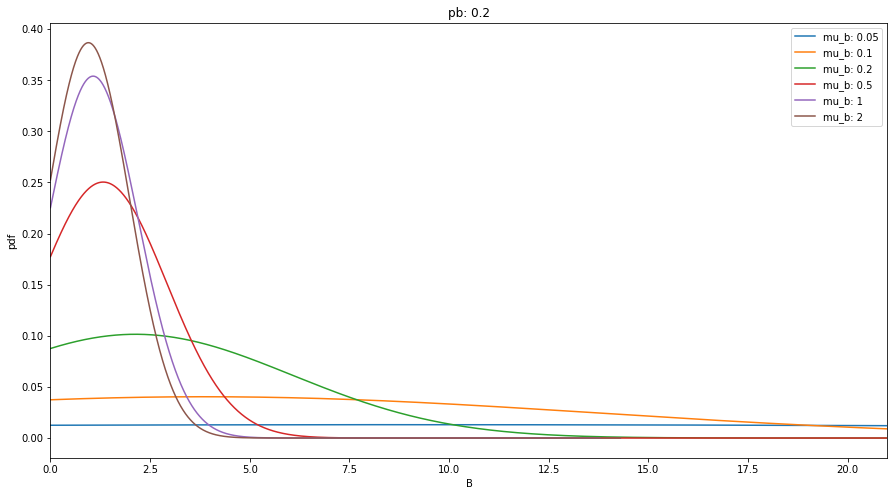

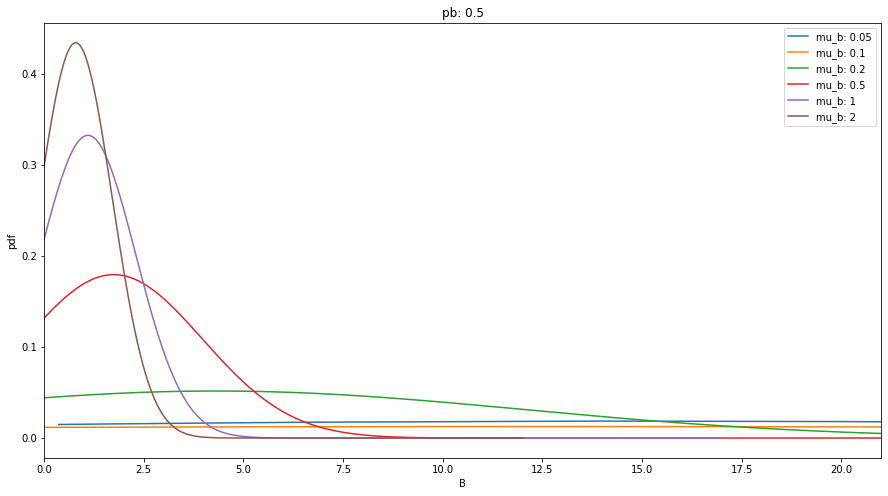

In [40]:
max_lim = 20

i = 0
for pb in [0.01, 0.05, 0.1, 0.2, 0.5]:
    ps = 1-pb
    plt.figure(figsize=(15,8))
    for mu_b in [0.05,0.1,0.2,0.5,1,2]:
        data = np.sort(np.array([b[1]-b[0] for b in measurements[i][1][:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()), label='mu_b: '+str(mu_b))
        
        
        i+= 1
    plt.xlim([0, max_lim+1])
    plt.xlabel('B')
    plt.ylabel('pdf')
    plt.title('pb: '+str(pb))
    plt.legend()
    plt.savefig('graphs_v4/'+str(i)+') B pb '+str(pb)+'.png', bbox_inches='tight')
    plt.show()

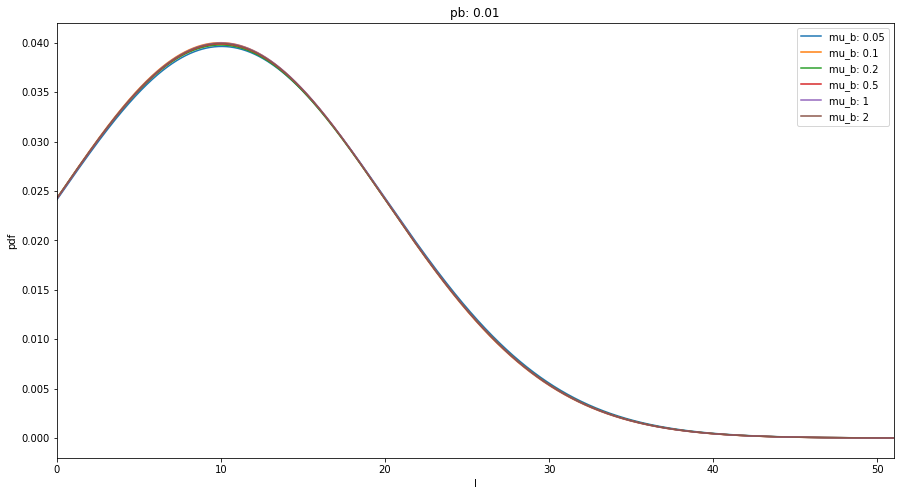

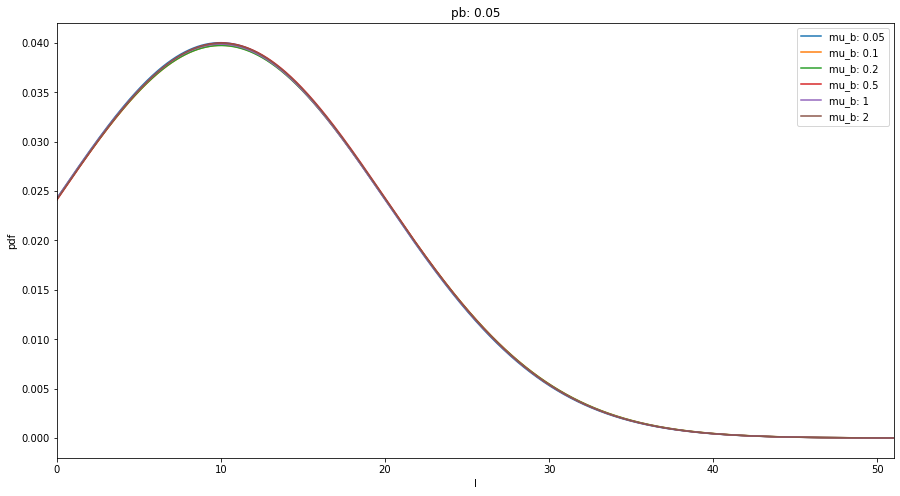

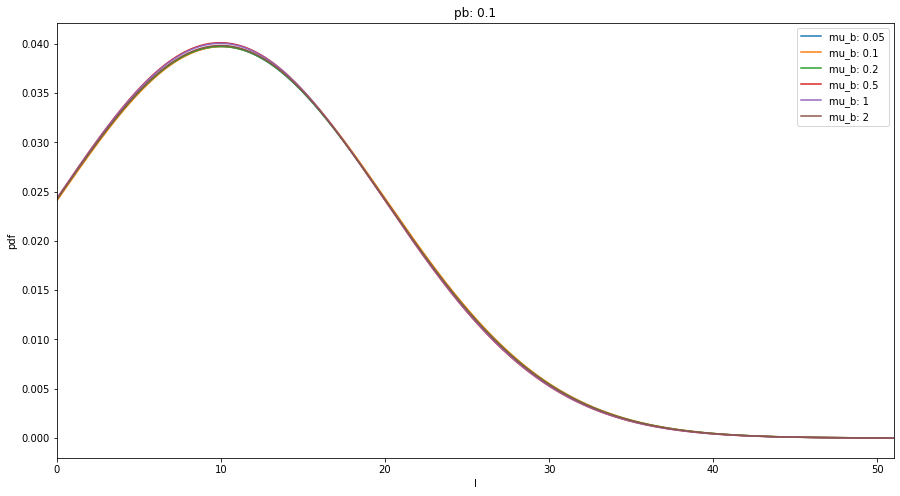

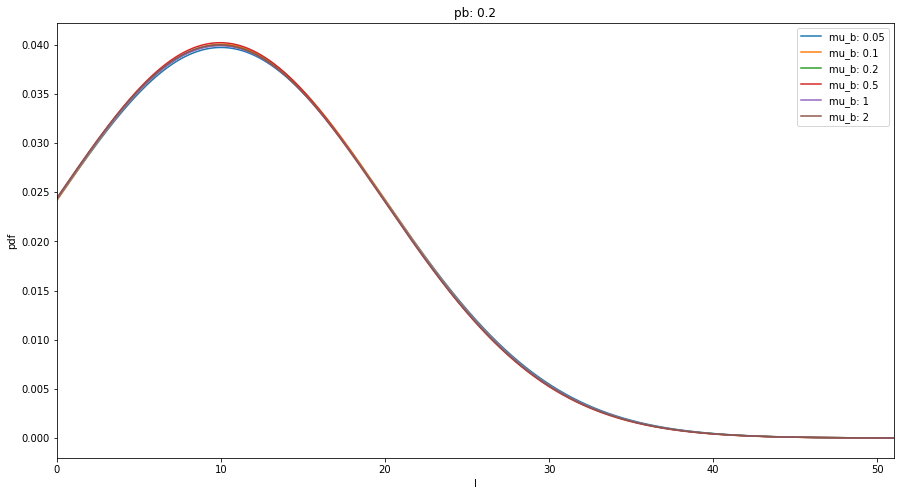

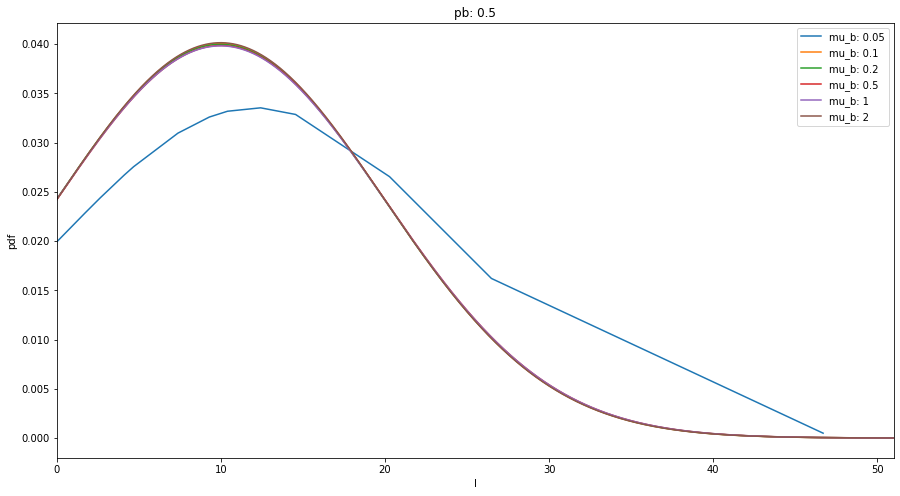

In [41]:
max_lim = 50

i = 0
for pb in [0.01, 0.05, 0.1, 0.2, 0.5]:
    ps = 1-pb
    plt.figure(figsize=(15,8))
    for mu_b in [0.05,0.1,0.2,0.5,1,2]:
        data = np.sort(np.array([b[1]-b[0] for b in measurements[i][2][:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()), label='mu_b: '+str(mu_b))
        
        
        i+= 1
    plt.xlim([0, max_lim+1])
    plt.xlabel('I')
    plt.ylabel('pdf')
    plt.title('pb: '+str(pb))
    plt.legend()
    plt.savefig('graphs_v4/'+str(i)+') I pb '+str(pb)+'.png', bbox_inches='tight')
    plt.show()

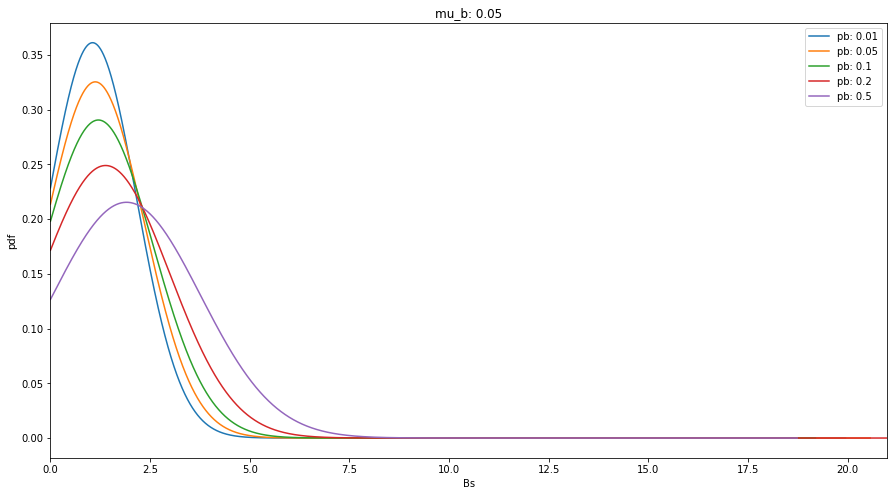

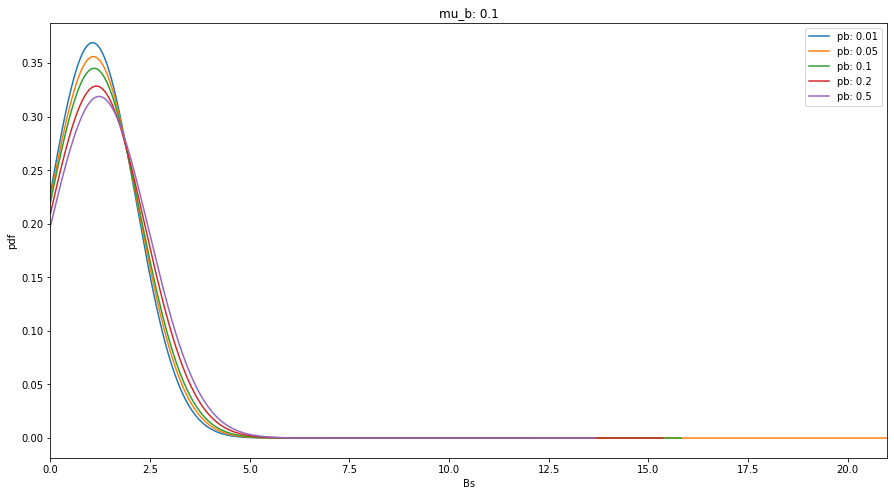

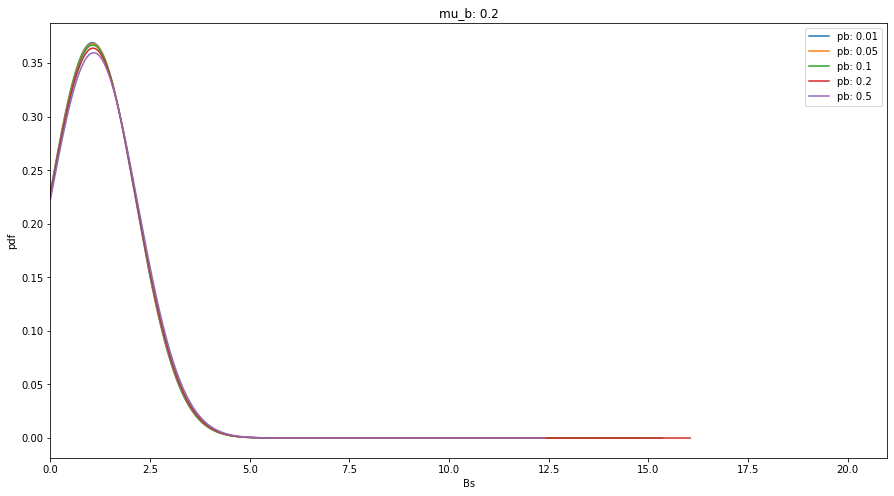

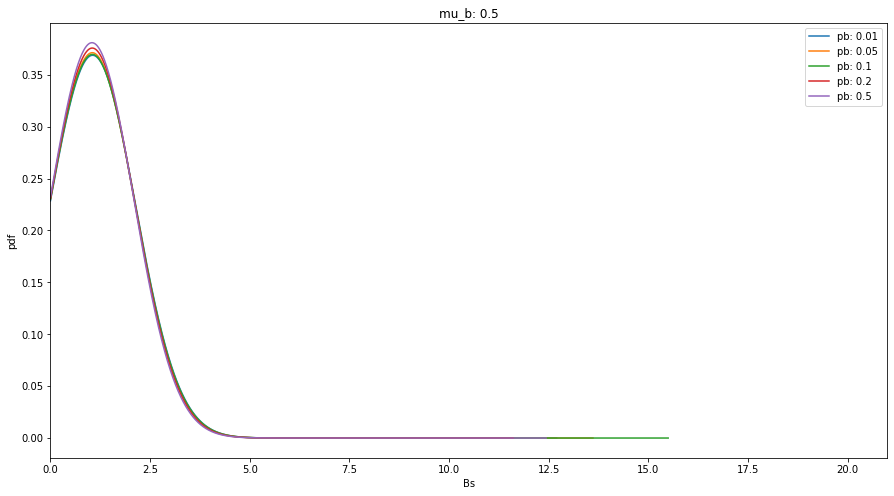

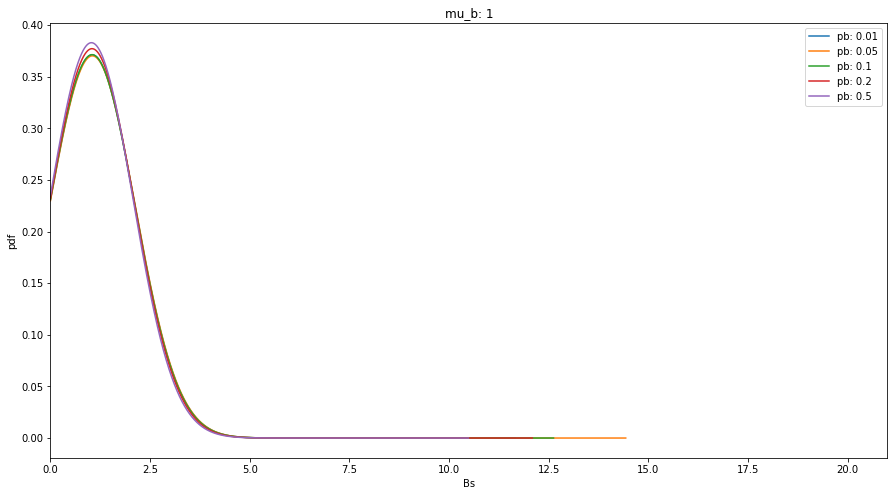

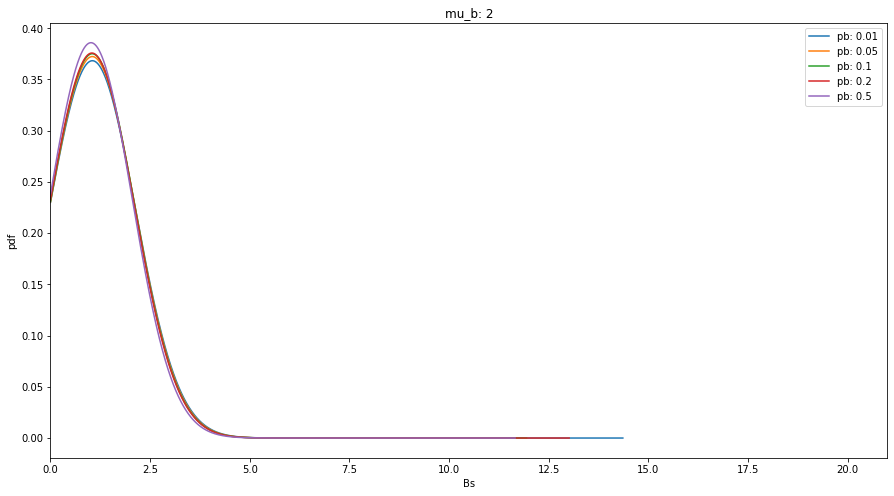

In [42]:
max_lim = 20

i = 0
mu_b_list = [0.05,0.1,0.2,0.5,1,2]
pb_list = [0.01, 0.05, 0.1, 0.2, 0.5]

for i in range(len(mu_b_list)):
    mu_b = mu_b_list[i]
    ps = 1-pb
    plt.figure(figsize=(15,8))
    for pb in pb_list:
        data = np.sort(np.array([b[1]-b[0] for b in measurements[i][0][:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()), label='pb: '+str(pb))
        
        
        i+= len(mu_b_list)
    plt.xlim([0, max_lim+1])
    plt.xlabel('Bs')
    plt.ylabel('pdf')
    plt.title('mu_b: '+str(mu_b))
    plt.legend()
    plt.savefig('graphs_v4/'+str(i)+') Bs mu_b '+str(mu_b)+'.png', bbox_inches='tight')
    plt.show()

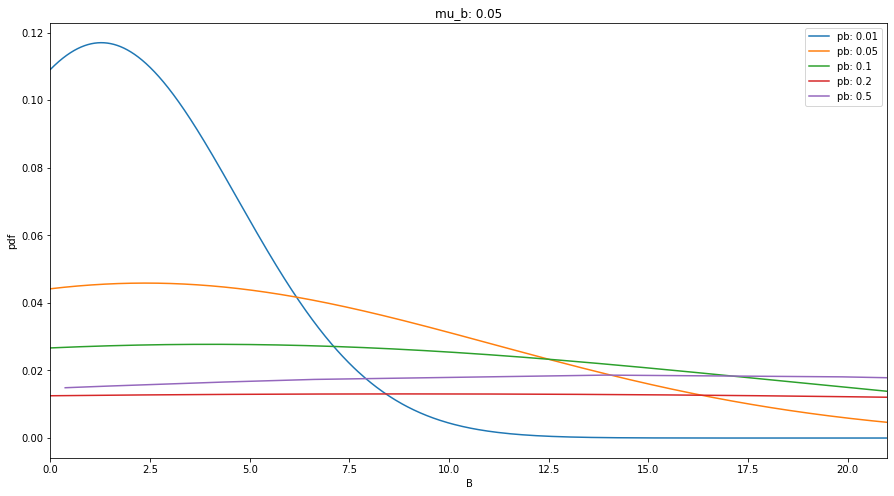

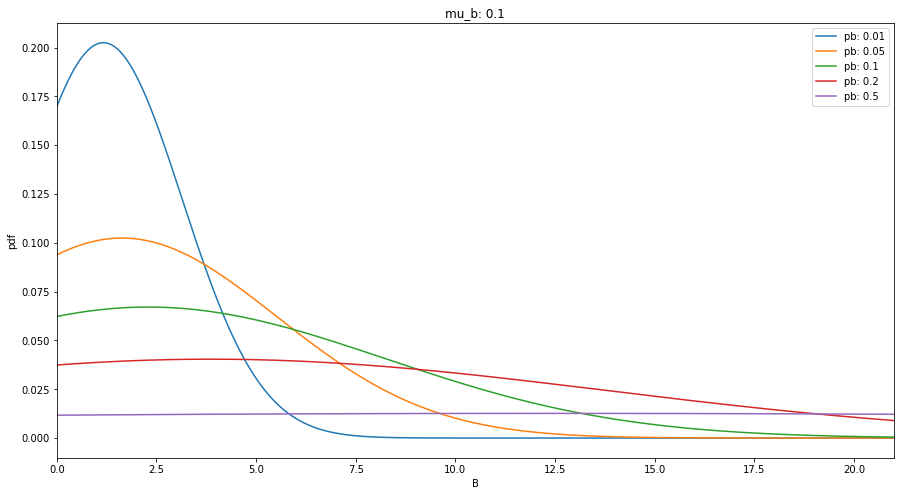

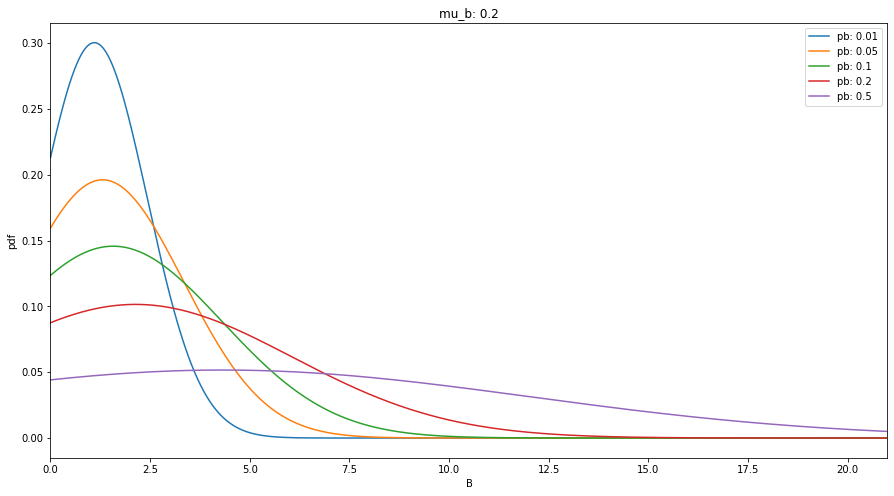

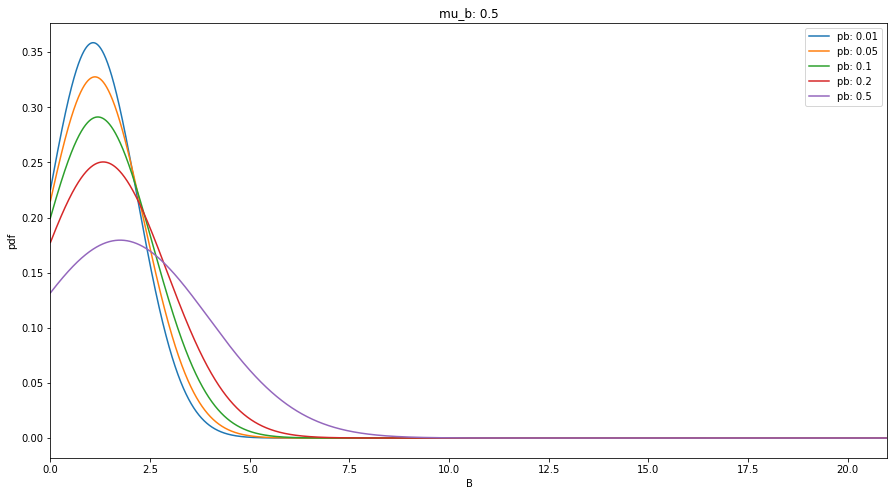

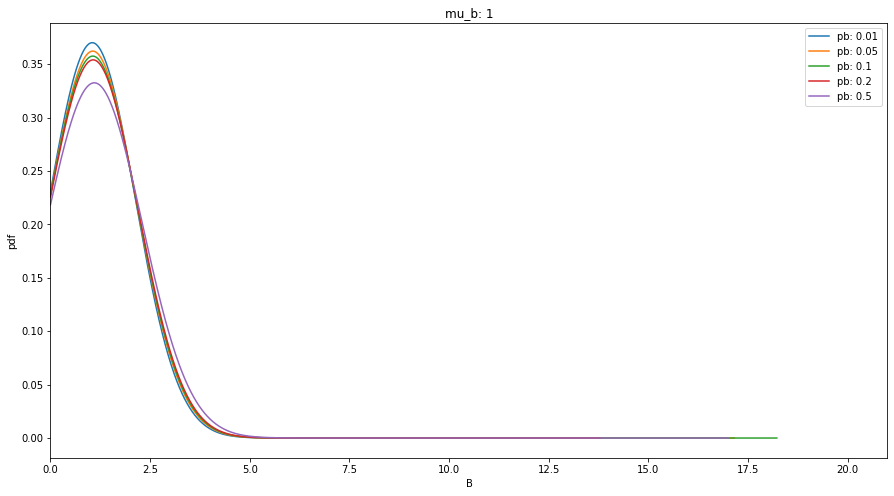

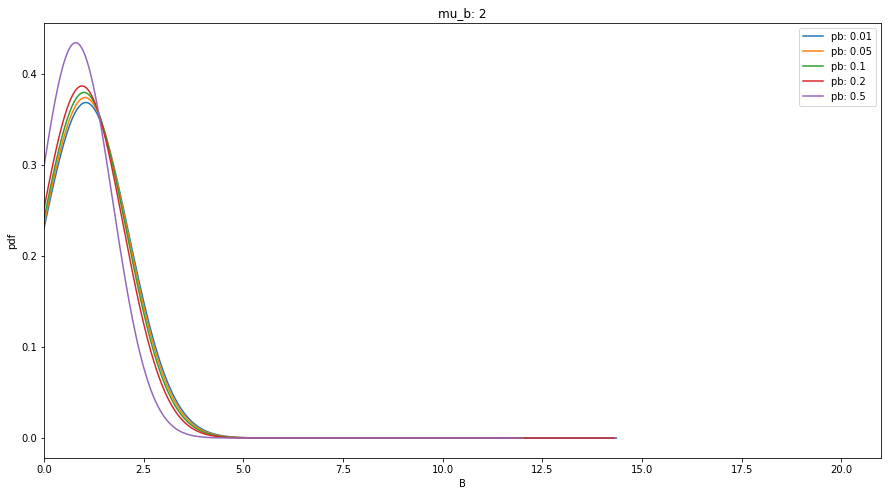

In [46]:
max_lim = 20

i = 0
mu_b_list = [0.05,0.1,0.2,0.5,1,2]
pb_list = [0.01, 0.05, 0.1, 0.2, 0.5]

for i in range(len(mu_b_list)):
    mu_b = mu_b_list[i]
    ps = 1-pb
    plt.figure(figsize=(15,8))
    for pb in pb_list:
        data = np.sort(np.array([b[1]-b[0] for b in measurements[i][1][:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()), label='pb: '+str(pb))
        
        
        i+= len(mu_b_list)
    plt.xlim([0, max_lim+1])
    plt.xlabel('B')
    plt.ylabel('pdf')
    plt.title('mu_b: '+str(mu_b))
    plt.legend()
    #plt.savefig('graphs_v4/'+str(i)+') B mu_b '+str(mu_b)+'.png', bbox_inches='tight')
    plt.show()

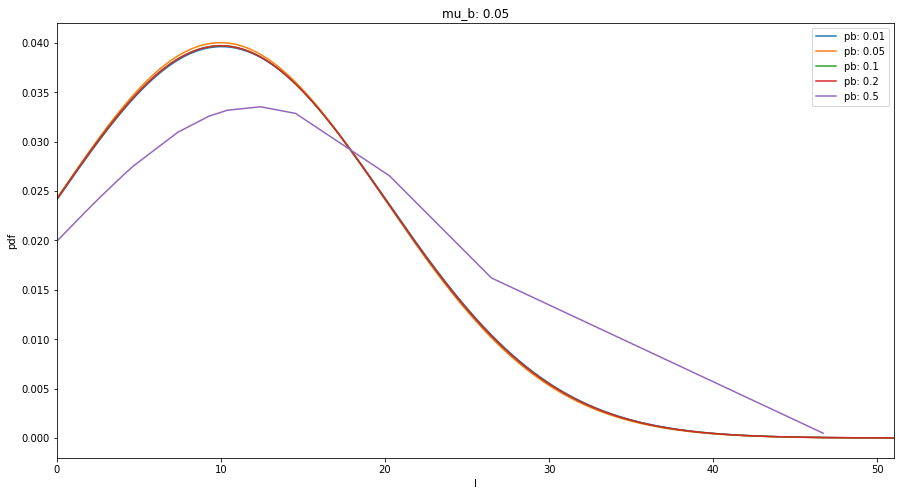

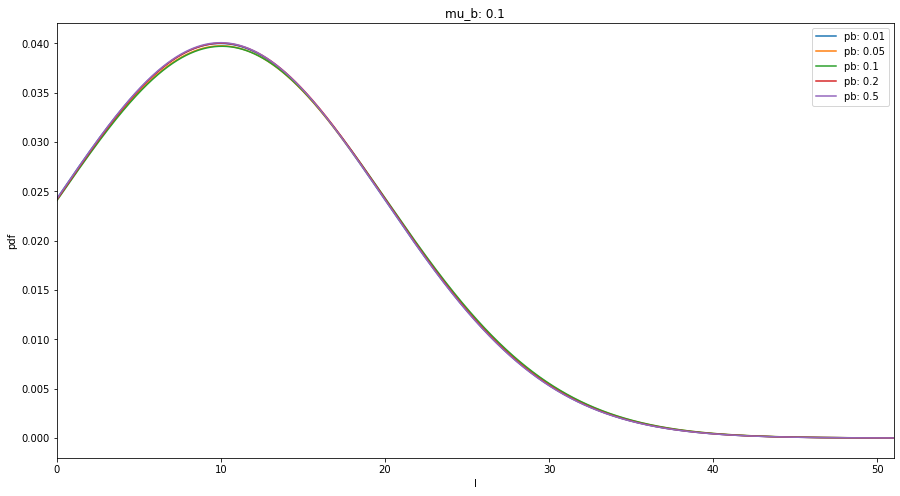

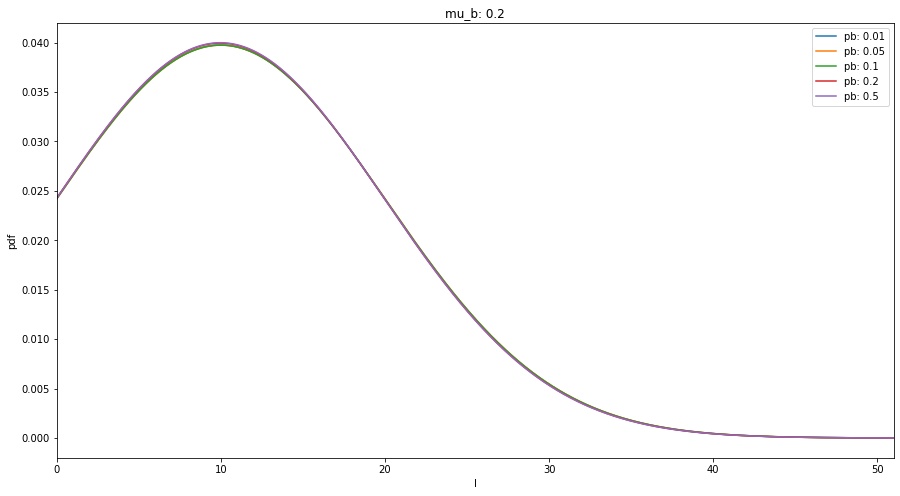

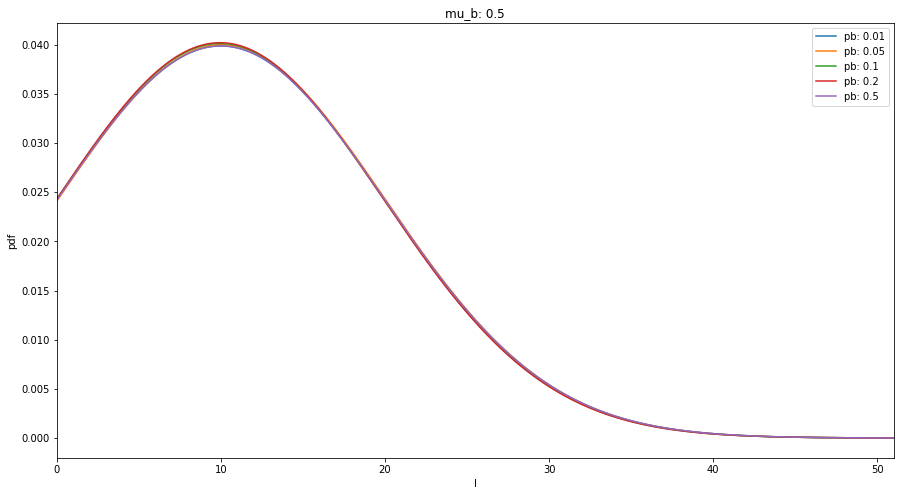

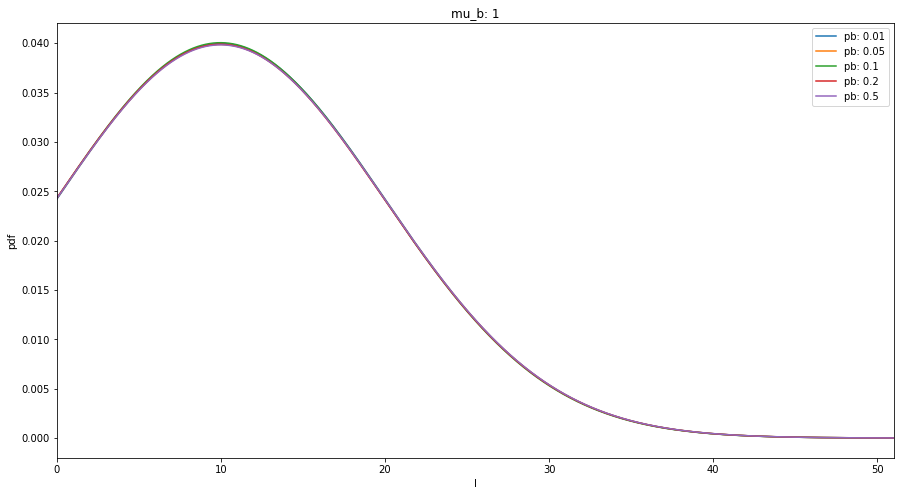

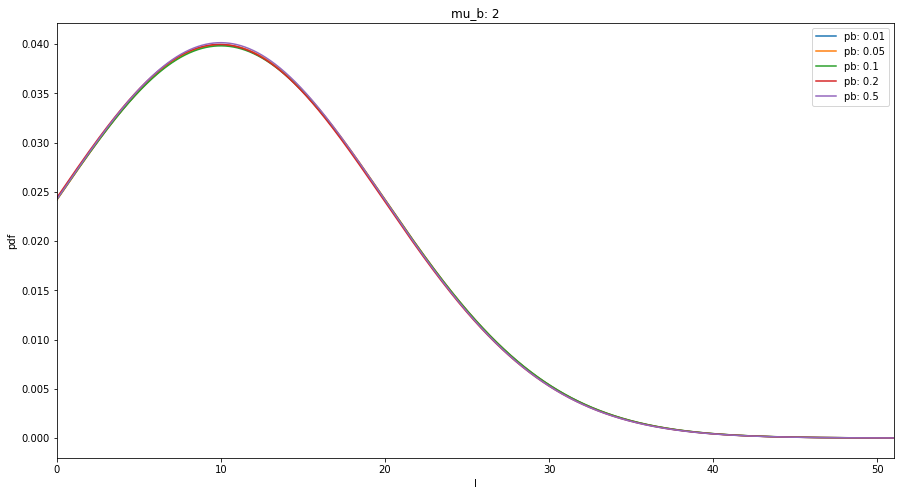

In [44]:
max_lim = 50

i = 0
mu_b_list = [0.05,0.1,0.2,0.5,1,2]
pb_list = [0.01, 0.05, 0.1, 0.2, 0.5]

for i in range(len(mu_b_list)):
    mu_b = mu_b_list[i]
    ps = 1-pb
    plt.figure(figsize=(15,8))
    for pb in pb_list:
        data = np.sort(np.array([b[1]-b[0] for b in measurements[i][2][:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()), label='pb: '+str(pb))
        
        
        i+= len(mu_b_list)
    plt.xlim([0, max_lim+1])
    plt.xlabel('I')
    plt.ylabel('pdf')
    plt.title('mu_b: '+str(mu_b))
    plt.legend()
    plt.savefig('graphs_v4/'+str(i)+') I mu_b '+str(mu_b)+'.png', bbox_inches='tight')
    plt.show()

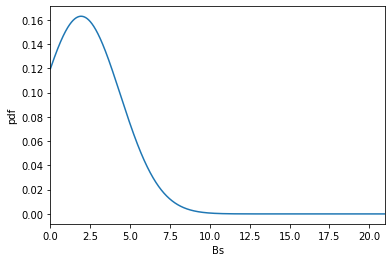

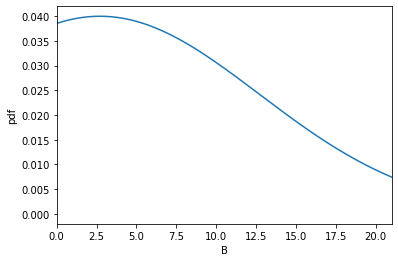

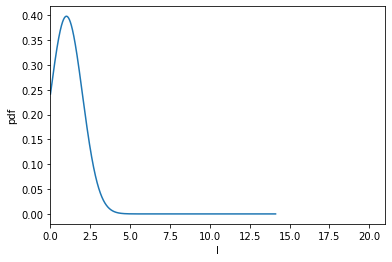

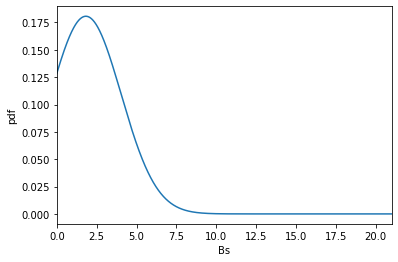

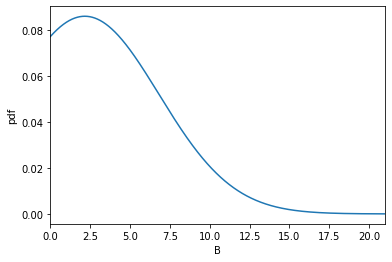

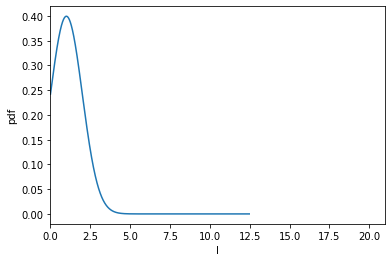

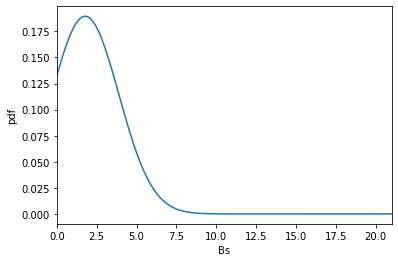

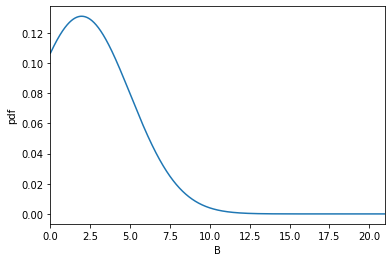

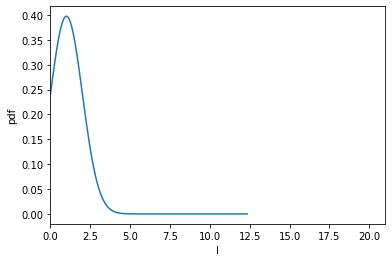

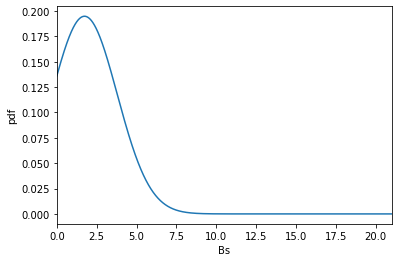

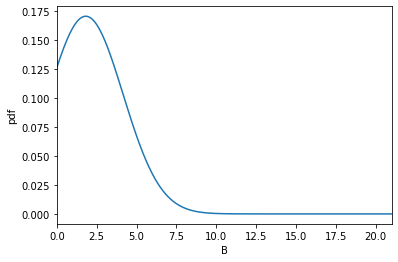

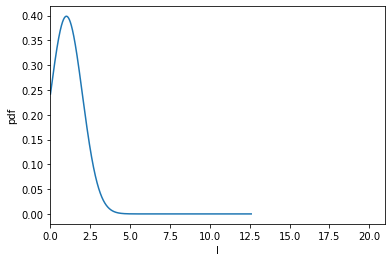

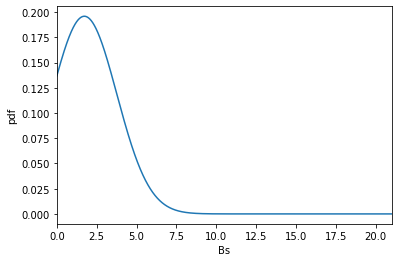

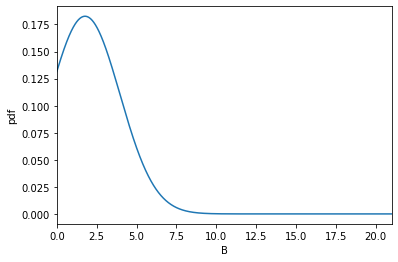

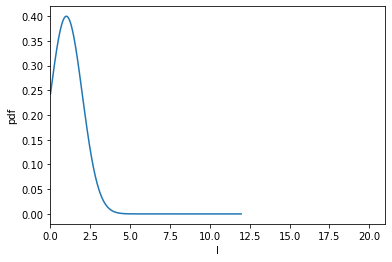

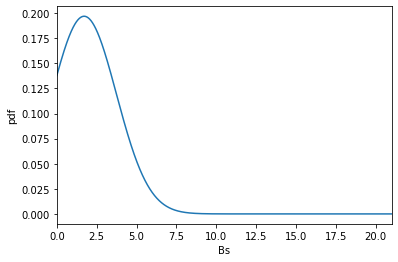

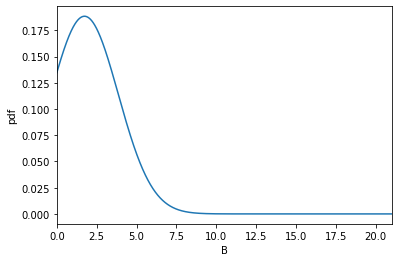

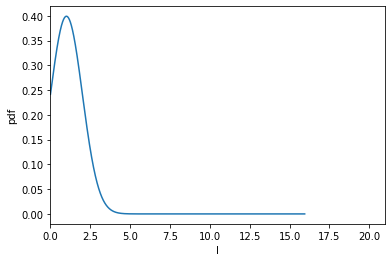

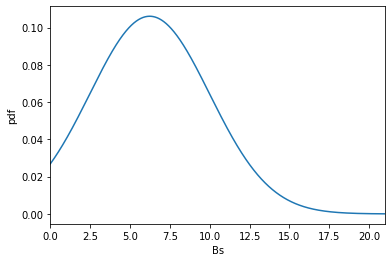

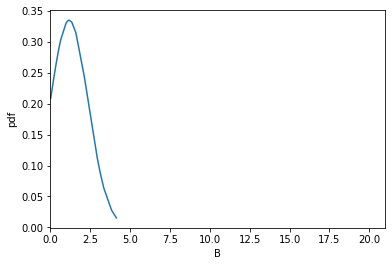

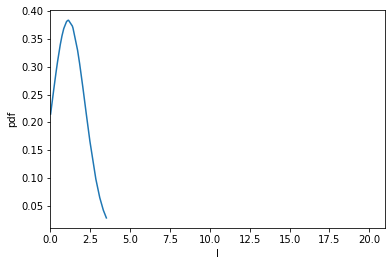

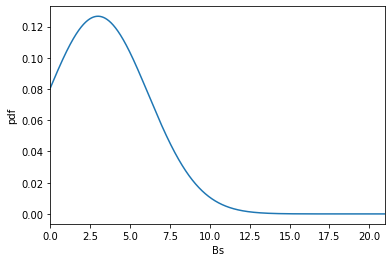

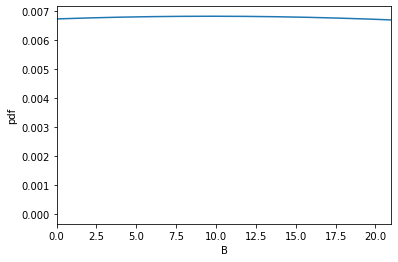

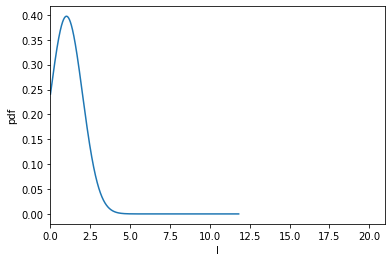

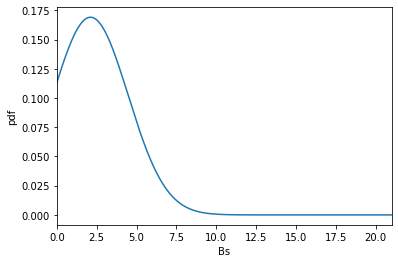

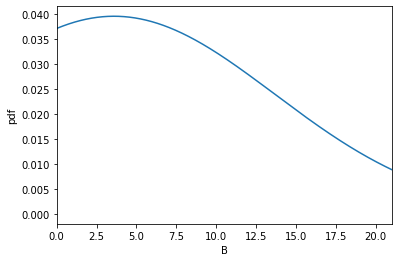

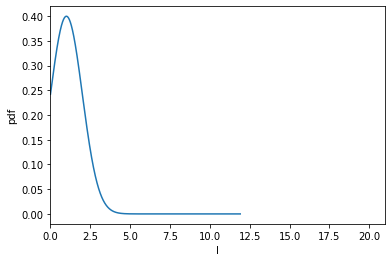

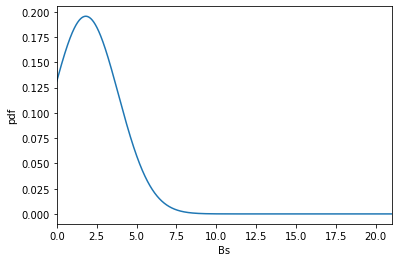

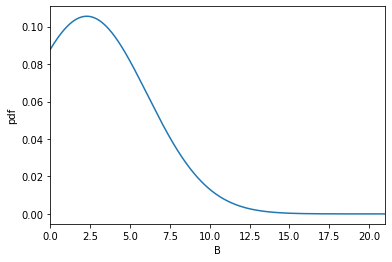

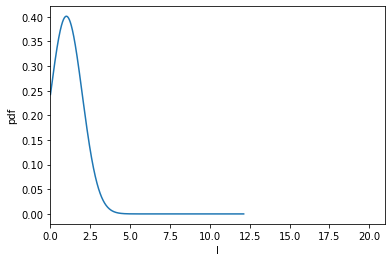

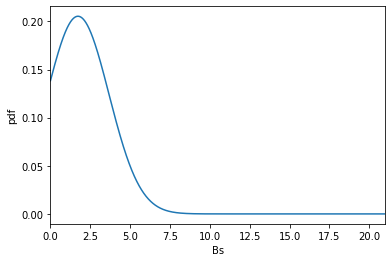

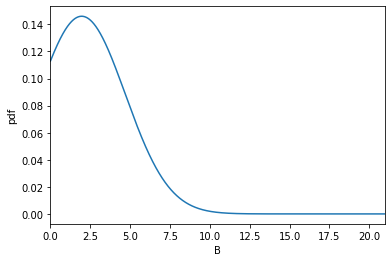

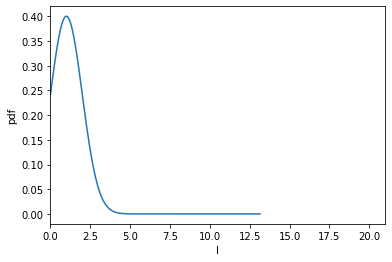

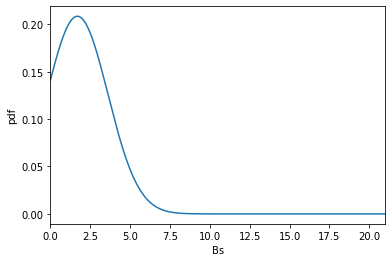

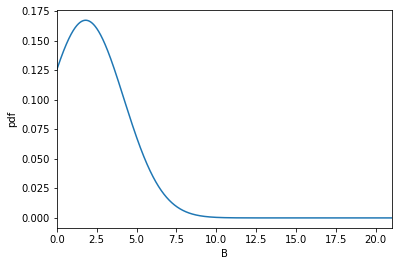

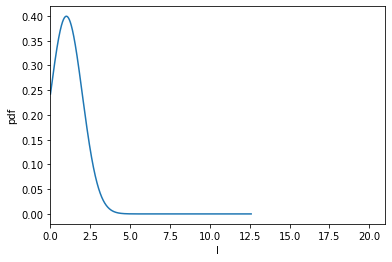

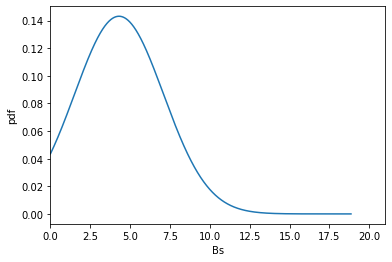

/tmp/ipykernel_41673/691431514.py:18: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


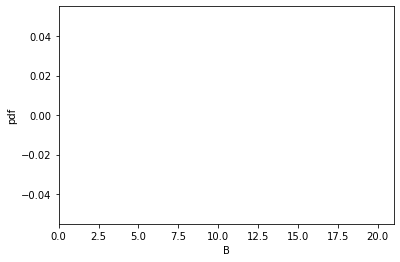

/tmp/ipykernel_41673/691431514.py:27: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


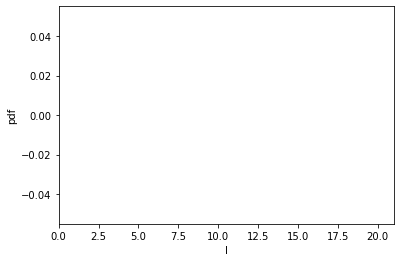

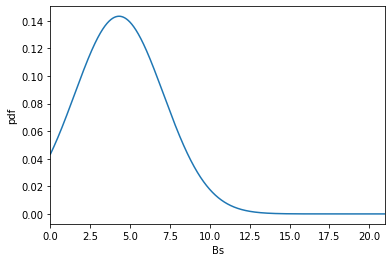

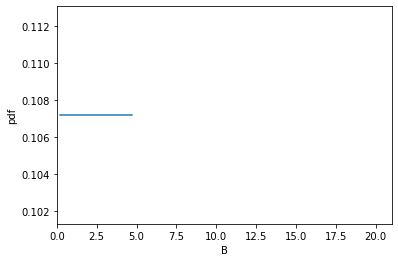

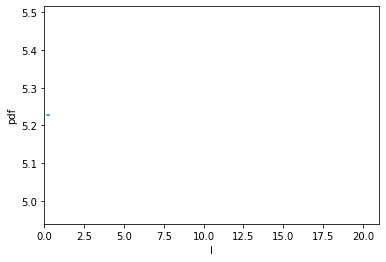

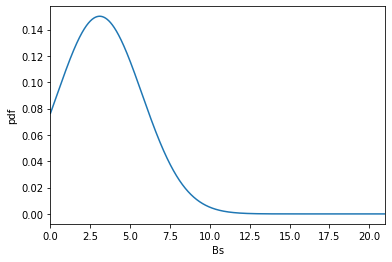

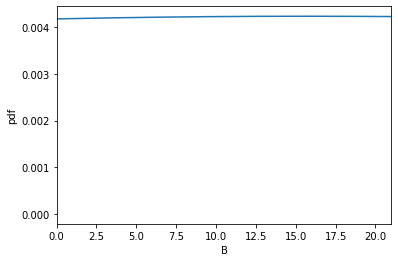

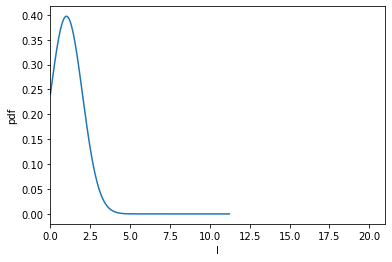

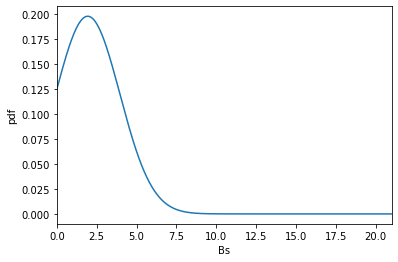

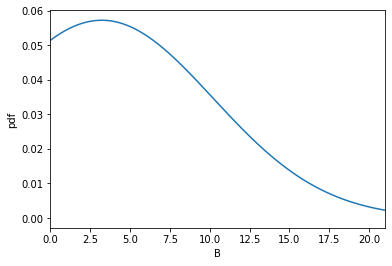

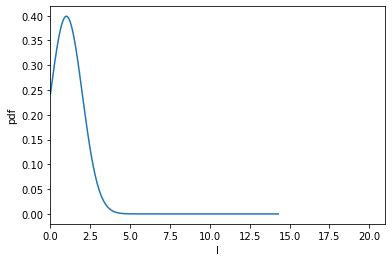

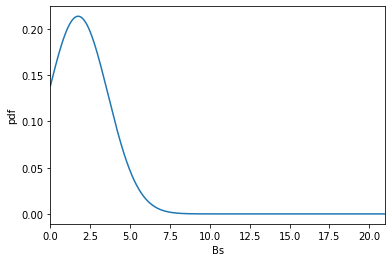

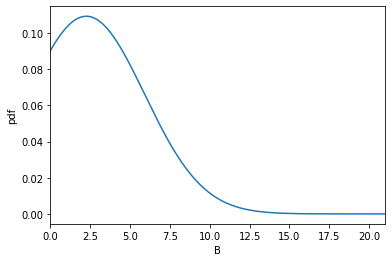

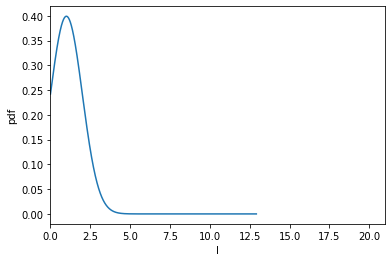

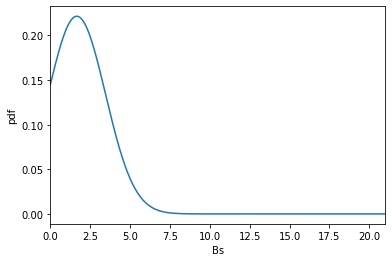

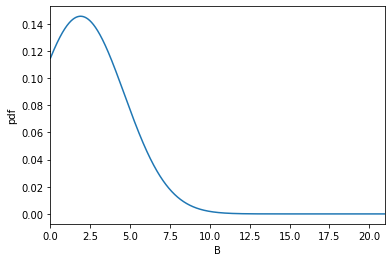

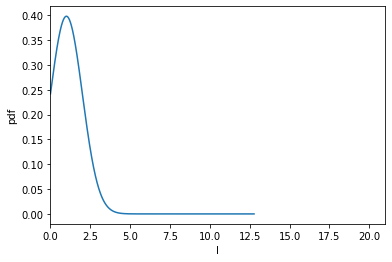

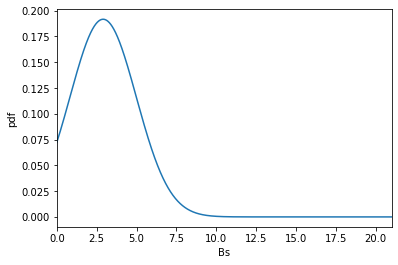

/home/adityo/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


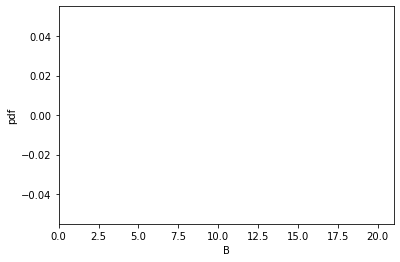

/home/adityo/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


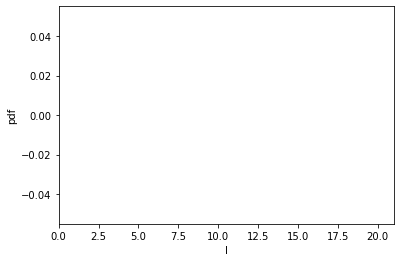

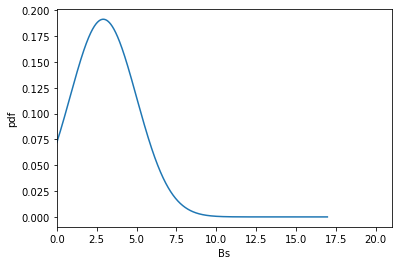

/home/adityo/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


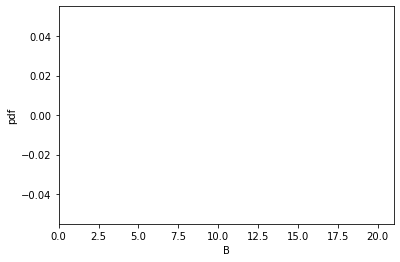

/home/adityo/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


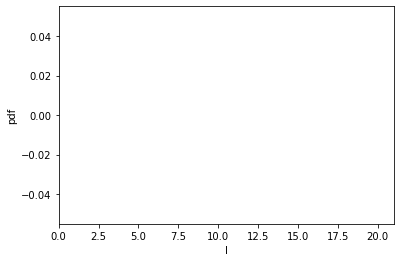

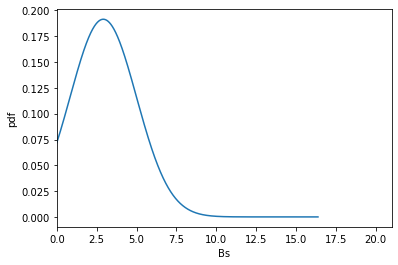

/tmp/ipykernel_41673/691431514.py:18: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


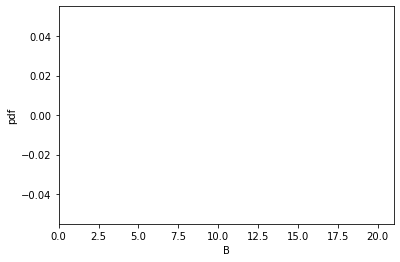

/tmp/ipykernel_41673/691431514.py:27: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


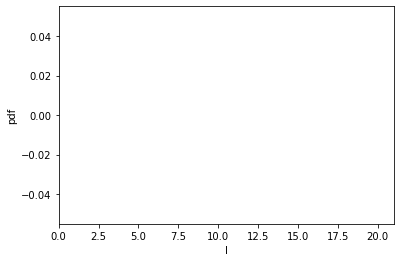

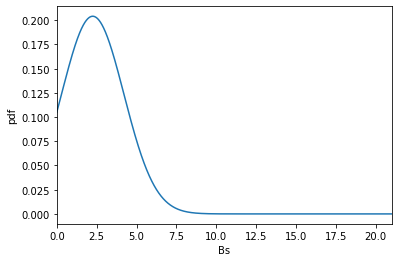

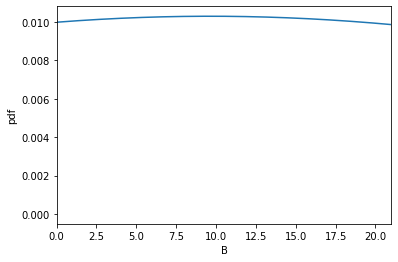

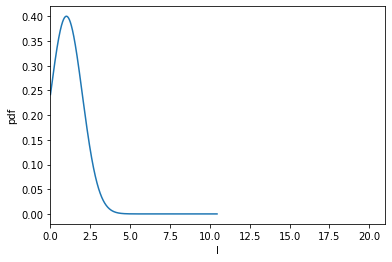

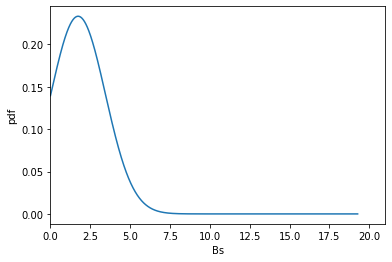

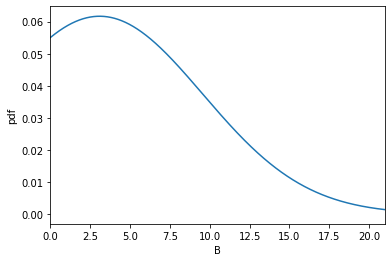

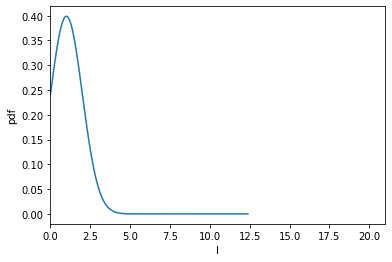

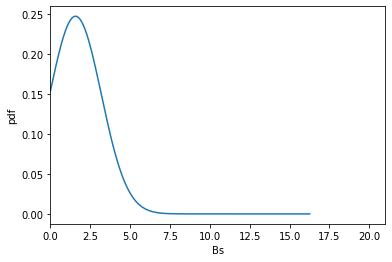

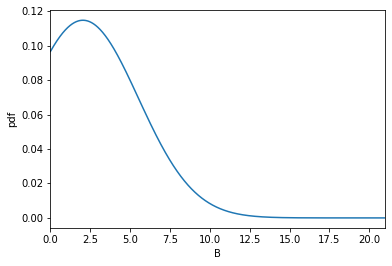

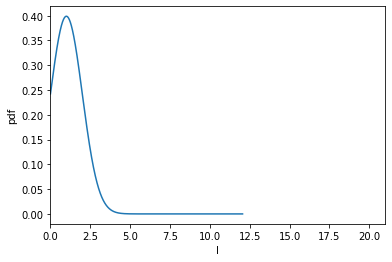

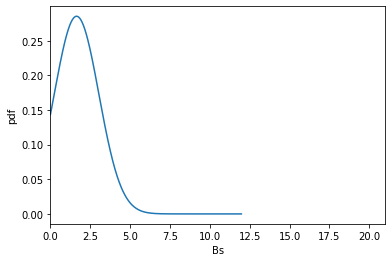

/tmp/ipykernel_41673/691431514.py:18: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


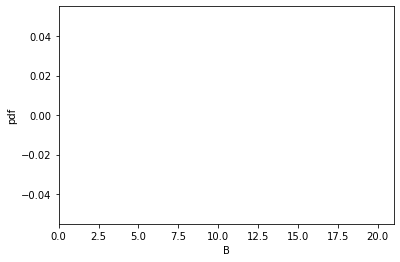

/tmp/ipykernel_41673/691431514.py:27: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


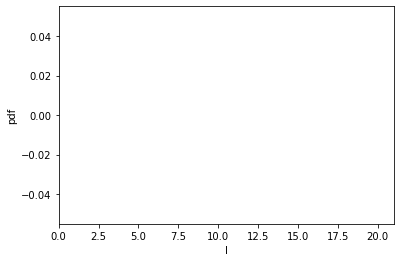

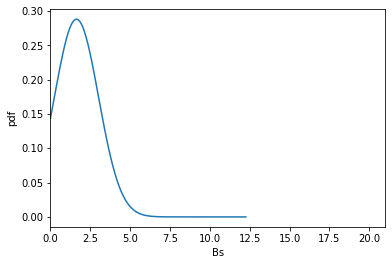

/tmp/ipykernel_41673/691431514.py:18: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


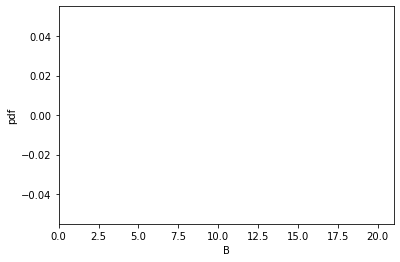

/tmp/ipykernel_41673/691431514.py:27: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


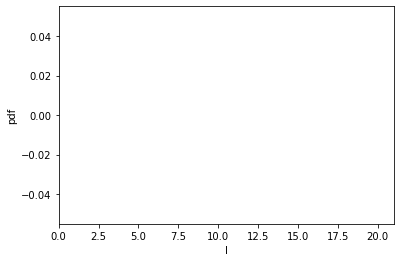

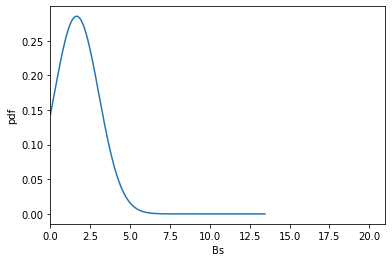

/tmp/ipykernel_41673/691431514.py:18: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


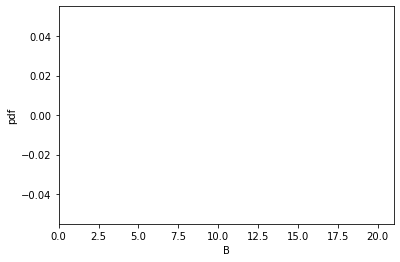

/tmp/ipykernel_41673/691431514.py:27: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


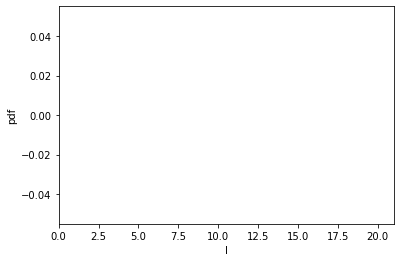

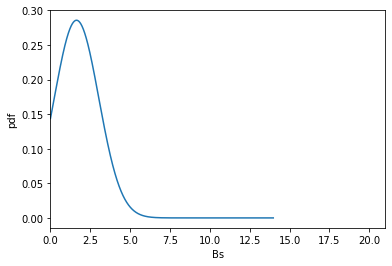

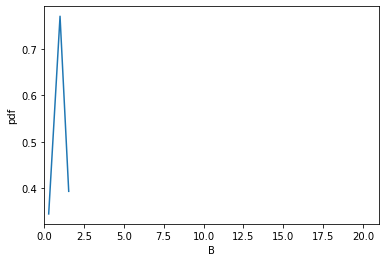

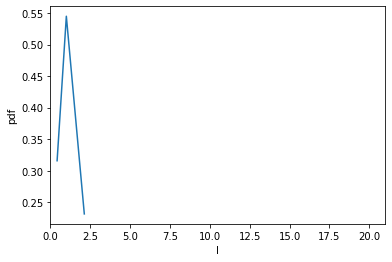

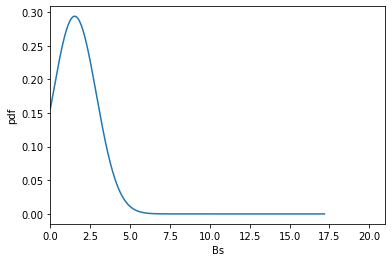

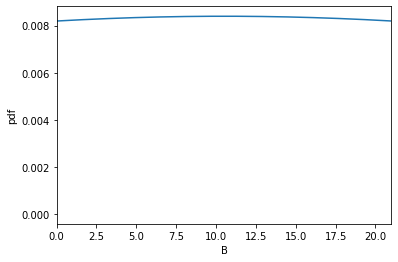

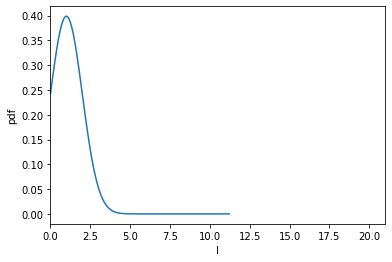

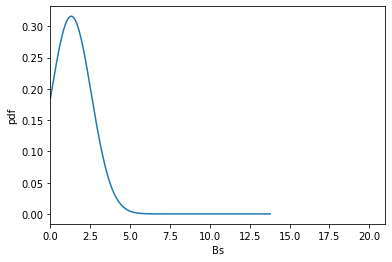

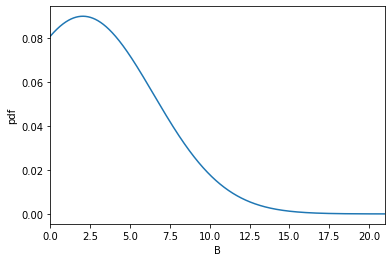

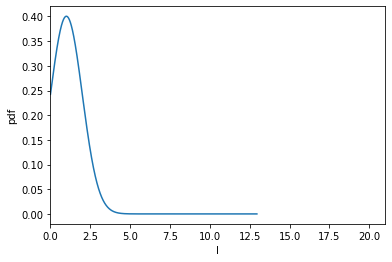

In [4]:
max_lim = 20

i = 0
for pb in [0.01, 0.05, 0.1, 0.2, 0.5]:
    ps = 1-pb
    for mu_b in [0.05,0.1,0.2,0.5,1,2]:
        data = np.sort(np.array([b[1]-b[0] for b in measurements[i][0][:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
        plt.xlim([0, max_lim+1])
        plt.xlabel('Bs')
        plt.ylabel('pdf')
        #plt.savefig('graphs_v3/'+str(i)+') Bs '+str(mu_b)+' '+str(pb)+'.png', bbox_inches='tight')
        plt.show()

        data = np.sort(np.array([b[1]-b[0] for b in measurements[i][1][:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
        plt.xlim([0, max_lim+1])
        plt.xlabel('B')
        plt.ylabel('pdf')
        #plt.savefig('graphs_v3/'+str(i)+') B '+str(mu_b)+' '+str(pb)+'.png', bbox_inches='tight')
        plt.show()

        data = np.sort(np.array([b[1]-b[0] for b in measurements[i][2][:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
        plt.xlim([0, max_lim+1])
        plt.xlabel('I')
        plt.ylabel('pdf')
        #plt.savefig('graphs_v3/'+str(i)+') I '+str(mu_b)+' '+str(pb)+'.png', bbox_inches='tight')
        plt.show()
        
        i+= 1

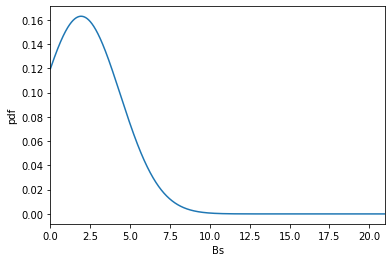

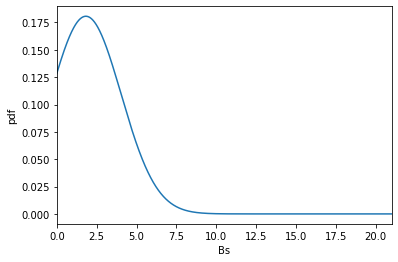

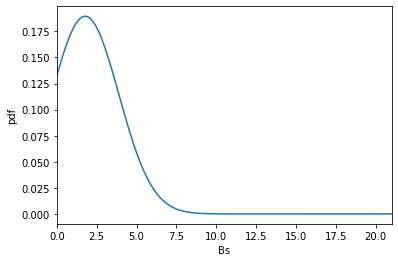

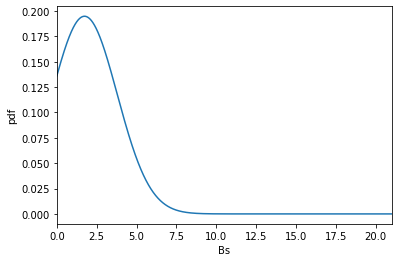

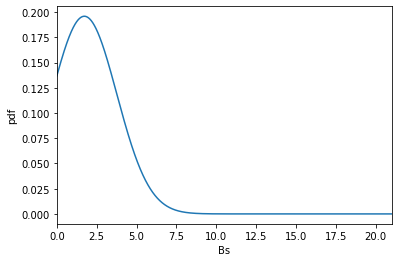

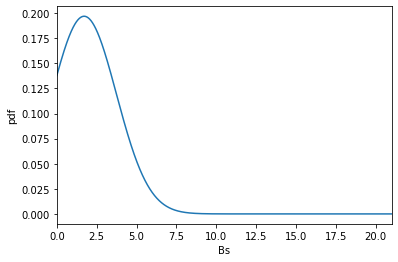

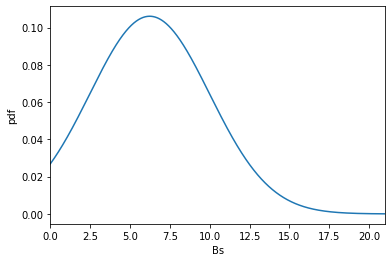

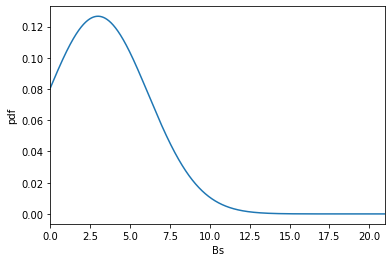

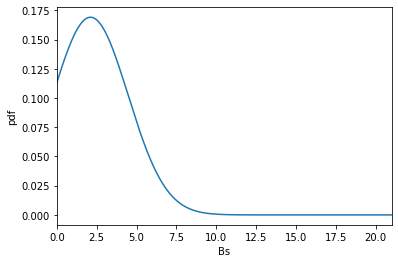

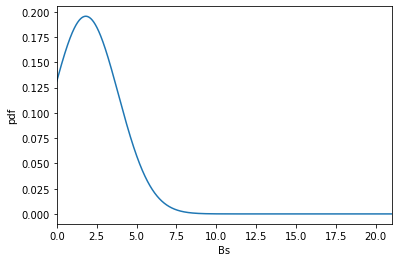

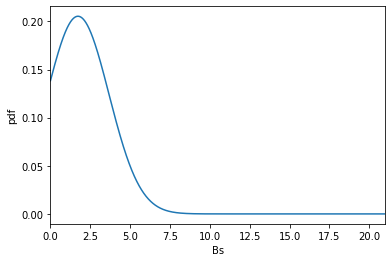

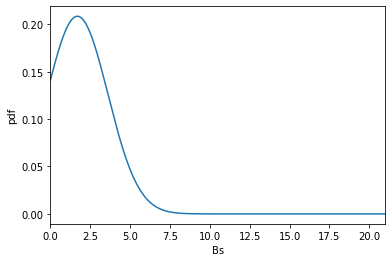

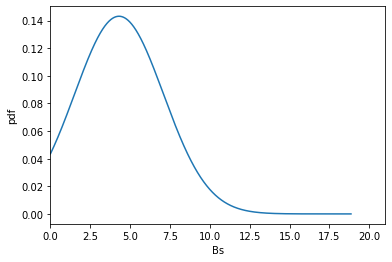

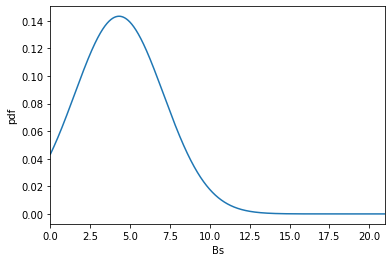

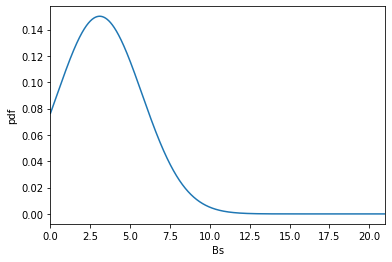

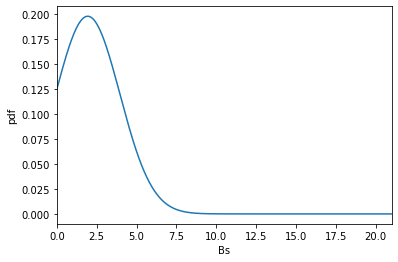

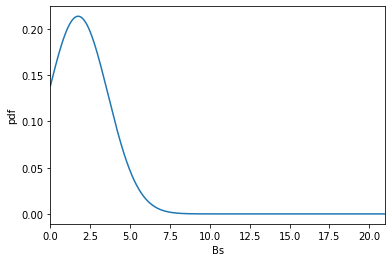

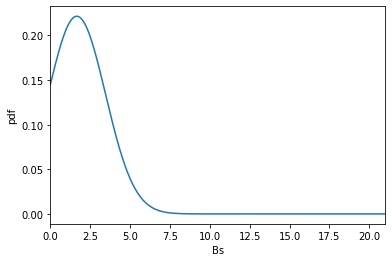

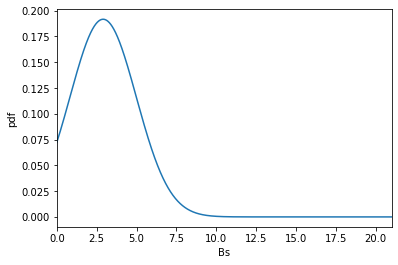

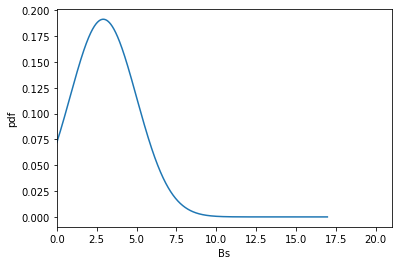

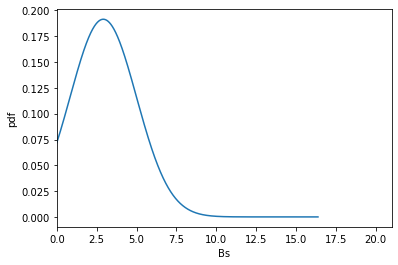

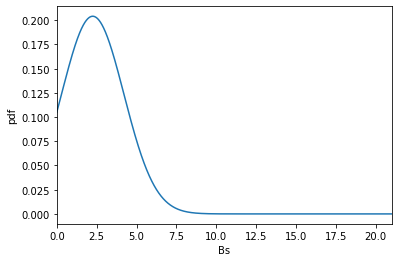

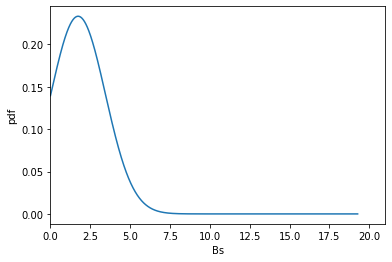

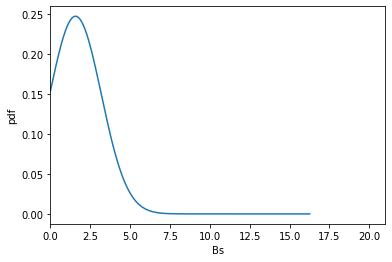

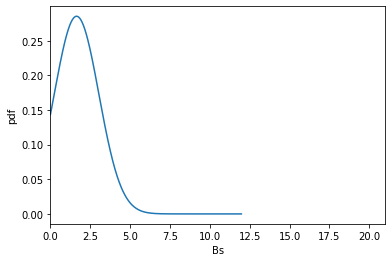

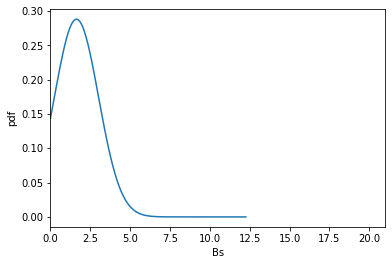

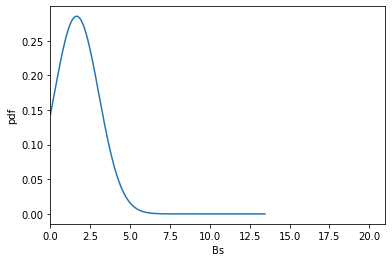

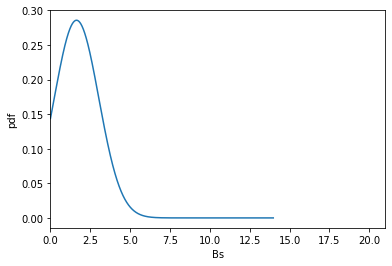

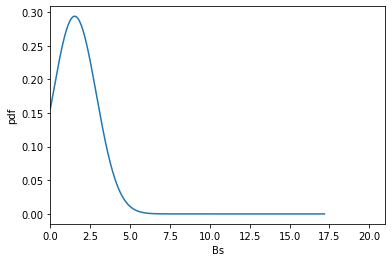

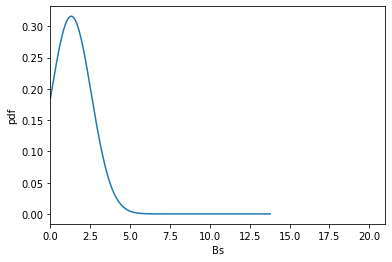

In [8]:
bts = [m[0] for m in measurements]
max_lim = 20

i = 0
for pb in [0.01, 0.05, 0.1, 0.2, 0.5]:
    ps = 1-pb
    for mu_b in [0.05,0.1,0.2,0.5,1,2]:
        data = np.sort(np.array([b[1]-b[0] for b in bts[i][:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
        plt.xlim([0, max_lim+1])
        plt.xlabel('Bs')
        plt.ylabel('pdf')
        plt.savefig('graphs_v2/Bs '+str(i)+') '+str(mu_b)+' '+str(pb)+'.png', bbox_inches='tight')
        plt.show()
        i+=1

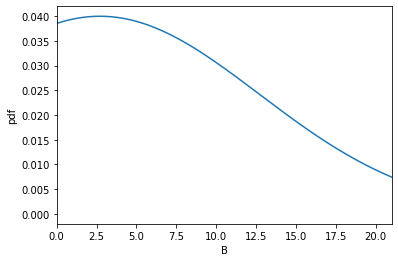

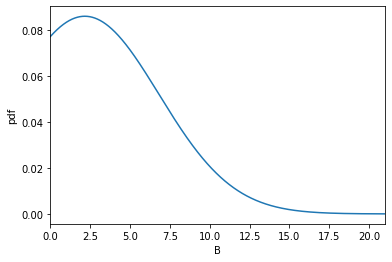

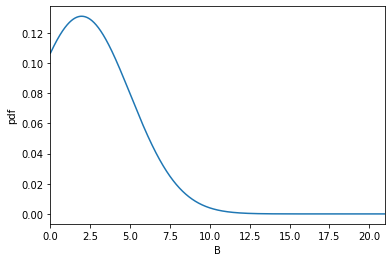

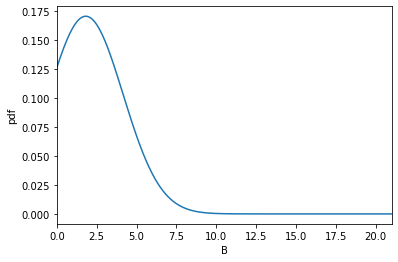

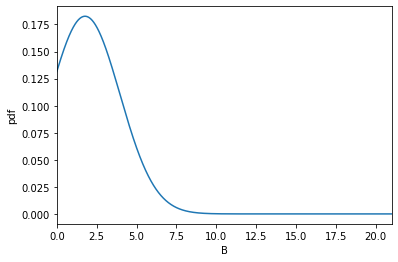

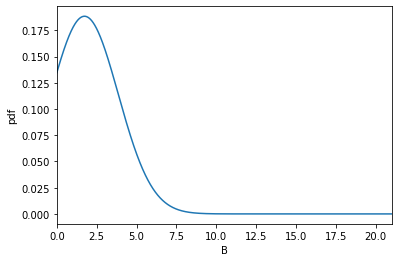

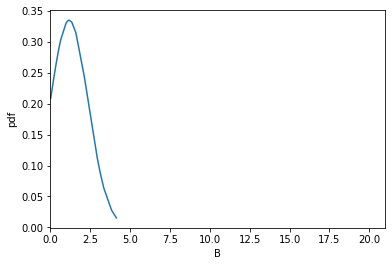

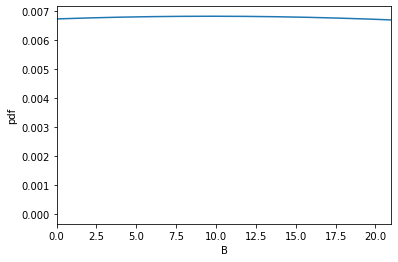

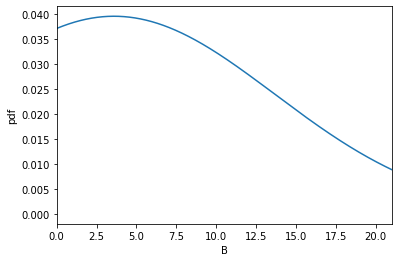

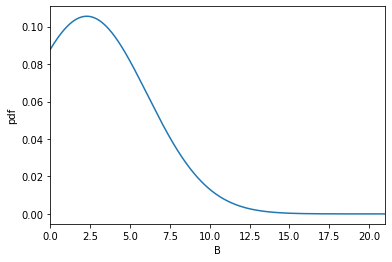

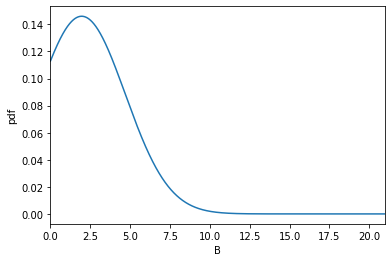

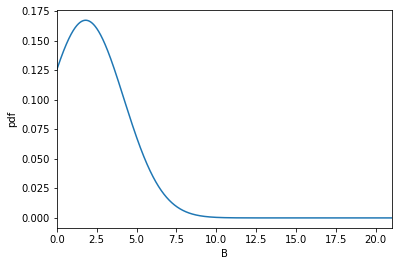

/tmp/ipykernel_4407/4224672925.py:10: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


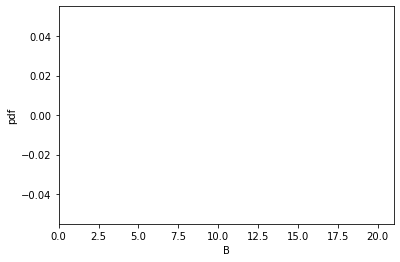

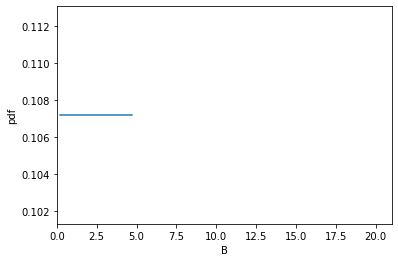

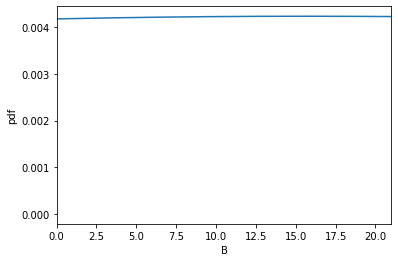

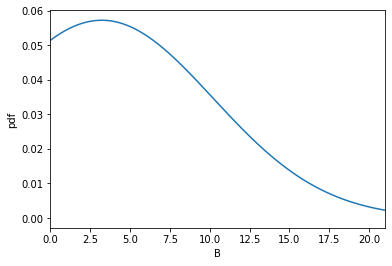

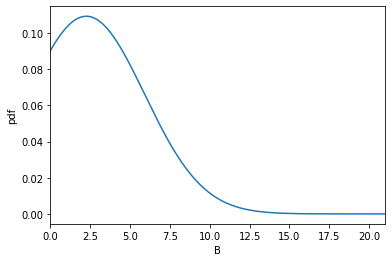

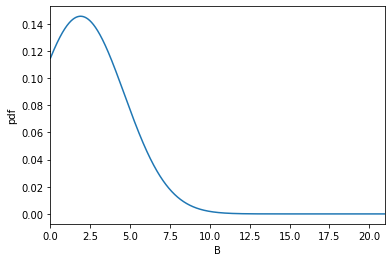

/home/adityo/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


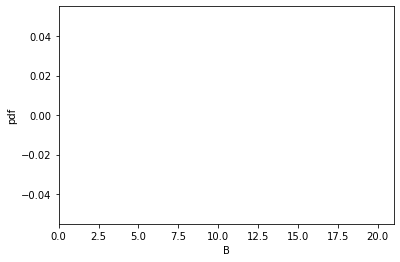

/home/adityo/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


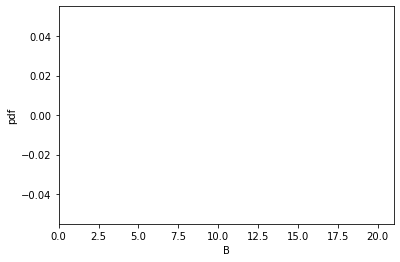

/tmp/ipykernel_4407/4224672925.py:10: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


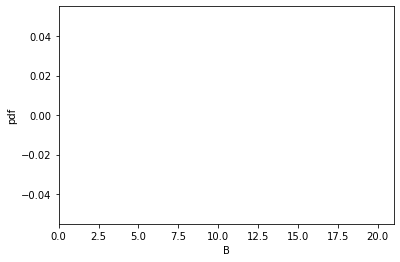

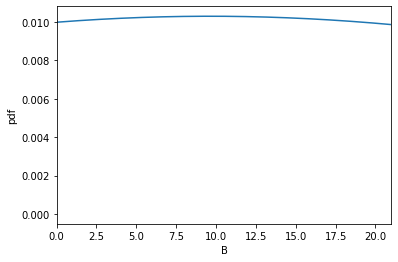

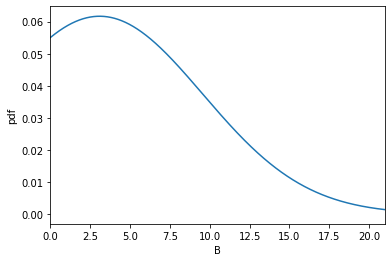

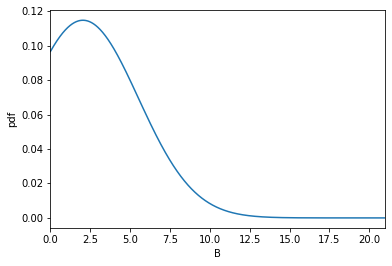

/tmp/ipykernel_4407/4224672925.py:10: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


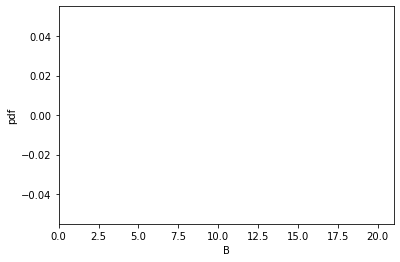

/tmp/ipykernel_4407/4224672925.py:10: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


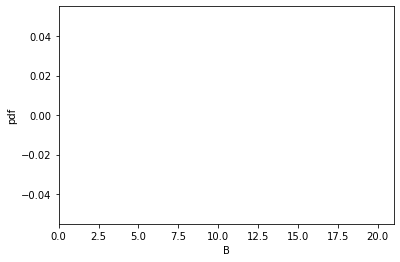

/tmp/ipykernel_4407/4224672925.py:10: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


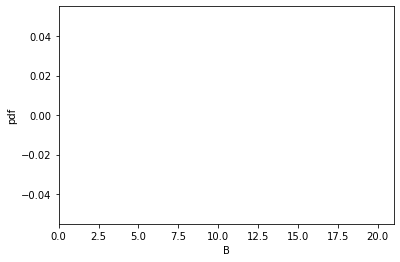

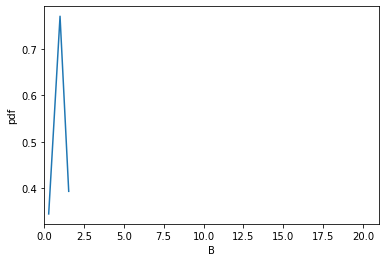

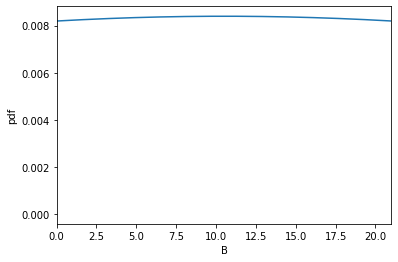

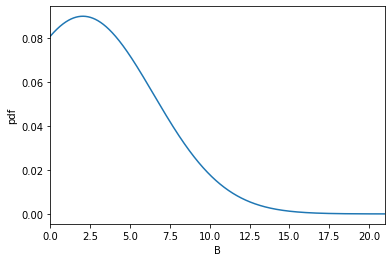

In [9]:
bta = [m[1] for m in measurements]
max_lim = 20

i = 0
for pb in [0.01, 0.05, 0.1, 0.2, 0.5]:
    ps = 1-pb
    for mu_b in [0.05,0.1,0.2,0.5,1,2]:
        data = np.sort(np.array([b[1]-b[0] for b in bta[i][:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
        plt.xlim([0, max_lim+1])
        plt.xlabel('B')
        plt.ylabel('pdf')
        plt.savefig('graphs_v2/B '+str(i)+') '+str(mu_b)+' '+str(pb)+'.png', bbox_inches='tight')
        plt.show()
        i+=1

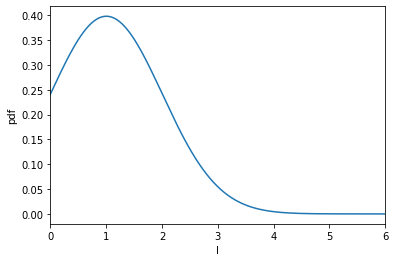

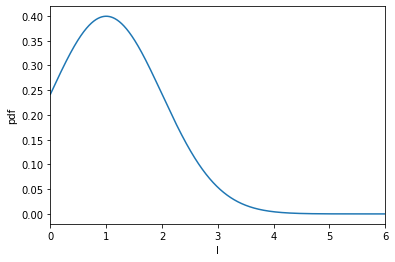

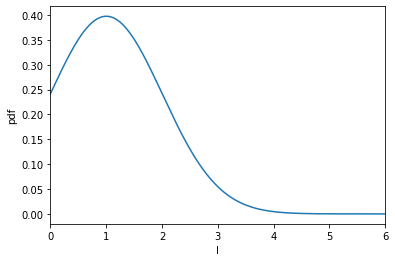

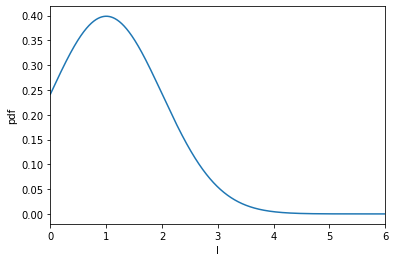

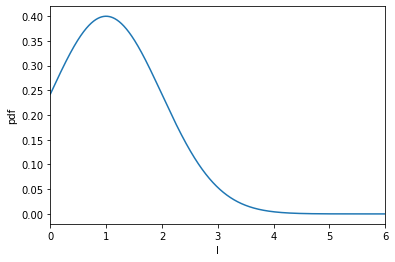

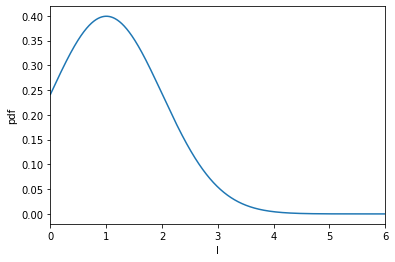

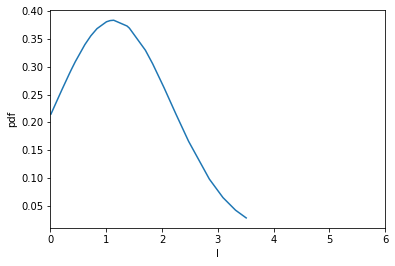

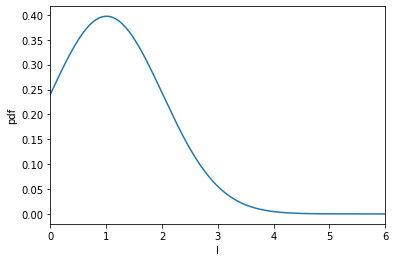

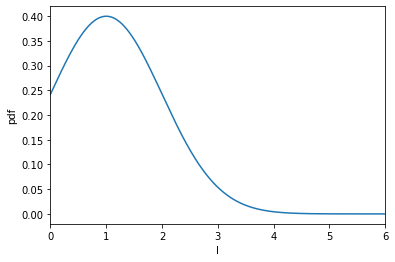

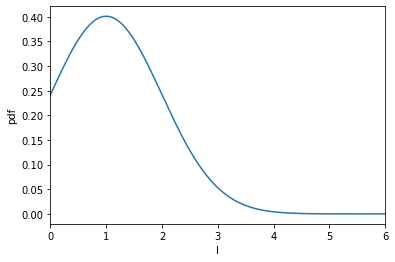

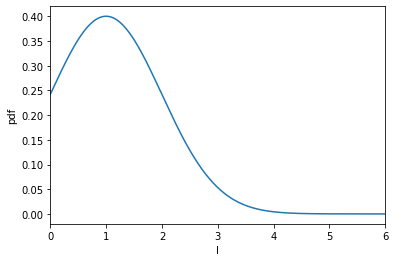

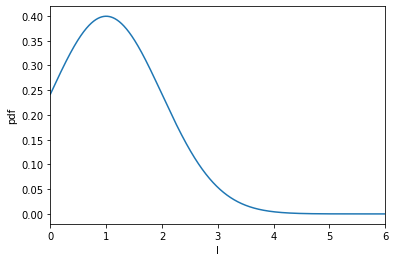

/tmp/ipykernel_4238/334878102.py:10: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


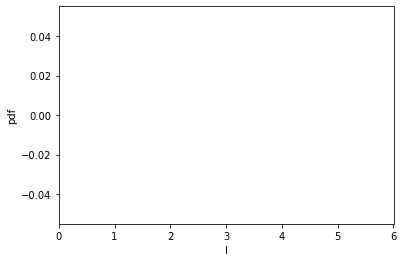

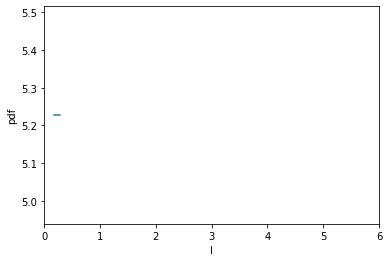

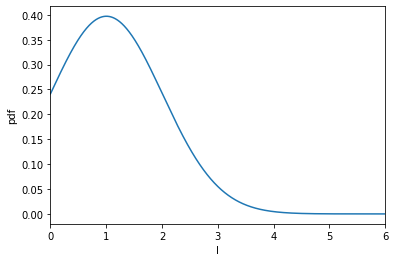

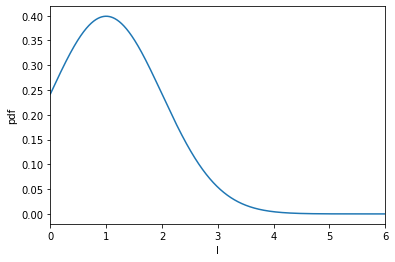

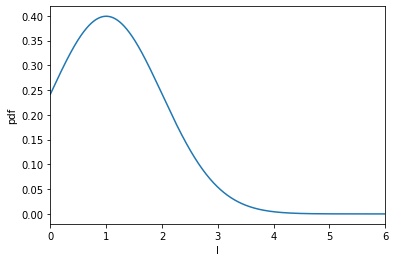

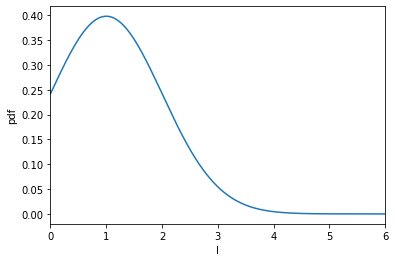

/home/adityo/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


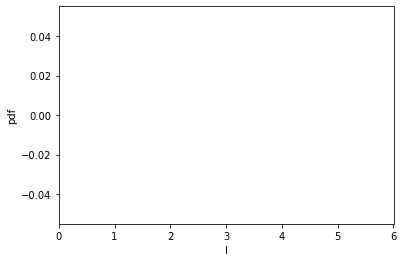

/home/adityo/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


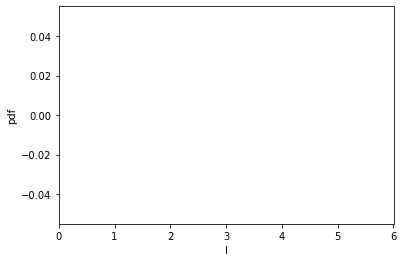

/tmp/ipykernel_4238/334878102.py:10: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


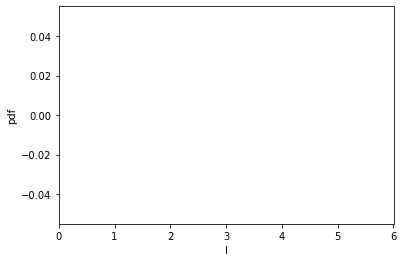

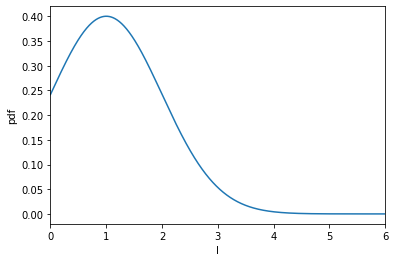

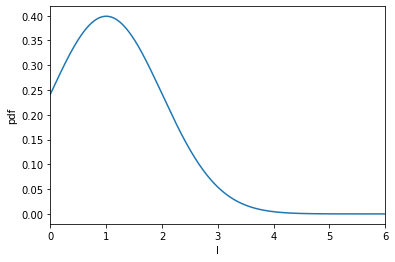

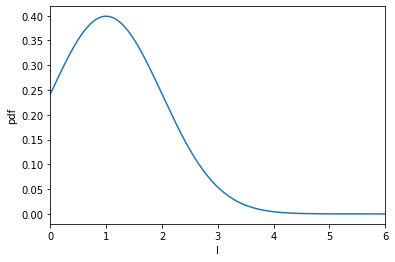

/tmp/ipykernel_4238/334878102.py:10: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


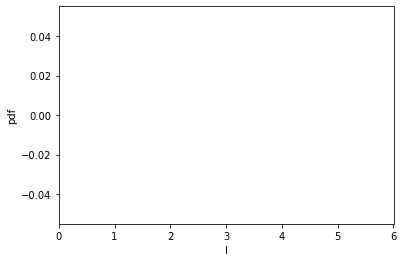

/tmp/ipykernel_4238/334878102.py:10: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


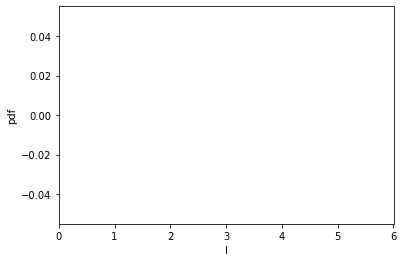

/tmp/ipykernel_4238/334878102.py:10: RuntimeWarning: Mean of empty slice.
  plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


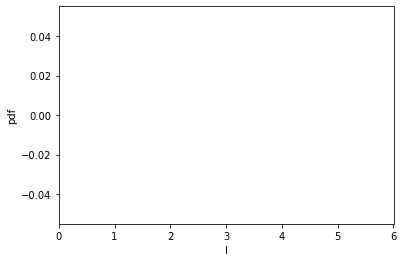

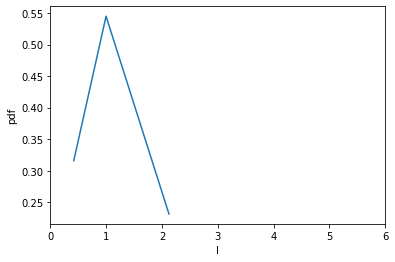

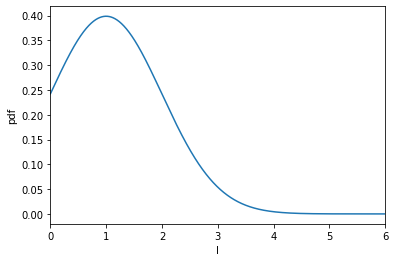

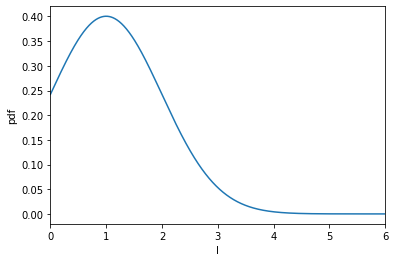

In [4]:
ip = [m[2] for m in measurements]
max_lim = 5

i = 0
for pb in [0.01, 0.05, 0.1, 0.2, 0.5]:
    ps = 1-pb
    for mu_b in [0.05,0.1,0.2,0.5,1,2]:
        data = np.sort(np.array([b[1]-b[0] for b in ip[i][:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
        plt.xlim([0, max_lim+1])
        plt.xlabel('I')
        plt.ylabel('pdf')
        plt.savefig('graphs_v2/I '+str(i)+') '+str(mu_b)+' '+str(pb)+'.png', bbox_inches='tight')
        plt.show()
        i+=1

In [7]:
for idl in ip:
    data = np.sort(np.array([b[1]-b[0] for b in idl[:-1]]))
    print(data.mean())
    print(data.std())

1.0024298199724313
1.0024529878483974
0.9994850574449575
0.9986363155673978
1.0010384523058236
1.0037592146314724
1.0005771144429443
1.0005860437208134
0.9969156983278936
0.9981469233977318
1.0021521371150535
0.9998291494862619
1.128934401710984
1.0399160653450363
1.0050758842949374
1.004379391305439
1.0003260994667524
0.9983852827867257
0.9987274733415475
0.9947554250377759
0.9970959574347964
0.9967149462294148
0.9984161305961797
0.9985173217412866
nan
nan
0.2307847202816335
0.04628813528332126
1.002812058195966
1.0045221299670541
0.9985104188497047
1.0002195381654206
0.9996173510212042
0.9996894742932747


/tmp/ipykernel_4238/2965630863.py:3: RuntimeWarning: Mean of empty slice.
  print(data.mean())
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/adityo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1.0007745228180809
1.0024256453189981
0.4620124209496144
0.0
0.6150112647625552
0.0
nan
nan
1.0006101181323397
0.9963323380468333
1.0001200295688901
1.0002466768407419
0.9984983482719283
1.0000314005402855
nan
nan
nan
nan
nan
nan
1.1791240171809845
0.7083467967785065
0.9977666974064489
1.0003412319923166
0.9985331095051432
0.9962339285088265


In [11]:
measurements[-1][1]

[[0.5248437147324589, 3.7758294848636105],
 [3.948945741797033, 4.559947251286668],
 [5.75302132943894, 6.758057579005189],
 [8.008658509876183, 8.598925918651801],
 [8.737927194277013, 9.304674103355433],
 [10.005349438443623, 10.53624777543777],
 [10.588562270877055, 10.899758742981584],
 [13.143715187301293, 13.5545441246665],
 [18.53788142538462, 19.07142772028676],
 [20.207313703406015, 22.25342992026817],
 [22.642184996187233, 23.67070876919238],
 [25.860371495632126, 26.784914294905196],
 [27.720892464589763, 28.393695543960465],
 [29.253455232256414, 29.808981130100985],
 [32.817507968298095, 44.100073145763936],
 [45.815229629264564, 49.37966175962013],
 [50.775065378084356, 50.814764720020854],
 [51.17011519331305, 55.77520230206014],
 [56.030327060700685, 56.355568144974136],
 [56.743746190368036, 56.79218942713199],
 [57.52303122214292, 61.41652784217882],
 [61.465635182753516, 70.61955300460863],
 [71.46134069380177, 72.18120961497542],
 [72.4371416167981, 74.8164284033094

In [12]:
measurements[-1][2]

[[0, 0.5248437147324589],
 [3.7758294848636105, 3.948945741797033],
 [4.559947251286668, 5.75302132943894],
 [6.758057579005189, 8.008658509876183],
 [8.598925918651801, 8.737927194277013],
 [9.304674103355433, 10.005349438443623],
 [10.53624777543777, 10.588562270877055],
 [10.899758742981584, 13.143715187301293],
 [13.5545441246665, 18.53788142538462],
 [19.07142772028676, 20.207313703406015],
 [22.25342992026817, 22.642184996187233],
 [23.67070876919238, 25.860371495632126],
 [26.784914294905196, 27.720892464589763],
 [28.393695543960465, 29.253455232256414],
 [29.808981130100985, 32.817507968298095],
 [44.100073145763936, 45.815229629264564],
 [49.37966175962013, 50.775065378084356],
 [50.814764720020854, 51.17011519331305],
 [55.77520230206014, 56.030327060700685],
 [56.355568144974136, 56.743746190368036],
 [56.79218942713199, 57.52303122214292],
 [61.41652784217882, 61.465635182753516],
 [70.61955300460863, 71.46134069380177],
 [72.18120961497542, 72.4371416167981],
 [74.8164284

Total time --- 24.806262016296387 seconds ---
µb: 0.2, pb: 0.01


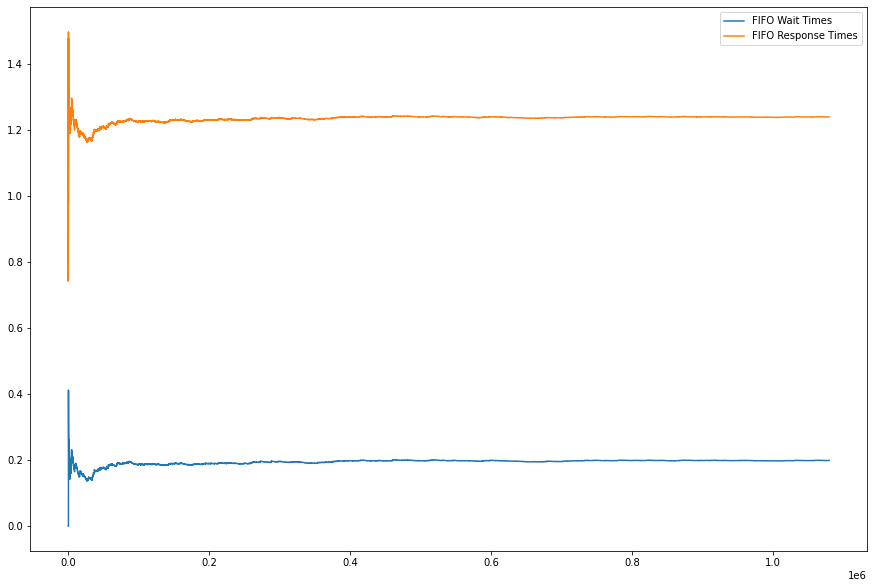

Total time --- 24.985401391983032 seconds ---
µb: 0.2, pb: 0.02


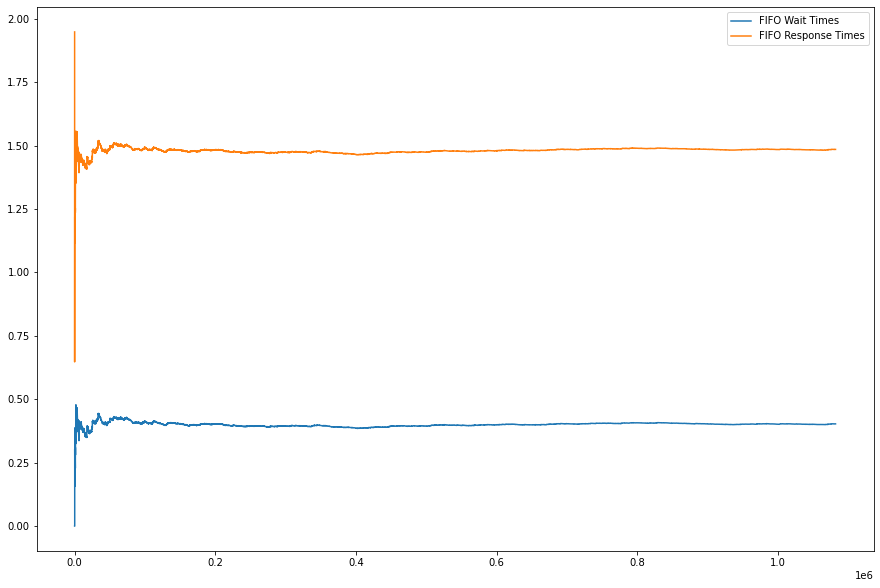

Total time --- 25.16798210144043 seconds ---
µb: 0.2, pb: 0.03


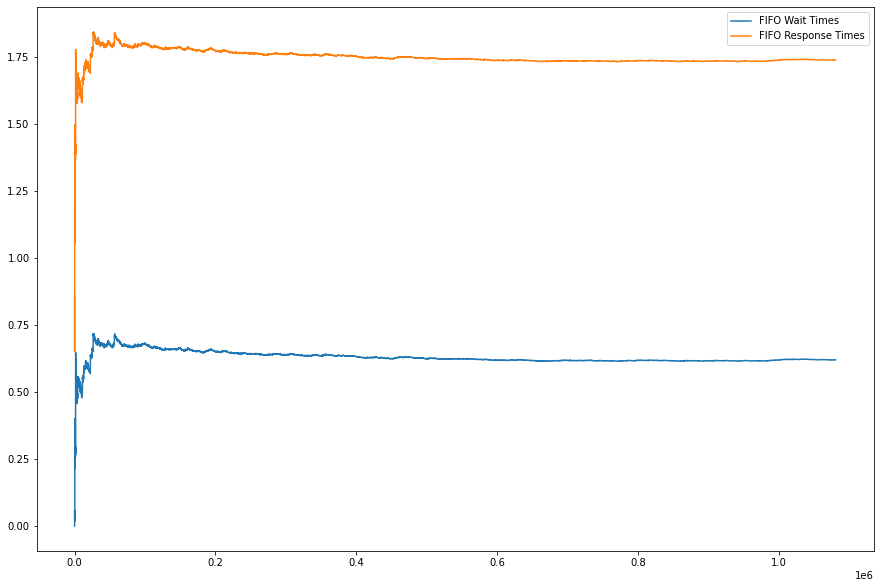

Total time --- 25.412439107894897 seconds ---
µb: 0.2, pb: 0.04


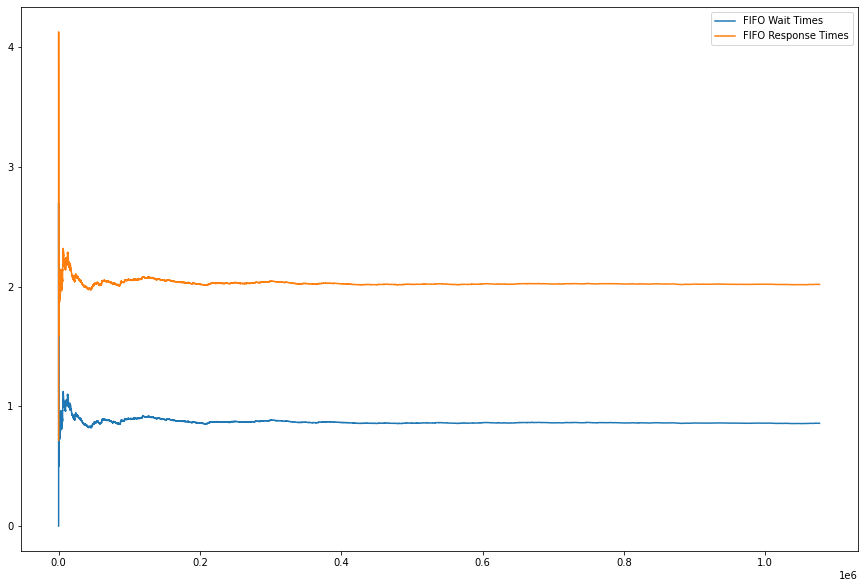

Total time --- 25.75988221168518 seconds ---
µb: 0.2, pb: 0.05


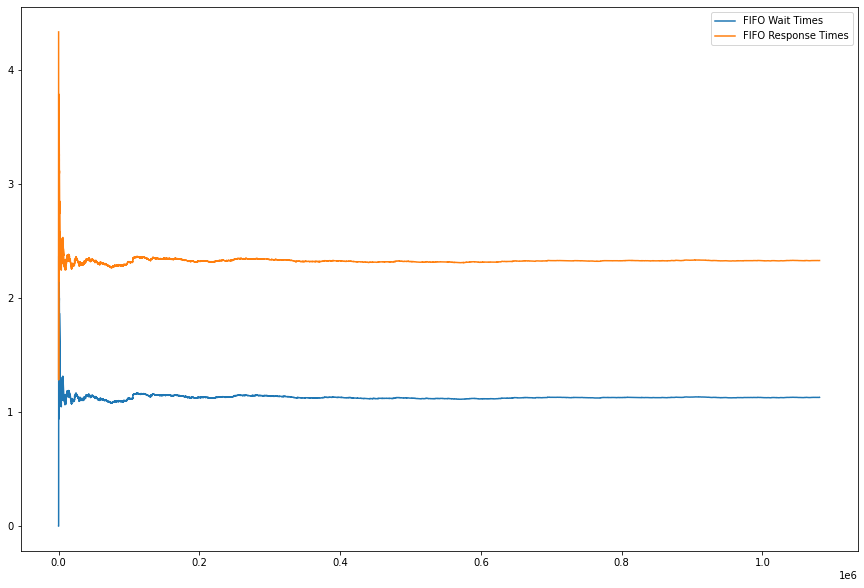

Total time --- 25.902048349380493 seconds ---
µb: 0.2, pb: 0.060000000000000005


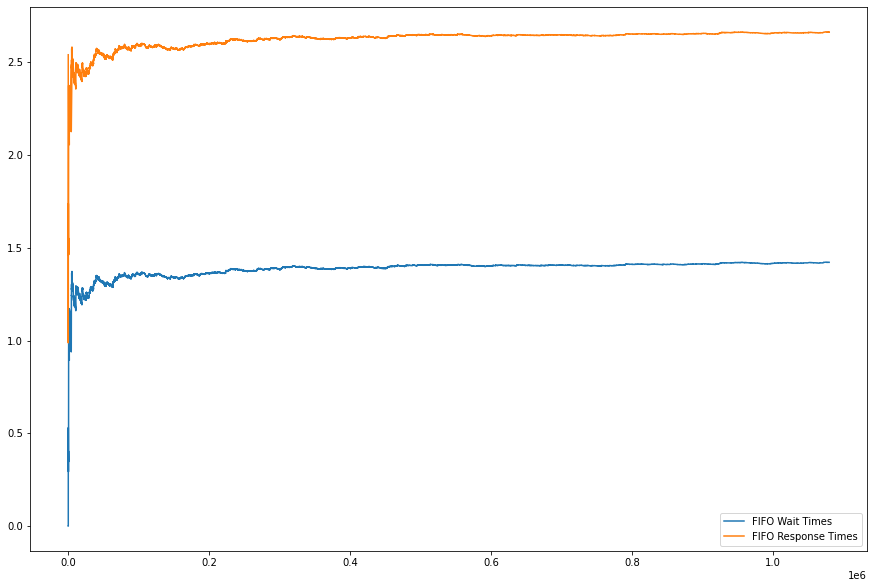

Total time --- 26.029603958129883 seconds ---
µb: 0.2, pb: 0.06999999999999999


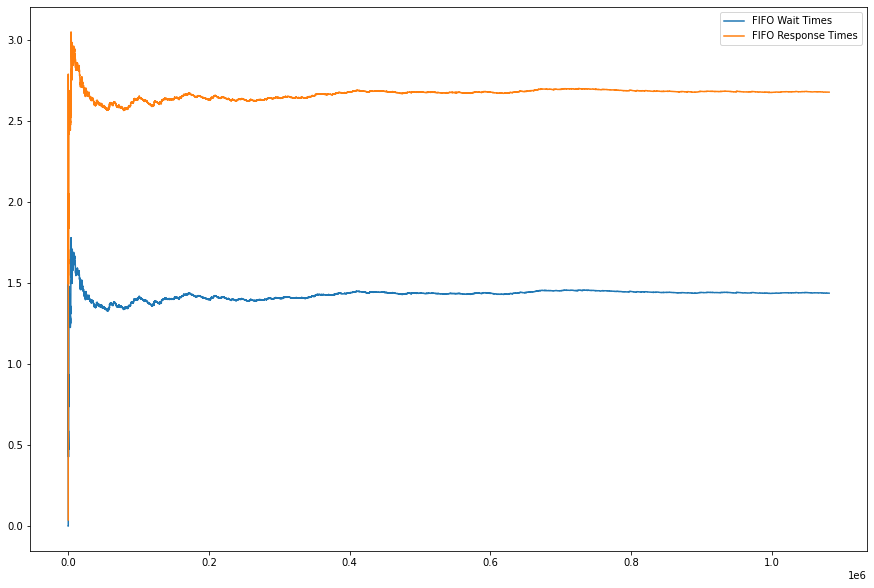

Total time --- 26.742791652679443 seconds ---
µb: 0.2, pb: 0.08


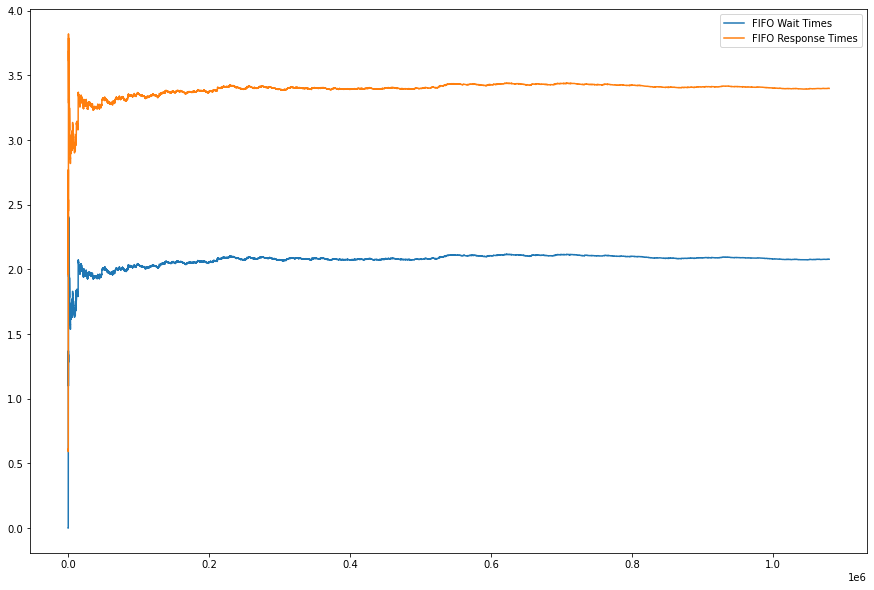

Total time --- 27.16000771522522 seconds ---
µb: 0.2, pb: 0.09


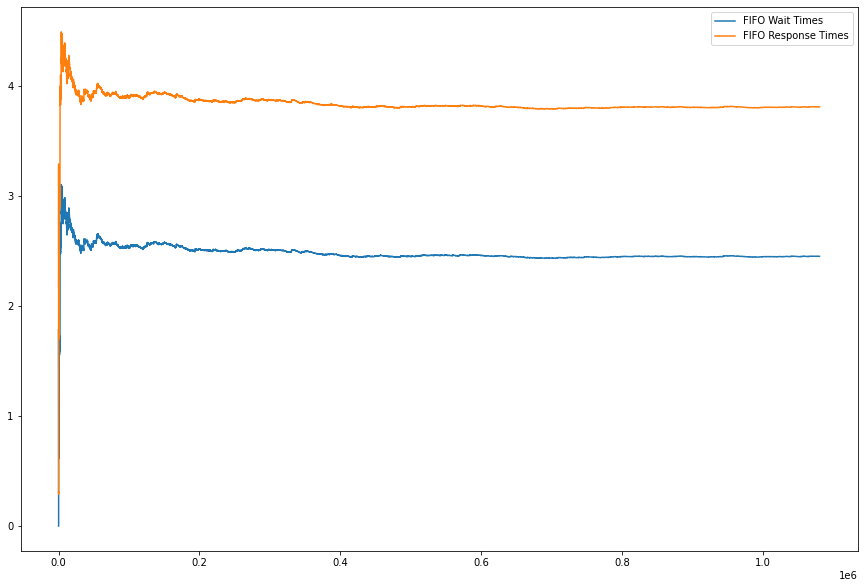

Total time --- 27.369221687316895 seconds ---
µb: 0.2, pb: 0.09999999999999999


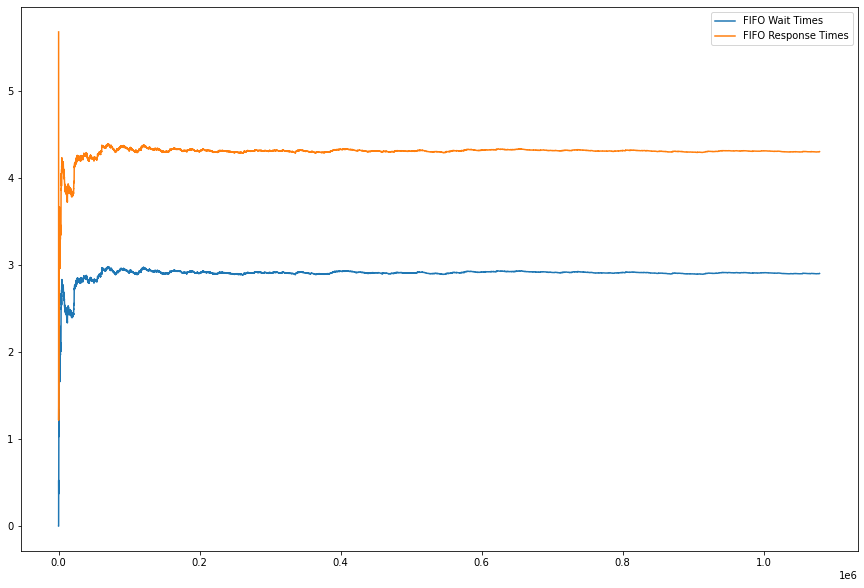

Total time --- 27.611387252807617 seconds ---
µb: 0.2, pb: 0.11


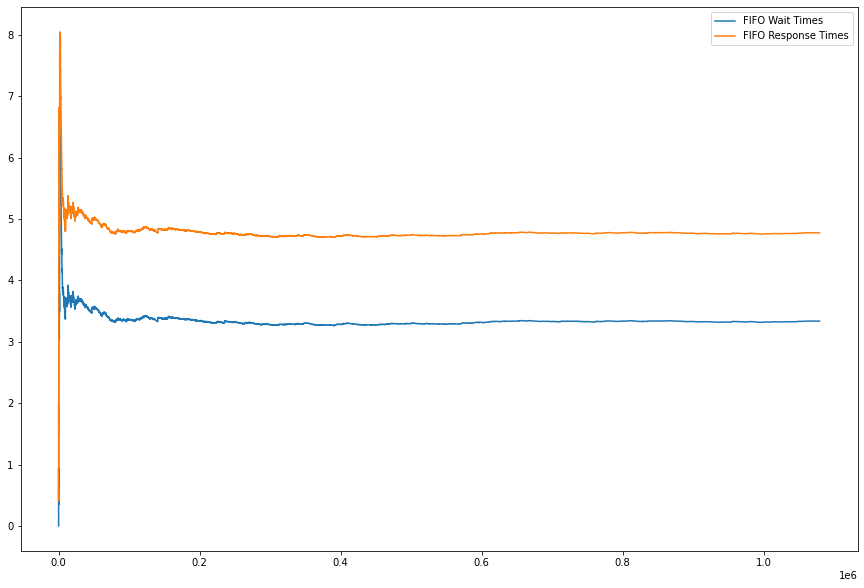

Total time --- 27.921294689178467 seconds ---
µb: 0.2, pb: 0.12


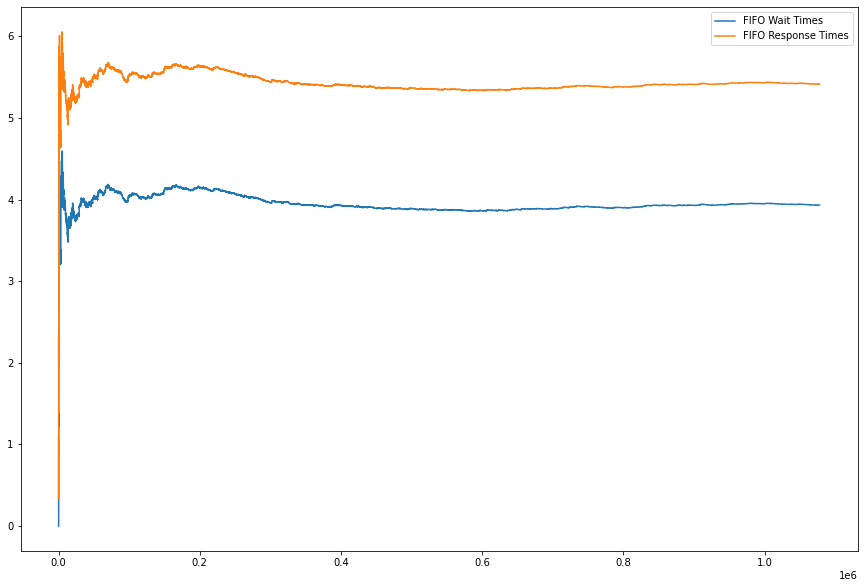

Total time --- 28.31222367286682 seconds ---
µb: 0.2, pb: 0.13


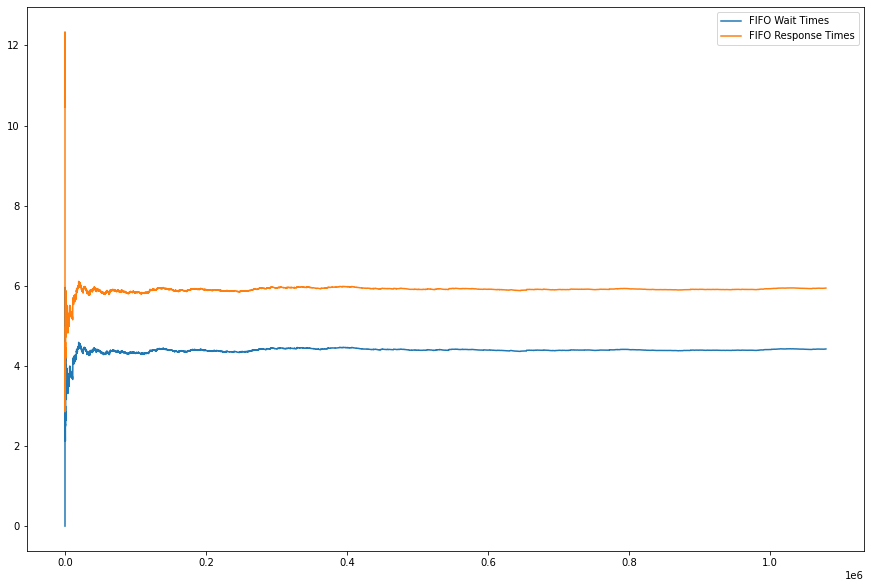

Total time --- 28.61078929901123 seconds ---
µb: 0.2, pb: 0.14


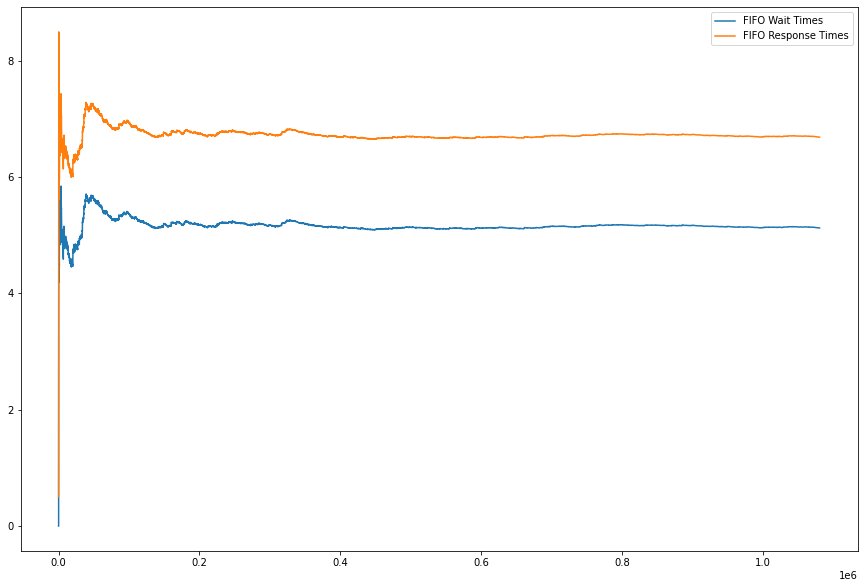

Total time --- 29.65468454360962 seconds ---
µb: 0.2, pb: 0.15000000000000002


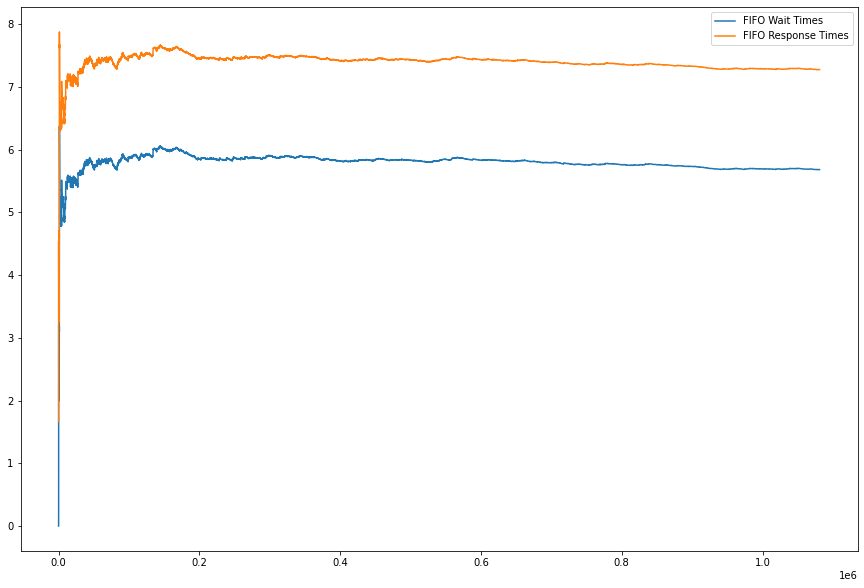

Total time --- 29.345789432525635 seconds ---
µb: 0.2, pb: 0.16


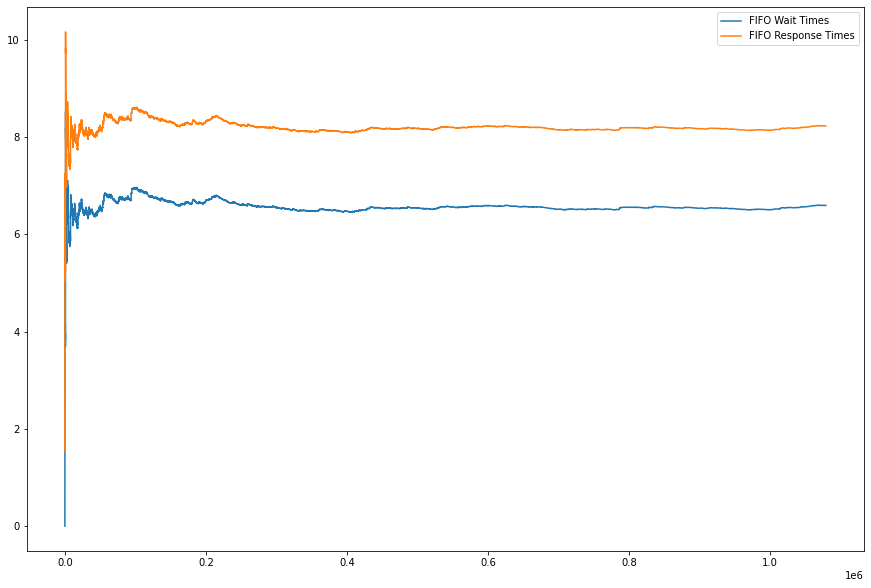

Total time --- 29.679877519607544 seconds ---
µb: 0.2, pb: 0.17


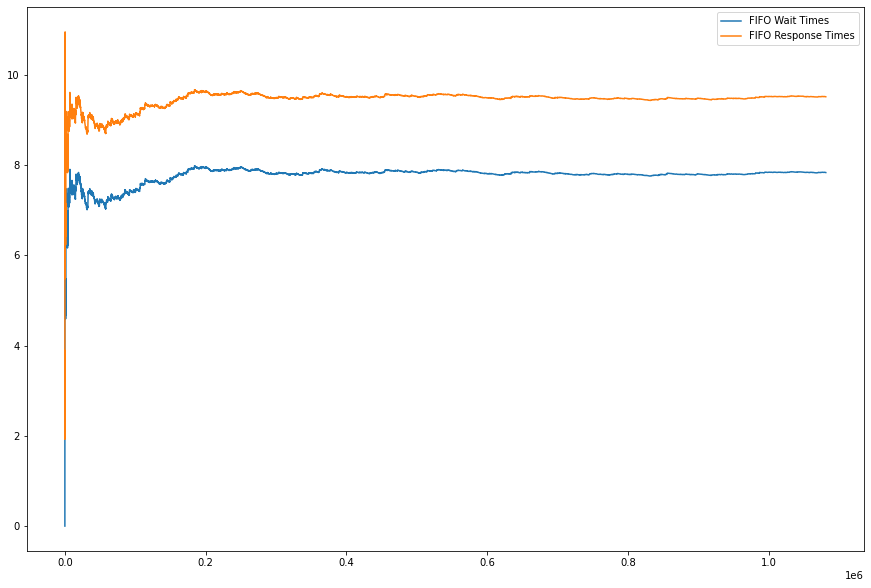

Total time --- 29.75766897201538 seconds ---
µb: 0.2, pb: 0.18000000000000002


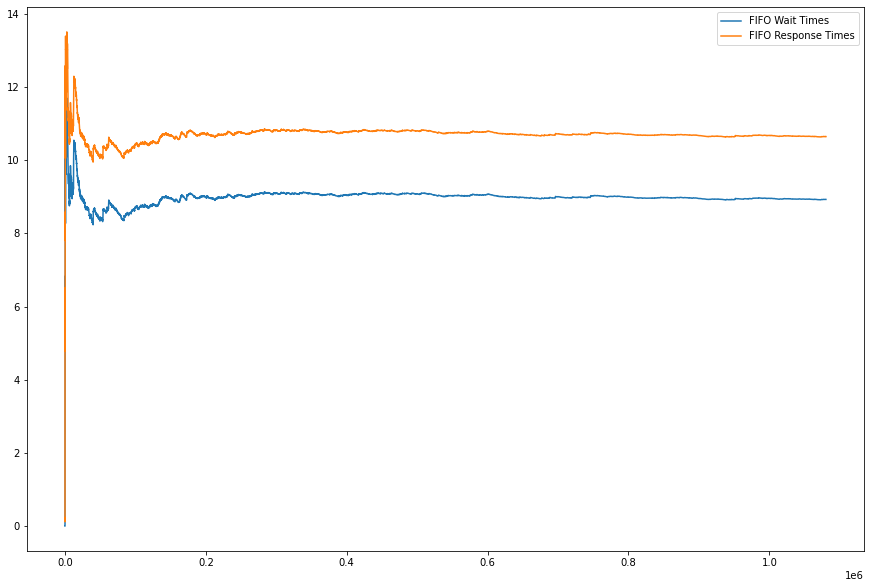

Total time --- 30.111154794692993 seconds ---
µb: 0.2, pb: 0.19


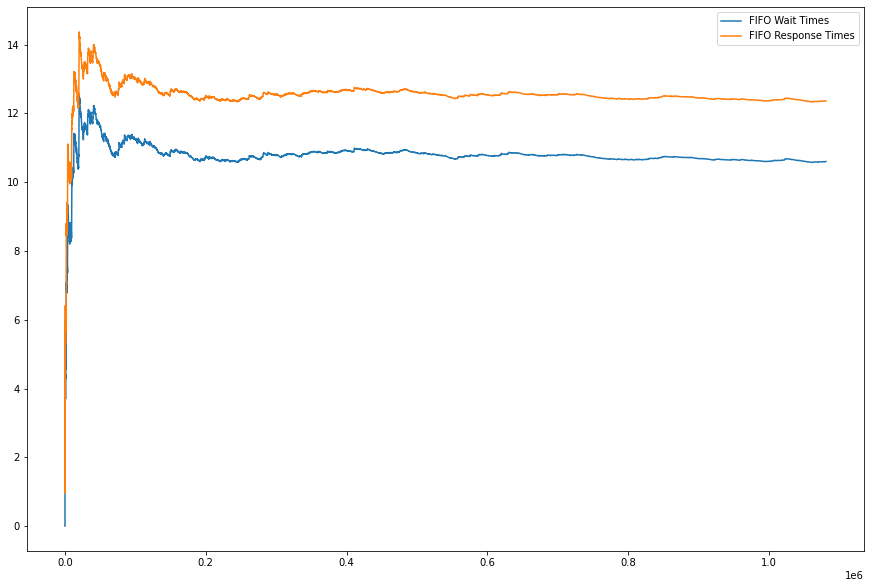

Total time --- 30.434890270233154 seconds ---
µb: 0.2, pb: 0.2


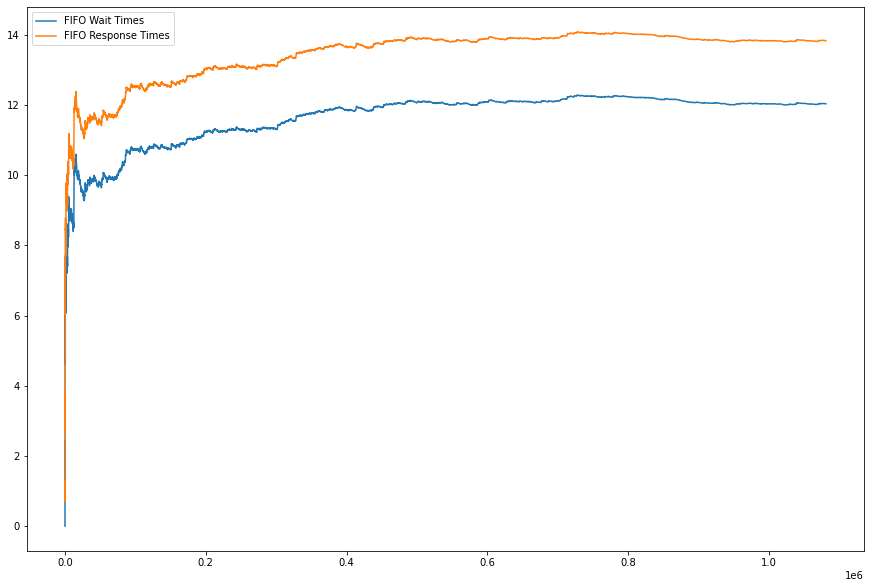

Total time --- 30.824281215667725 seconds ---
µb: 0.2, pb: 0.21000000000000002


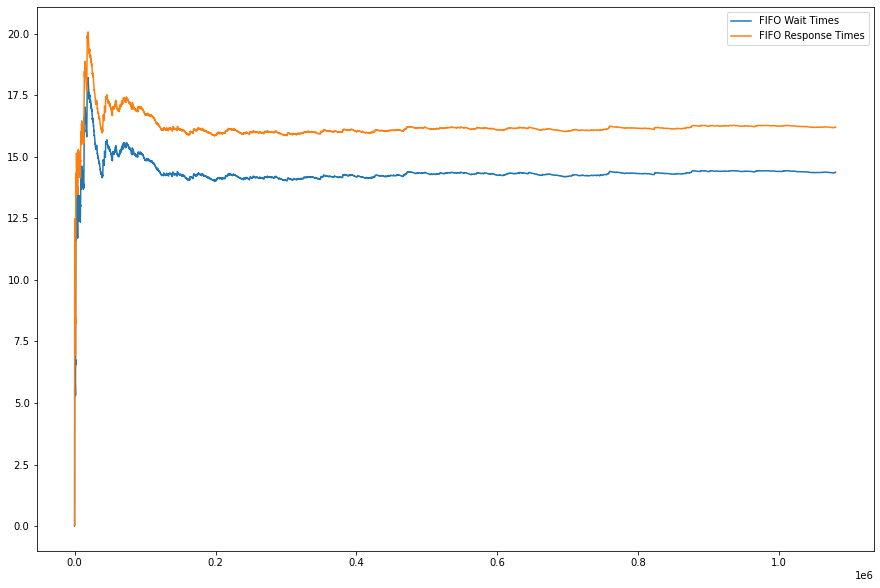

Total time --- 31.07159972190857 seconds ---
µb: 0.2, pb: 0.22


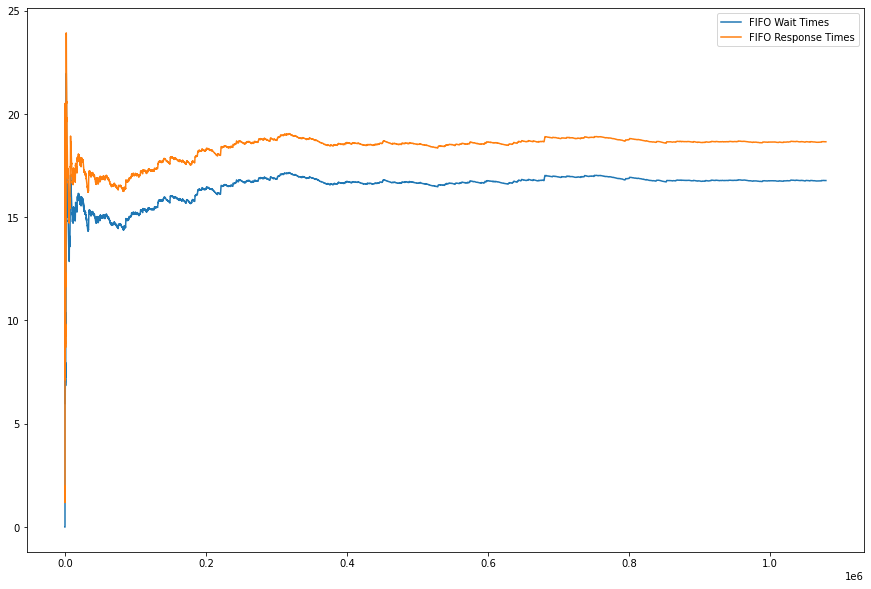

Total time --- 31.29068922996521 seconds ---
µb: 0.2, pb: 0.23


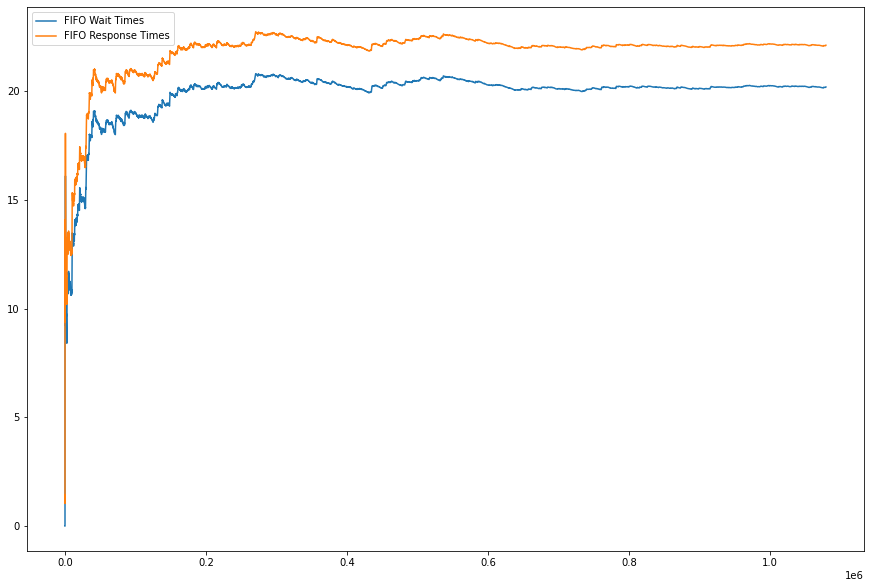

Total time --- 31.415440797805786 seconds ---
µb: 0.2, pb: 0.24000000000000002


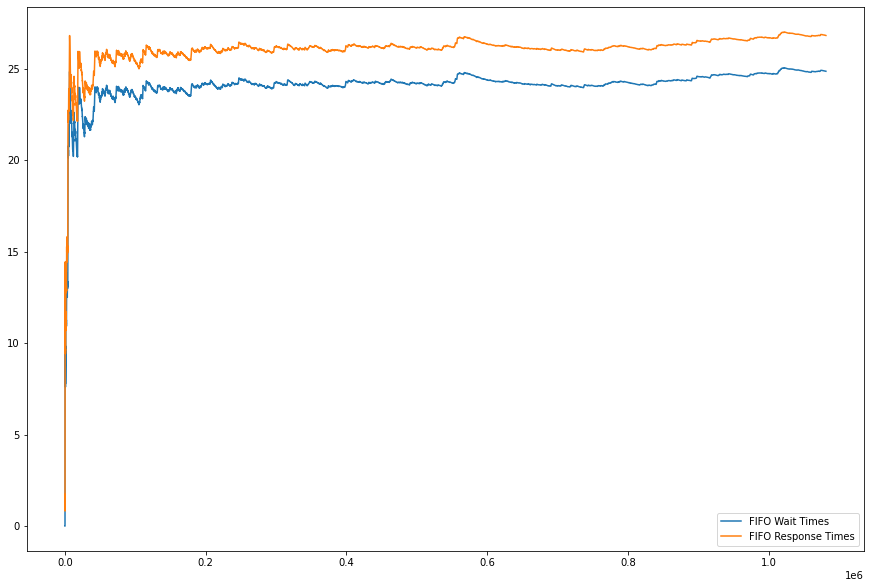

Total time --- 31.764822244644165 seconds ---
µb: 0.2, pb: 0.25


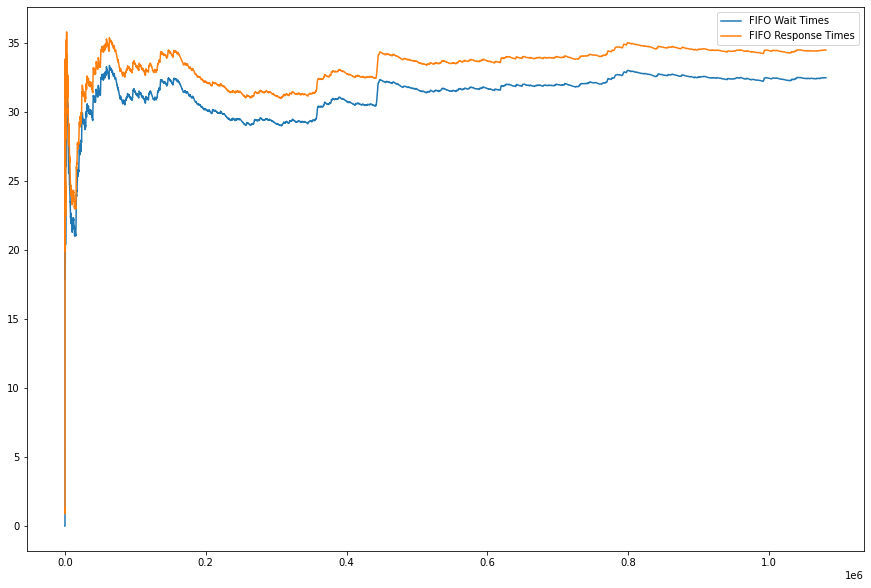

Total time --- 32.20986008644104 seconds ---
µb: 0.2, pb: 0.26


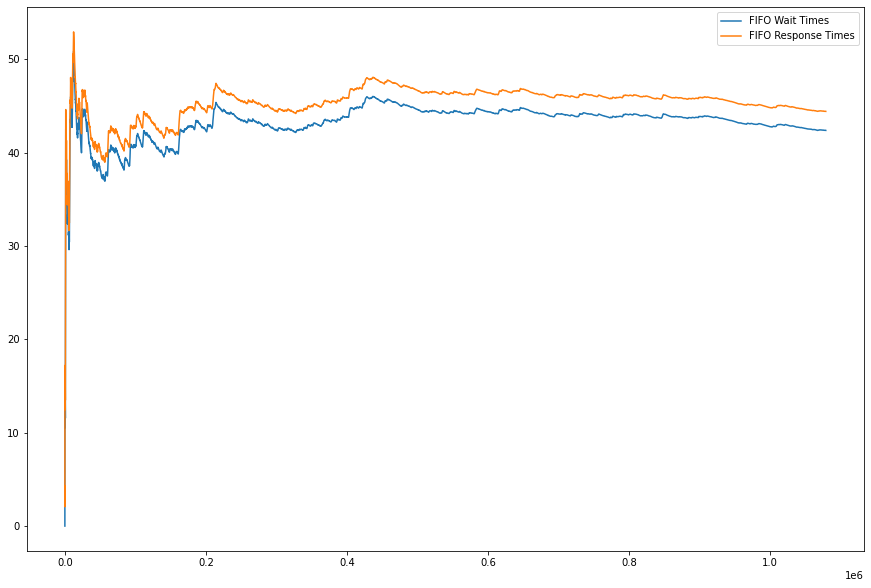

Total time --- 32.36452507972717 seconds ---
µb: 0.2, pb: 0.27


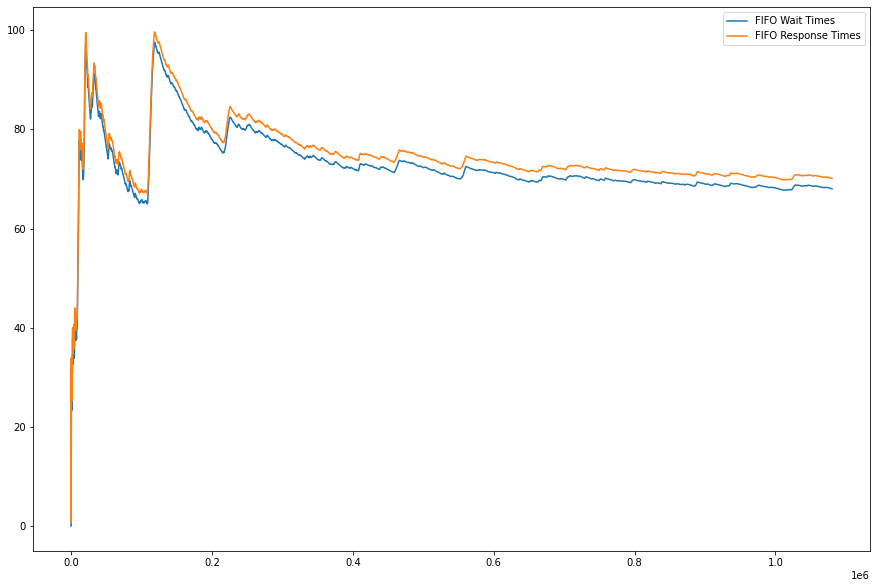

Total time --- 32.51901149749756 seconds ---
µb: 0.2, pb: 0.28


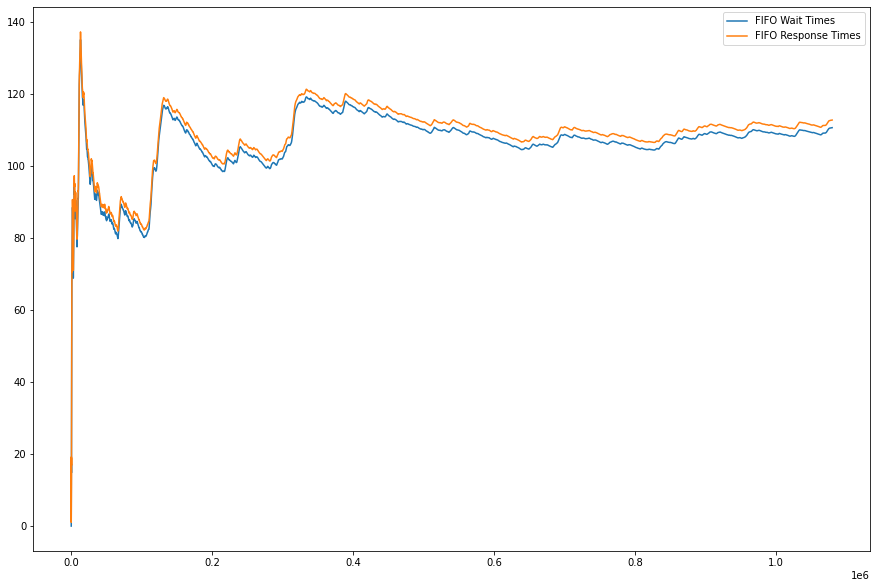

Total time --- 33.53454780578613 seconds ---
µb: 0.2, pb: 0.29000000000000004


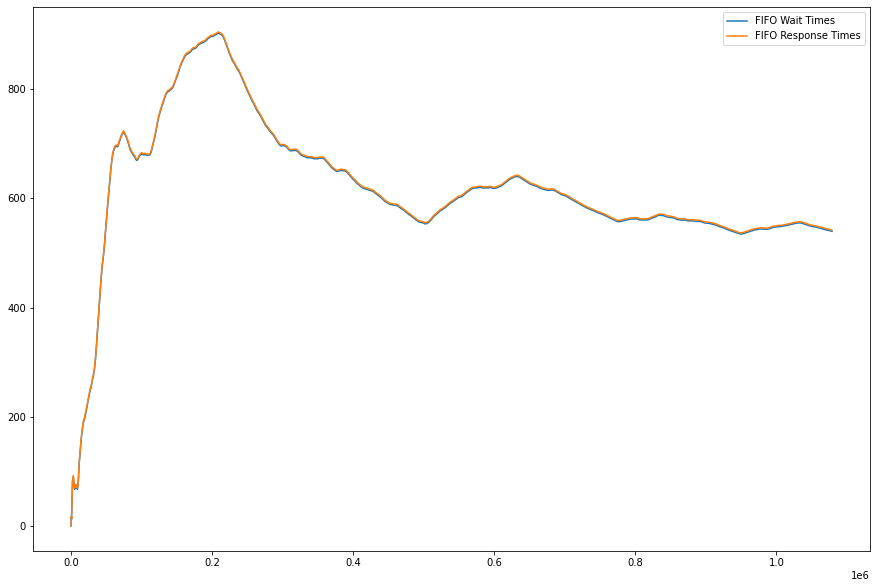

Total time --- 34.34247612953186 seconds ---
µb: 0.2, pb: 0.3


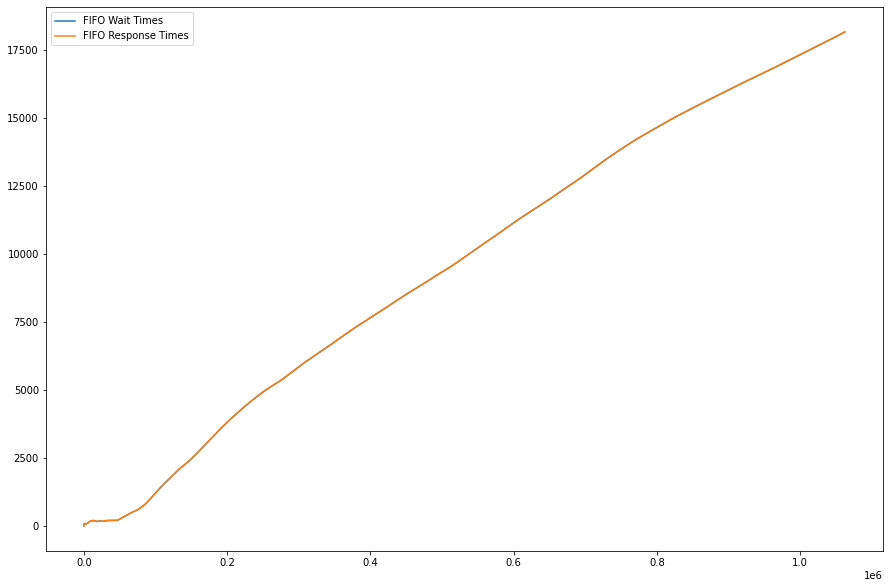

In [16]:
arr_rate = 0.5
mu_s = 1
mu_b = 0.2
#ps = 0.9
#pb = 0.1
lambda_s = arr_rate
lambda_b = arr_rate
max_k = 10

measurements = []
abss = []
#for mu_b in np.arange(0.05,2.01,0.025):
for pb in np.arange(0.01,0.31,0.01):
    ps = 1-pb
    #for mu_b in [0.05,0.1,0.2,0.5,1,2]:
    start_sim = time.time()
    max_job_size = max_k
    prob_b = pb
    mu_s = mu_s
    #mu_b = mu_b
    server_start = 0

    arr_rate = arr_rate
    duration = 3600*600

    server_n = max_k

    # POPULATE THE JOBS ARRIVAL TIMES AND JOB SIZE
    t = 0
    jobs_arr_t = []
    while t <= duration:
        iat = np.random.exponential(1/arr_rate)
        t += iat
        #jobs_arr_t.append((t,random.choice([1,job_size])))
        jobs_arr_t.append((t,get_job_size(max_job_size,prob_b)))

    waiting_times = []
    response_times = []
    queue = []

    # INITIATE THE N SERVERS
    servers = [] #[service_start,end]
    for s in range(server_n):
        servers.append([0,server_start,''])

    server_load = [[0,0]]
    queue_size = [[0,0]]
    jobs_inside = [[0,0,0]]
    throughput_small = 0
    throughput_big = 0

    '''big_job_hol = []
    abs_time = []
    abs_plus = []
    for kk in range (1000):
        abs_time.append([])
        abs_plus.append([])
        for kkk in range(1000):
            abs_time[kk].append([])
            abs_plus[kk].append([])
    #print(abs_time)
    xbxa = []
    big_dones = []'''

    job_id = 0
    big_finish = 0
    big_start = 0
    count_small = False
    xb = 0
    xa = 0
    # ITERATE EVENT-BASED (CAN BE JOBS ARRIVAL OR SERVICE FINISHED)
    while job_id < len(jobs_arr_t):
        t = 999999999
        curr_job = jobs_arr_t[job_id] 
        # ITERATE ALL THE SERVERS AND GET THE NEXT EARLIEST SERVER FINISH
        for s in servers:
            if s[1] > 0 and s[1] < t and s[1] > server_load[-1][0]:
                t = s[1]
        # GET THE NEXT JOBS ARRIVAL
        if jobs_arr_t[job_id][0] < t:
            t = jobs_arr_t[job_id][0]
            queue.append(curr_job)
            job_id += 1
        # NOW, t IS THE NEXT EVENT HAPPENING
        #print(t)

        # HOL TECHNIQUE WHERE SCHEDULERS PRIORITIZE THE JOBS AT THE FRONT,
        # AND WAIT UNTIL HOWEVER MANY SERVERS THAT JOB NEEDS ARE AVAILABLE
        if len(queue) > 0:
            job = queue[0] #only the job at the front
            avl_servers_n = len(servers)-busy_server_n(t,servers)[0] #get the number of available servers
            if avl_servers_n >= job[1]: #if it's enough for the job at the front

                ready_servers = get_avl_servers(t,servers,job[1]) #get all the servers ready to service
                st = np.random.exponential(1/get_srv_rate(job[1],max_job_size,mu_s,mu_b)) #determine the service rate
                for s in ready_servers:# put the job in each ready server
                    '''if count_small and job[0] <= big_finish and job[1] < max_job_size:
                        xb += 1
                    elif count_small and job[0] > big_finish and job[1] < max_job_size:
                        xa += 1
                    elif count_small and job[1] == max_job_size:
                        big_start = t
                        abs_plus[xb][xa].append(big_start-big_finish)
                        small_finish = ready_servers[-1][1]
                        #print(xb)
                        #print(xa)
                        if xb > 0 or xa > 0:
                            abs_time[xb][xa].append(small_finish-big_finish)
                        xbxa.append((xb,xa))
                        xb = 0
                        xa = 0
                        count_small = False'''
                    server_id = s[0]
                    job_name = ''
                    if job[1] == max_job_size: #for graph purpose
                        job_name += 'big'
                    else:
                        job_name += 'small'
                    job_name += '_'+str(job[0])
                    servers[server_id] = [t,t+st,job_name]
                waiting_times.append((t-job[0],job[1])) #for graph purpose
                response_times.append((t+st-job[0],job[1])) #for graph purpose
                queue.pop(0)
                if job[1] == max_job_size: #for graph purpose
                    throughput_big += 1
                    #big_finish = t+st
                    #count_small = True
                    #big_dones.append((job[0],t,t+st))
                else:
                    throughput_small += 1

        '''if len(queue) > 0 and queue[0][1] == max_job_size:
            if len(big_job_hol) > 0:
                if big_job_hol[-1][0] != queue[0][0]:
                    big_job_hol.append((queue[0][0],busy_server_n(t,servers)[1]))
                    #if big_job_hol[-1][1] == 0:
                    #    print(busy_server_n(t,servers))
            else:
                big_job_hol.append((queue[0][0],busy_server_n(t,servers)[1]))'''

        server_state = busy_server_n(t,servers)
        #queue_state = queue_counter(queue,max_job_size)
        server_load.append((t,server_state[0])) #for graph purpose
        queue_size.append((t,len(queue))) #for graph purpose
        jobs_inside.append((t,server_state[1],server_state[2]))

    #print('Arrival rate: '+str(arr_rate))

    # counting the utilization
    '''util = 0 
    n_small = 0
    n_big = 0
    i = 1
    while i < len(server_load):
        if server_load[i-1][0] < server_start:
            i += 1
            continue
        timestamp = server_load[i][0] - server_load[i-1][0]
        load = server_load[i-1][1]
        small_load = jobs_inside[i-1][1]
        big_load = jobs_inside[i-1][2]
        util += (timestamp*load)
        n_small += (timestamp*small_load)
        n_big += (timestamp*big_load)
        i += 1
    duration -= server_start
    avg_util = util/duration/server_n
    avg_n_small = n_small/duration
    avg_n_big = n_big/duration
    avg_thr_small = throughput_small/duration
    avg_thr_big = throughput_big/duration
    measurements.append((avg_util,avg_n_big,avg_n_small,avg_thr_big,avg_thr_small))

    print('Utilization: '+str(avg_util))
    print('Small job throughput: '+str(avg_thr_small))
    print('Big job throughput: '+str(avg_thr_big))
    print('Average number of small job: '+str(avg_n_small))
    print('Average number of big job: '+str(avg_n_big))
    print(mean([wt[0] for wt in waiting_times]))
    print(mean([rt[0] for rt in response_times]))'''

    print("Total time --- %s seconds ---" % (time.time() - start_sim))
    #print('------------')

    '''abss.append([abs_time,abs_plus])

    hols = []
    for h in range(max_job_size+1):
        hols.append(0)
    for hol in big_job_hol:
        hols[hol[1]] = hols[hol[1]] + 1
    print(hols)
    print([h/sum(hols) for h in hols])

    plt.figure(figsize=(17,15))
    plt.bar([n for n in range(max_job_size+1)], [h/sum(hols) for h in hols], label = 'How many small jobs?')
    plt.legend()
    plt.xlabel('Small jobs')
    plt.ylabel('P')
    #plt.xticks([n+(width*0.5) for n in range(max_lambda)],
    #        [n+1 for n in range(max_lambda)])
    plt.show()'''
    
    print('µb: '+str(mu_b)+', pb: '+str(pb))

    avg_wait = []
    n = 1
    tot = 0
    for w in [wt[0] for wt in waiting_times]:
        tot += w
        avg_wait.append(tot/n)
        n += 1

    avg_resp = []
    n = 1
    tot = 0
    for w in [rt[0] for rt in response_times]:
        tot += w
        avg_resp.append(tot/n)
        n += 1

    plt.figure(figsize=(15,10))
    plt.plot([i for i in range(len(avg_wait))], avg_wait, label = "FIFO Wait Times")
    plt.plot([i for i in range(len(avg_resp))], avg_resp, label = "FIFO Response Times")
    plt.legend()
    plt.show()

    busy_times_s = []

    tracking = False
    for j in jobs_inside:
        if (not tracking) and j[1] > 0:
            tracking = True
            busy_times_s.append([j[0]])
        elif tracking and j[1] == 0:
            tracking = False
            busy_times_s[-1].append(j[0])
    if len(busy_times_s[-1]) < 2:
        busy_times_s[-1].append(j[0])
        
    busy_s_exp = np.mean(np.array([b[1]-b[0] for b in busy_times_s[:-1]]))

    busy_times = []

    tracking = False
    for j in jobs_inside:
        if (not tracking) and j[1]+j[2] > 0:
            tracking = True
            busy_times.append([j[0]])
        elif tracking and j[1]+j[2] == 0:
            tracking = False
            busy_times[-1].append(j[0])
    if len(busy_times[-1]) < 2:
        busy_times[-1].append(j[0])
        
    busy_exp = np.mean(np.array([b[1]-b[0] for b in busy_times[:-1]]))

    idle_times = []

    tracking = False
    for j in jobs_inside:
        if (not tracking) and j[1]+j[2] == 0:
            tracking = True
            idle_times.append([j[0]])
        elif tracking and j[1]+j[2] > 0:
            tracking = False
            idle_times[-1].append(j[0])
    if len(idle_times[-1]) < 2:
        idle_times[-1].append(j[0])
        
    idle_exp = np.mean(np.array([b[1]-b[0] for b in idle_times[:-1]]))


    '''if len(busy_times) > 1:
        max_lim = 0

        data = np.sort(np.array([b[1]-b[0] for b in busy_times[:-1]]))
        mean = np.mean(data)
        std_dev = np.std(data)
        # 3. Normalize array around 0
        zero_based = abs(data - mean)
        # 4. Define maximum number of standard deviations
        max_deviations = 3
        # 5. Access only non-outliers using Boolean Indexing
        no_outliers = np.array(data[zero_based < max_deviations * std_dev])
        try:
            max_lim = max(no_outliers)
        except:
            data = np.sort(np.array([b[1]-b[0] for b in busy_times_s[:-1]]))
            mean = np.mean(data)
            std_dev = np.std(data)
            # 3. Normalize array around 0
            zero_based = abs(data - mean)
            # 4. Define maximum number of standard deviations
            max_deviations = 3
            # 5. Access only non-outliers using Boolean Indexing
            no_outliers = np.array(data[zero_based < max_deviations * std_dev])
            max_lim = max(no_outliers)

        data = np.sort(np.array([b[1]-b[0] for b in busy_times_s[:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
        plt.xlim([0, max_lim+1])
        plt.xlabel('Bs')
        plt.ylabel('pdf')
        plt.savefig('graphs/Bs '+str(mu_b)+' '+str(pb)+'.png', bbox_inches='tight')
        plt.show()

        data = np.sort(np.array([b[1]-b[0] for b in busy_times[:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
        plt.xlim([0, max_lim+1])
        plt.xlabel('B')
        plt.ylabel('pdf')
        plt.savefig('graphs/B '+str(mu_b)+' '+str(pb)+'.png', bbox_inches='tight')
        plt.show()

        data = np.sort(np.array([b[1]-b[0] for b in idle_times[:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
        plt.xlim([0, max_lim+1])
        plt.xlabel('I')
        plt.ylabel('pdf')
        plt.savefig('graphs/I '+str(mu_b)+' '+str(pb)+'.png', bbox_inches='tight')
        plt.show()
    else:
        print('Saturated')
        print('')
        print('----------------------------')'''
    
    abss.append([busy_s_exp,busy_exp,idle_exp])

Total time --- 41.39046239852905 seconds ---
µb: 0.05, pb: 0.1


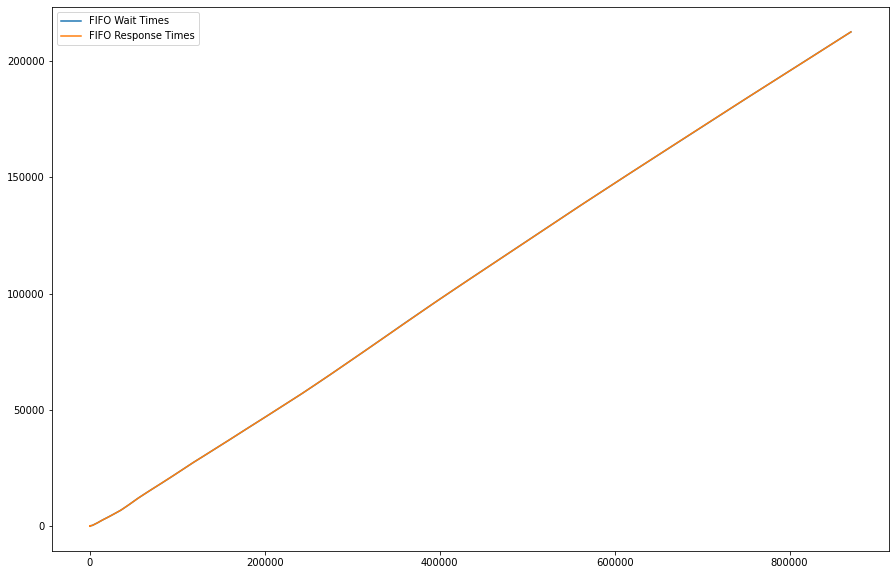

Total time --- 30.121469497680664 seconds ---
µb: 0.07500000000000001, pb: 0.1


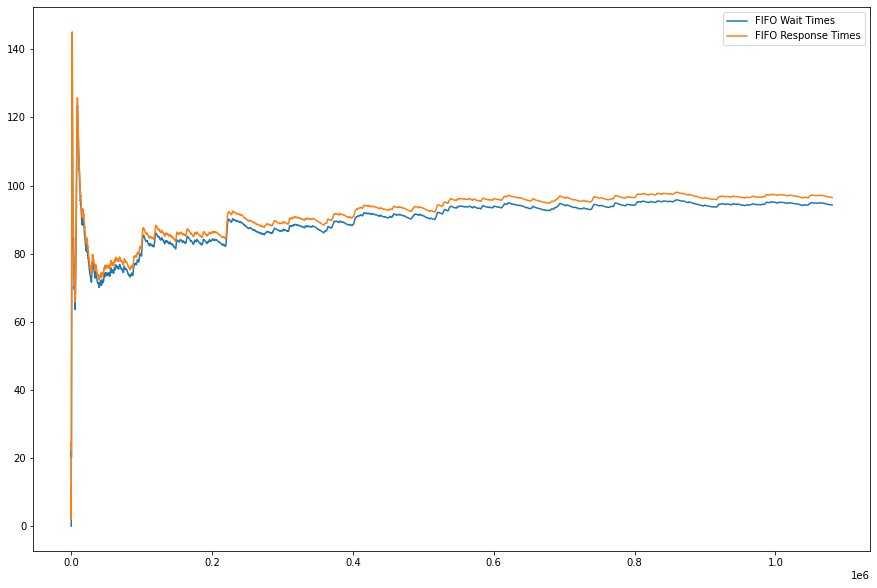

Total time --- 28.643702030181885 seconds ---
µb: 0.10000000000000002, pb: 0.1


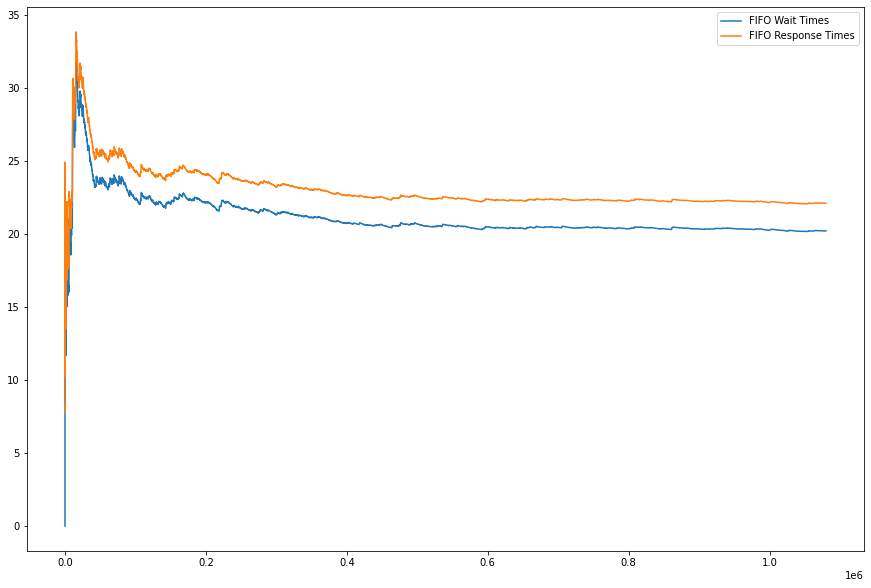

Total time --- 28.042999505996704 seconds ---
µb: 0.12500000000000003, pb: 0.1


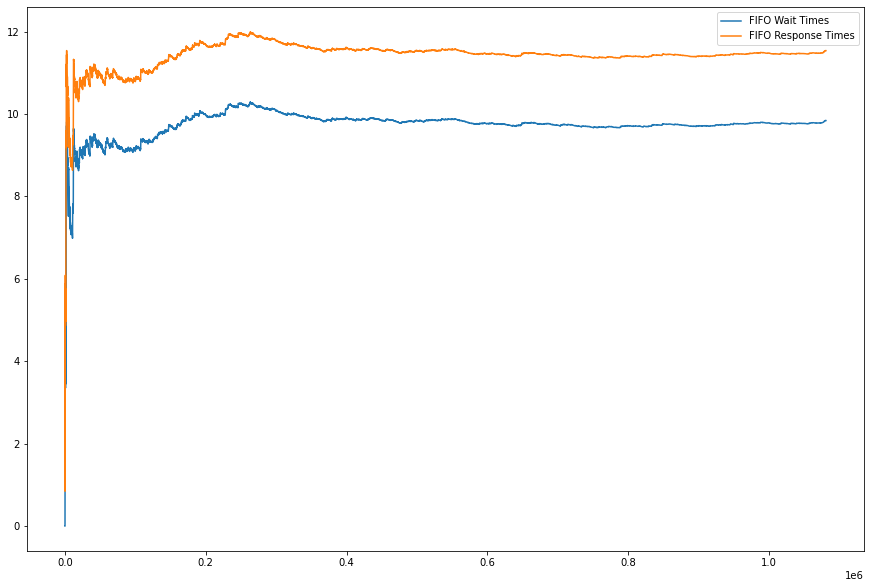

Total time --- 27.367120504379272 seconds ---
µb: 0.15000000000000002, pb: 0.1


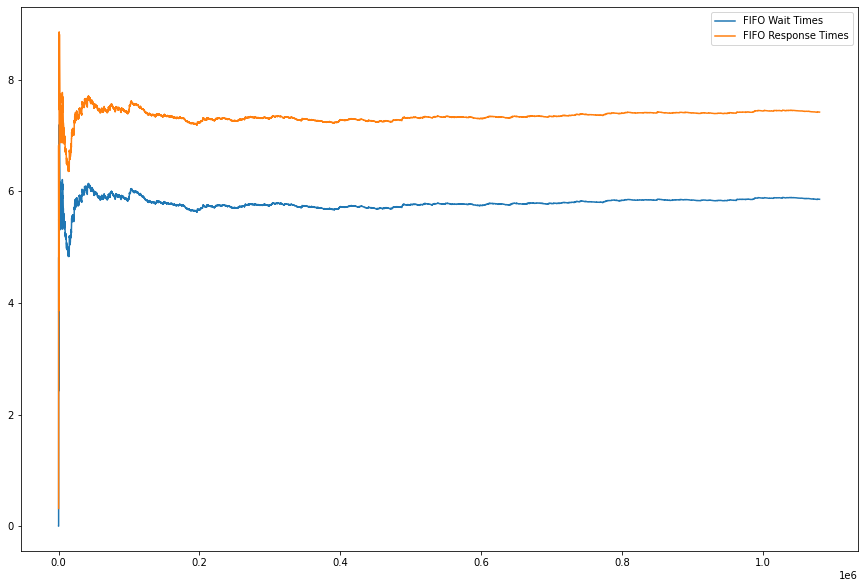

Total time --- 27.268279314041138 seconds ---
µb: 0.17500000000000004, pb: 0.1


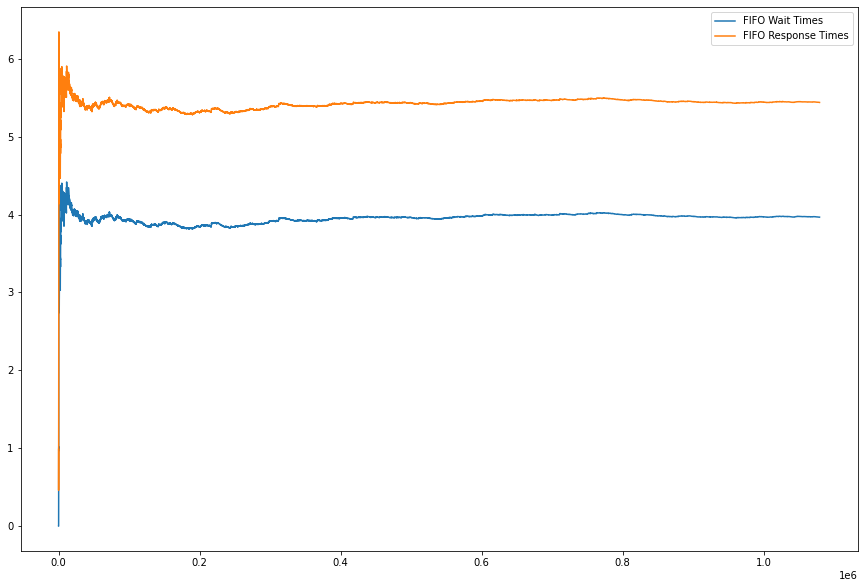

Total time --- 27.005971908569336 seconds ---
µb: 0.20000000000000007, pb: 0.1


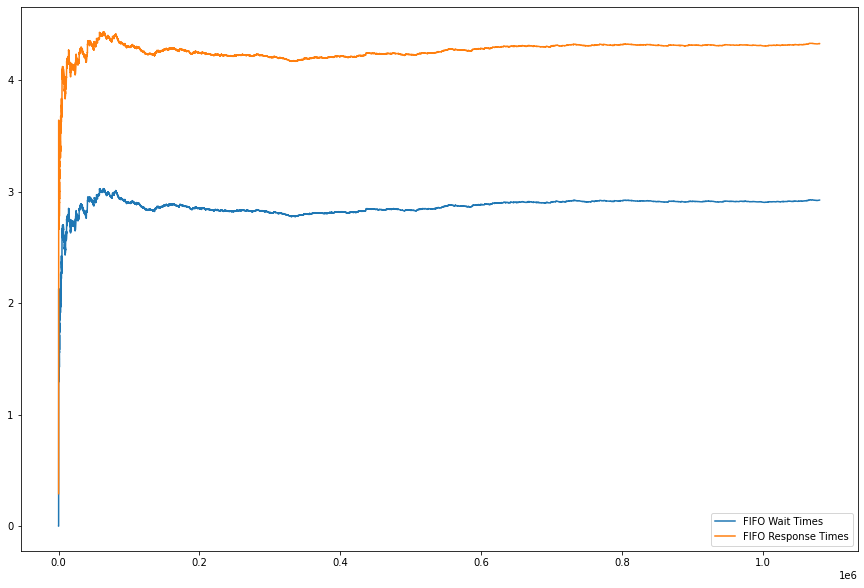

Total time --- 26.832146883010864 seconds ---
µb: 0.22500000000000003, pb: 0.1


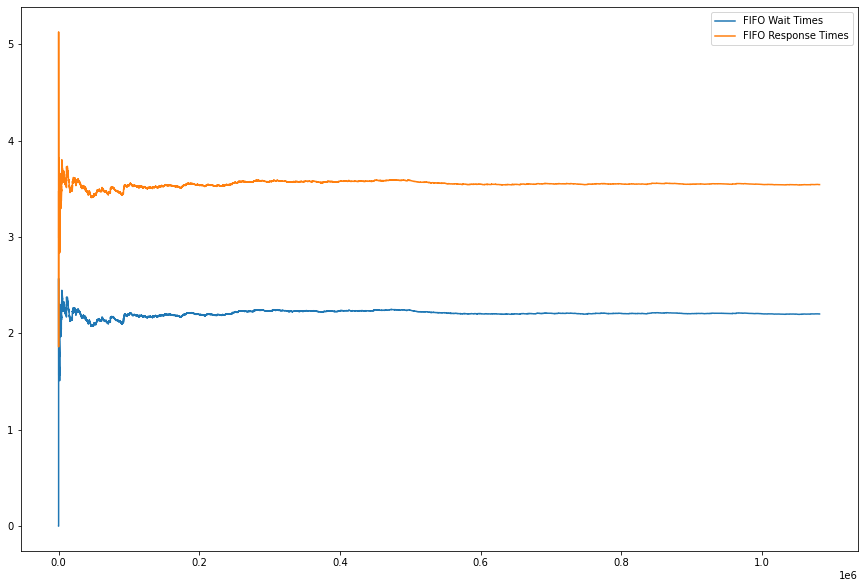

Total time --- 26.60813593864441 seconds ---
µb: 0.25000000000000006, pb: 0.1


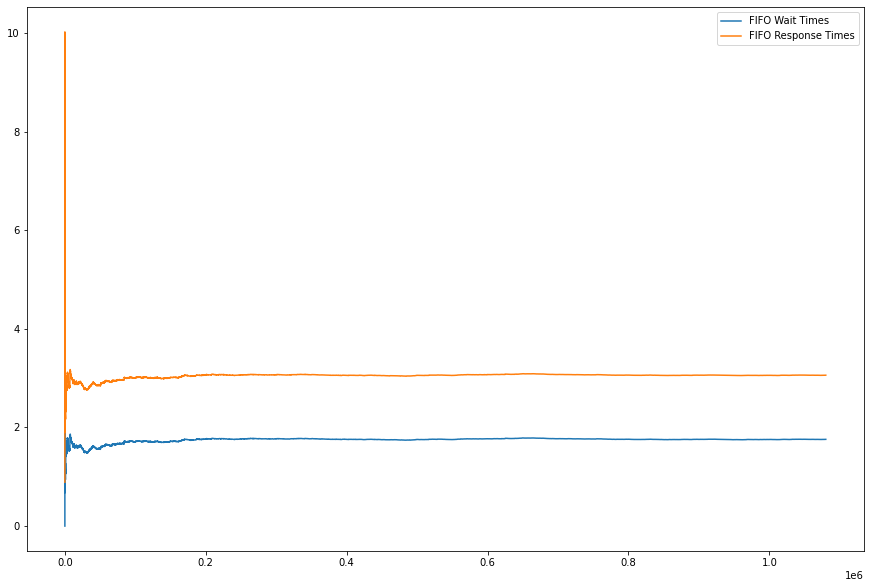

Total time --- 26.58480167388916 seconds ---
µb: 0.2750000000000001, pb: 0.1


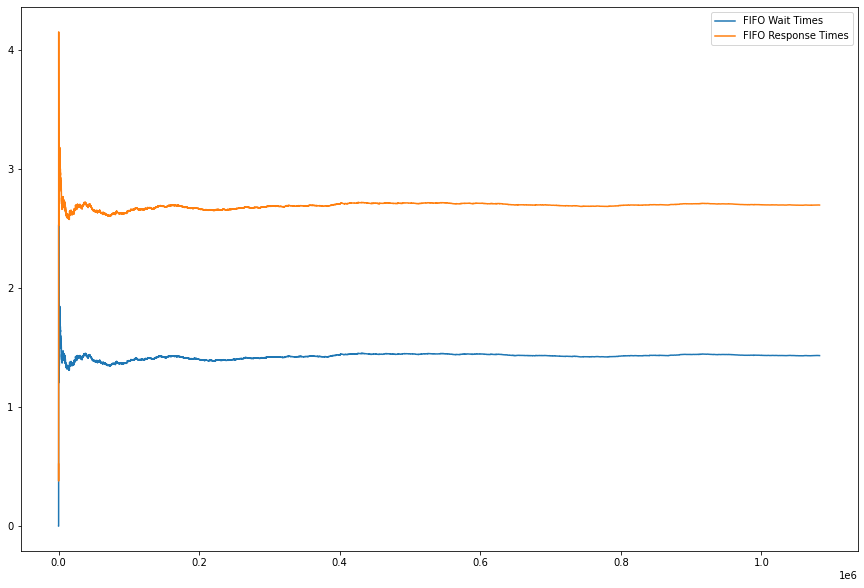

Total time --- 26.38592028617859 seconds ---
µb: 0.3000000000000001, pb: 0.1


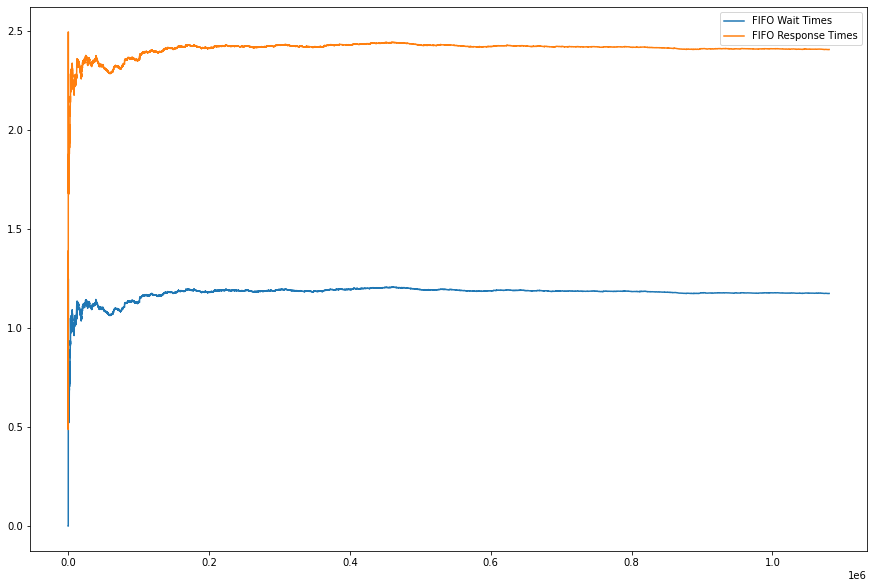

Total time --- 26.300634384155273 seconds ---
µb: 0.32500000000000007, pb: 0.1


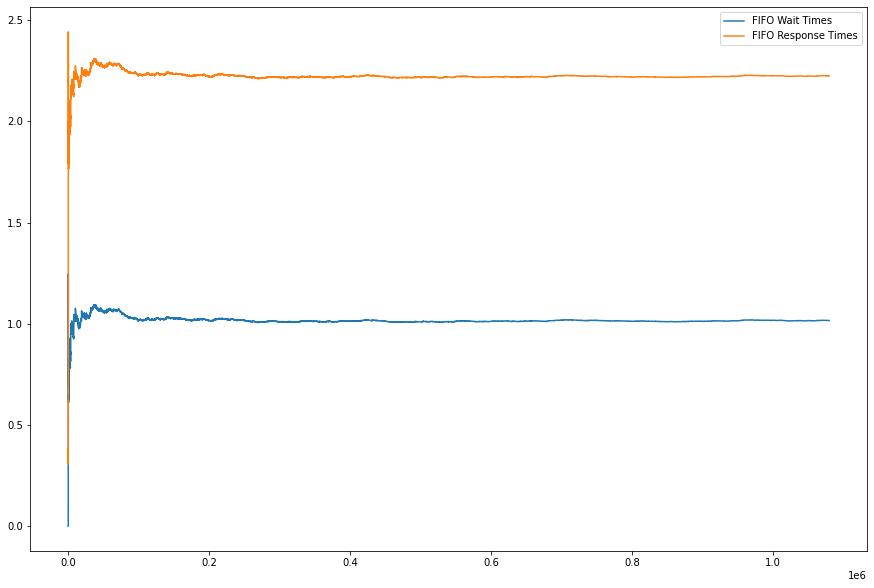

Total time --- 26.158092737197876 seconds ---
µb: 0.3500000000000001, pb: 0.1


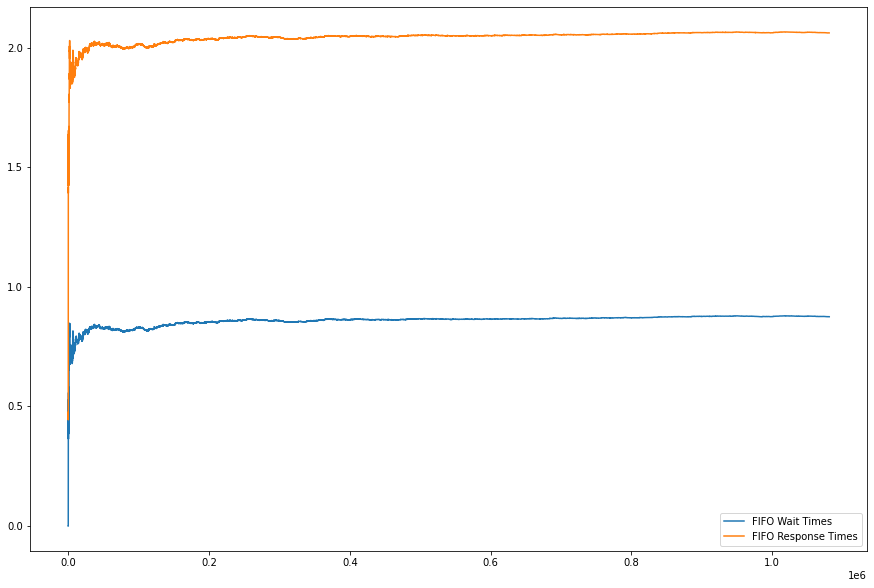

Total time --- 26.17633628845215 seconds ---
µb: 0.3750000000000001, pb: 0.1


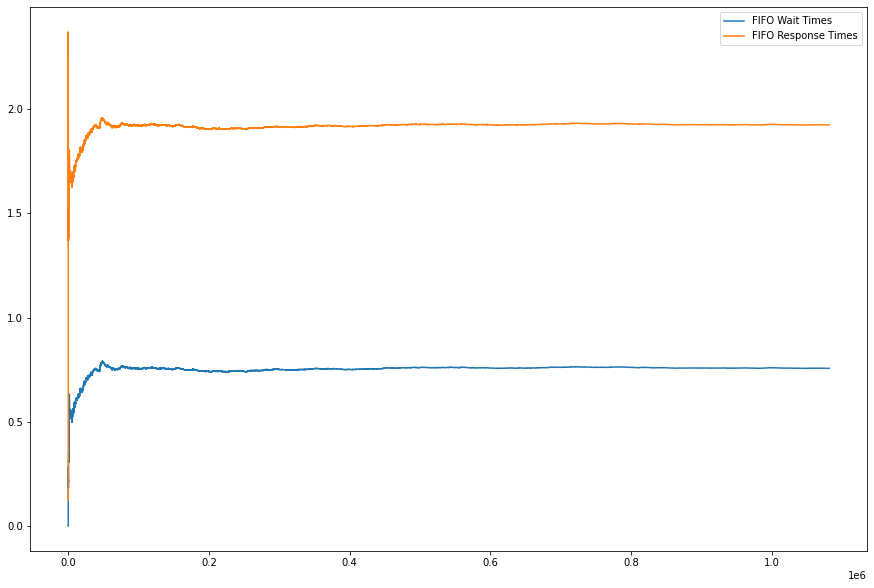

Total time --- 25.92934489250183 seconds ---
µb: 0.4000000000000001, pb: 0.1


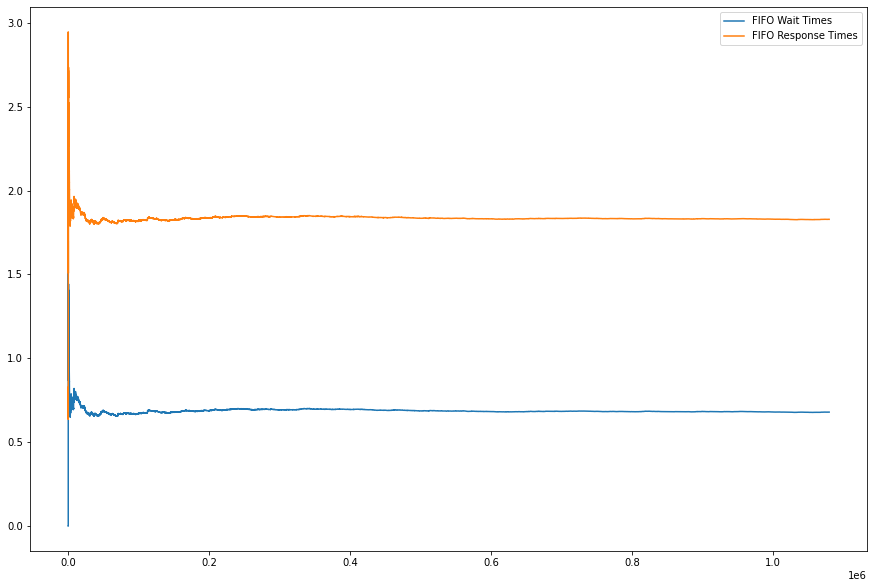

Total time --- 25.95403265953064 seconds ---
µb: 0.4250000000000001, pb: 0.1


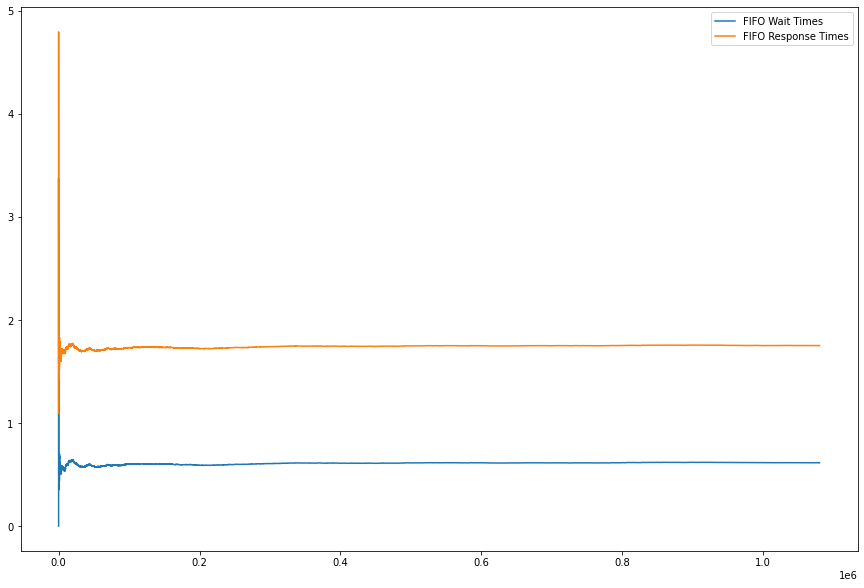

Total time --- 26.303162813186646 seconds ---
µb: 0.4500000000000001, pb: 0.1


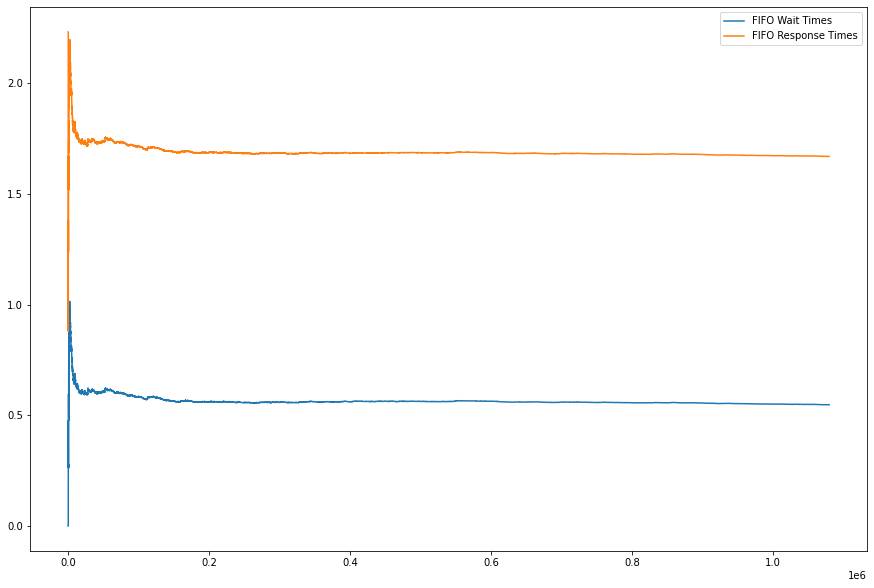

Total time --- 25.78247046470642 seconds ---
µb: 0.47500000000000014, pb: 0.1


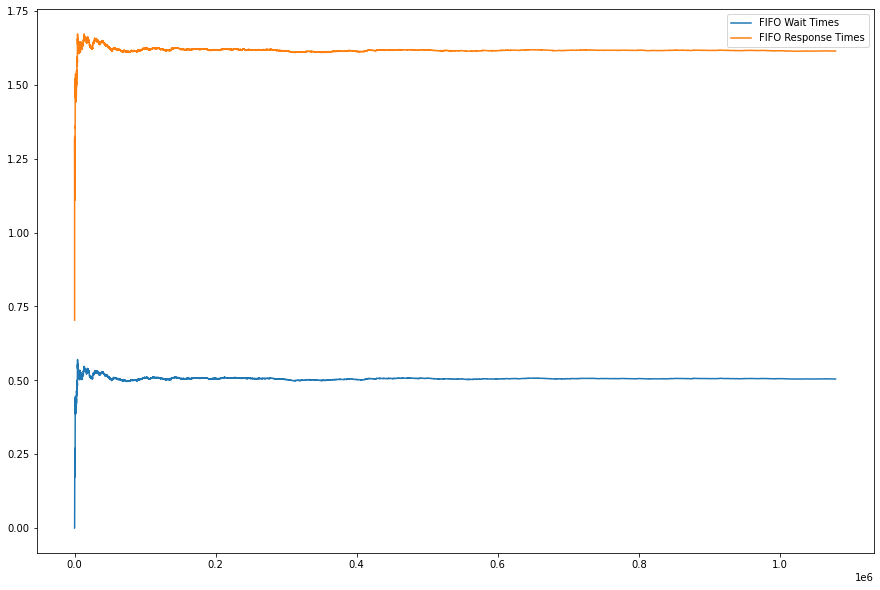

Total time --- 25.69664239883423 seconds ---
µb: 0.5000000000000002, pb: 0.1


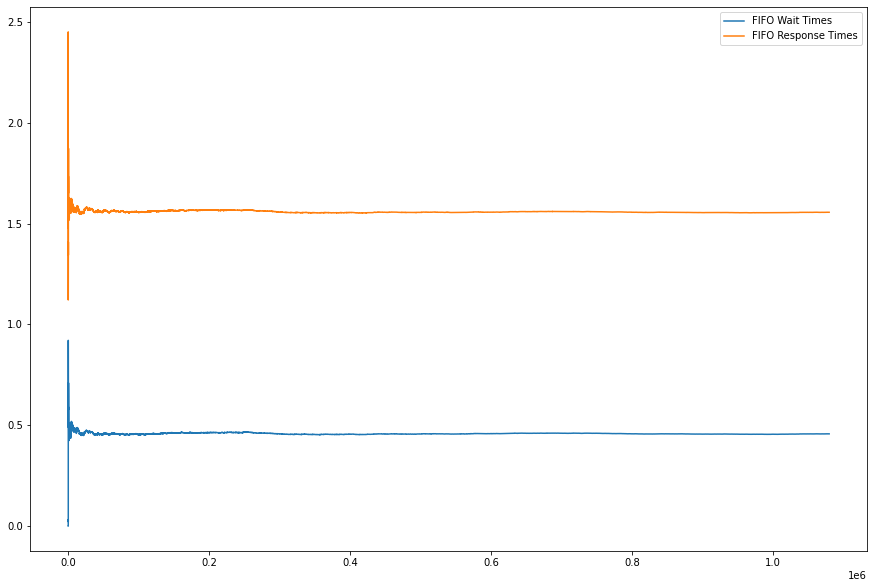

Total time --- 25.757839918136597 seconds ---
µb: 0.5250000000000001, pb: 0.1


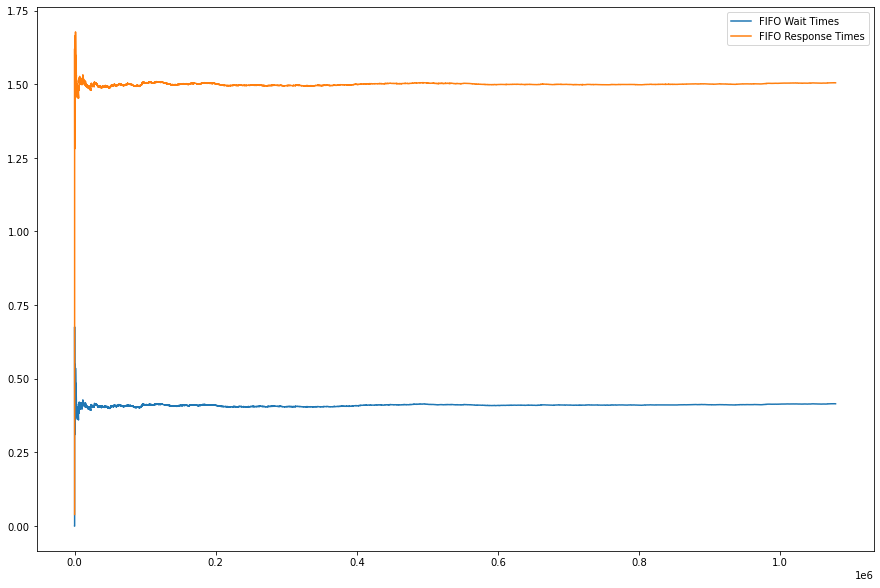

Total time --- 25.697218894958496 seconds ---
µb: 0.5500000000000003, pb: 0.1


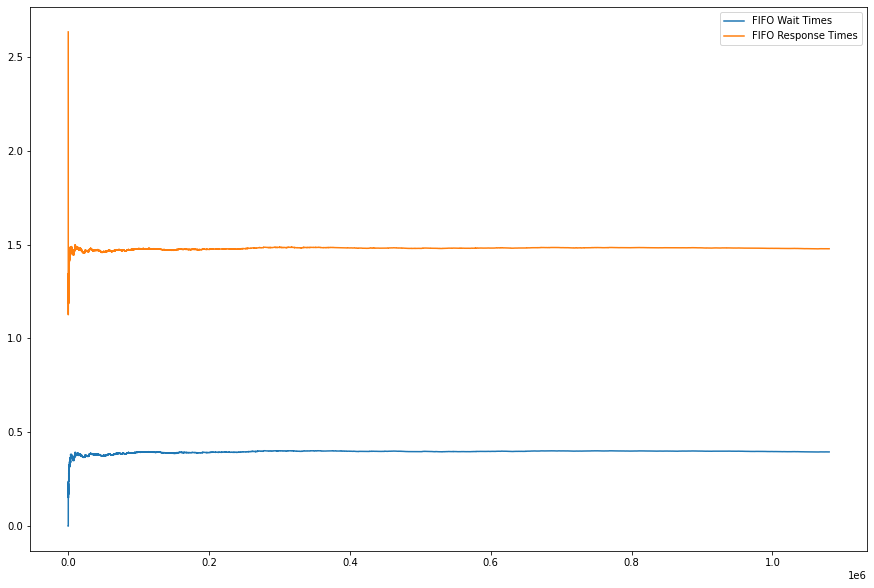

Total time --- 25.738738536834717 seconds ---
µb: 0.5750000000000002, pb: 0.1


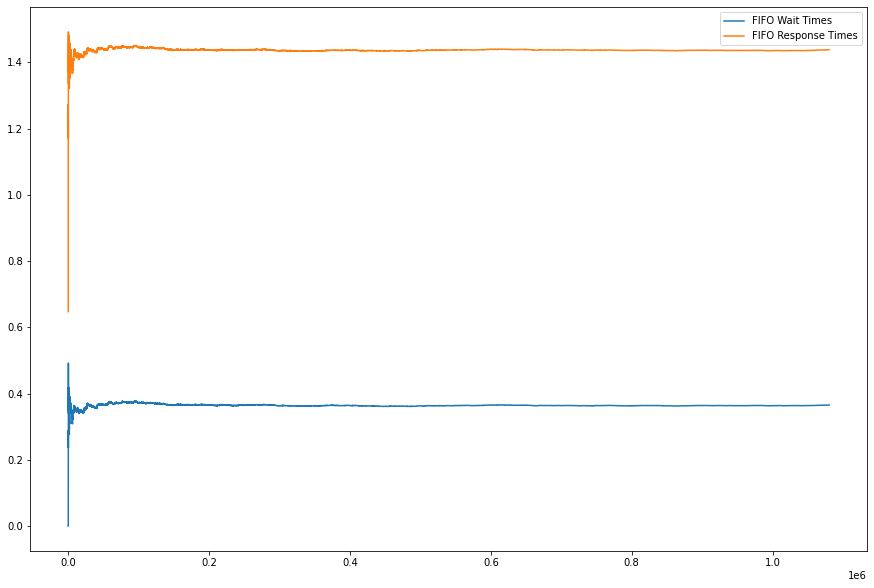

Total time --- 25.682202577590942 seconds ---
µb: 0.6000000000000002, pb: 0.1


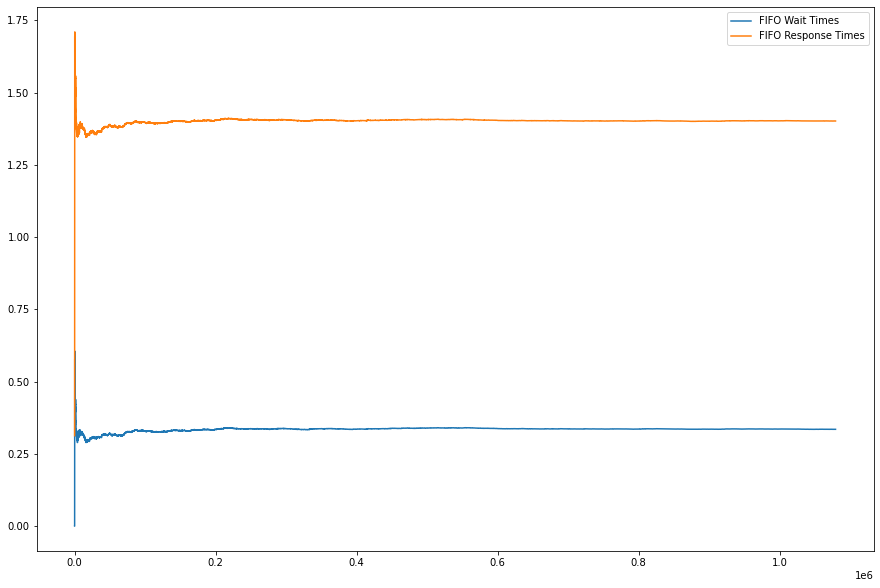

Total time --- 25.648422718048096 seconds ---
µb: 0.6250000000000002, pb: 0.1


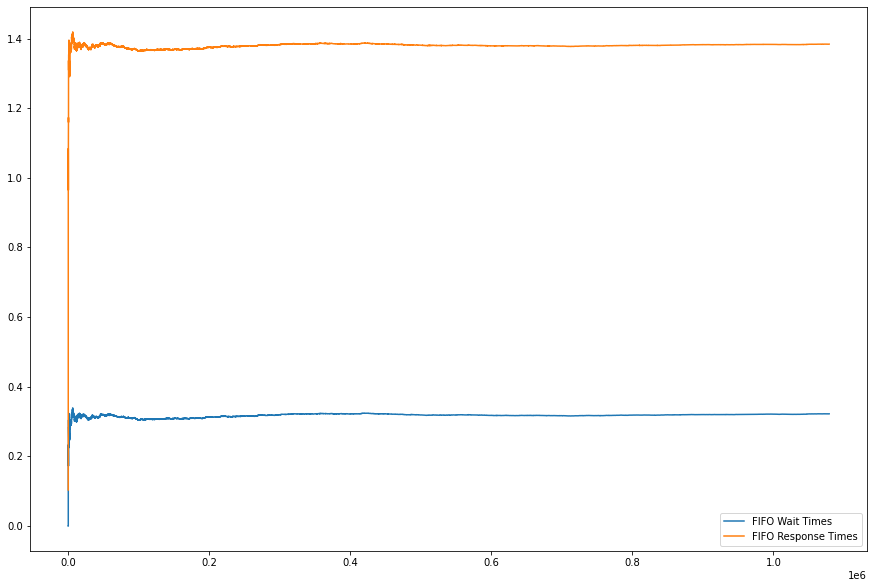

Total time --- 25.5582172870636 seconds ---
µb: 0.6500000000000002, pb: 0.1


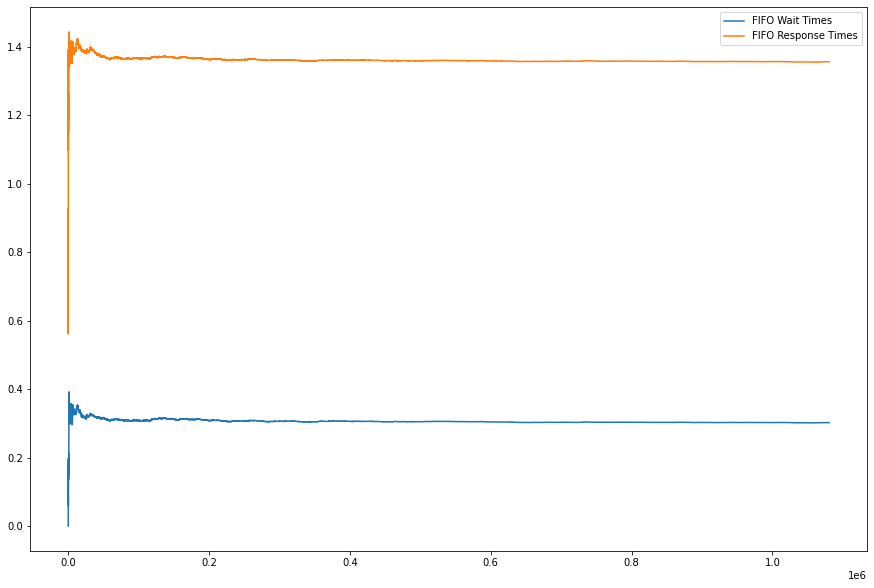

Total time --- 25.632893085479736 seconds ---
µb: 0.6750000000000003, pb: 0.1


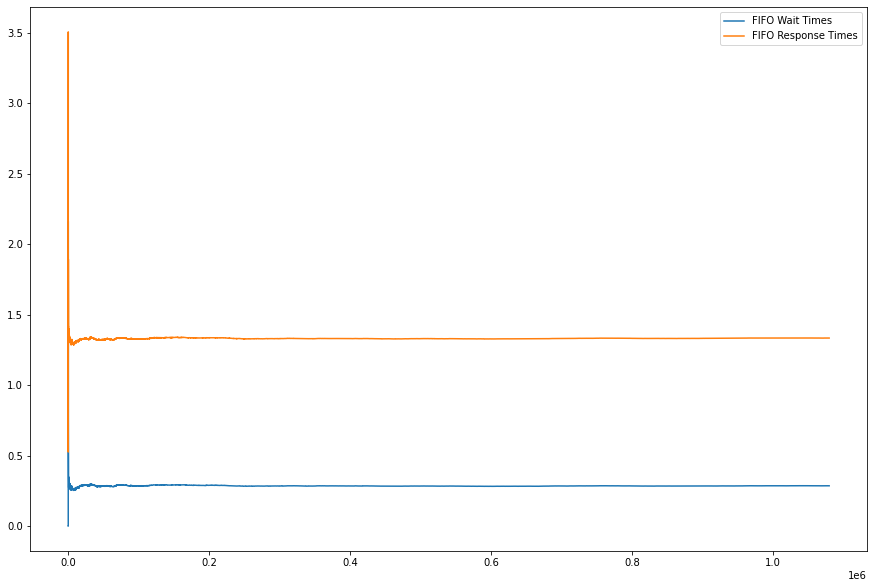

Total time --- 25.70534038543701 seconds ---
µb: 0.7000000000000003, pb: 0.1


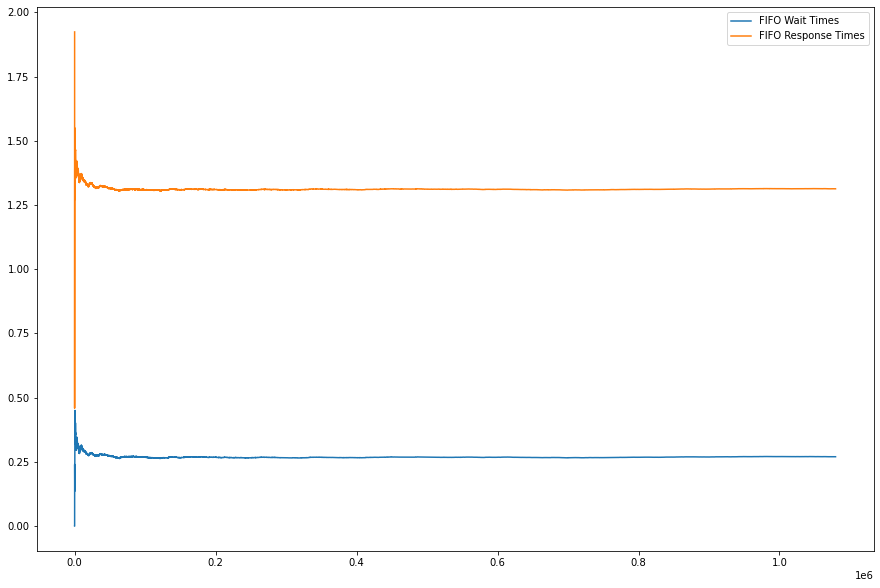

Total time --- 25.654051065444946 seconds ---
µb: 0.7250000000000003, pb: 0.1


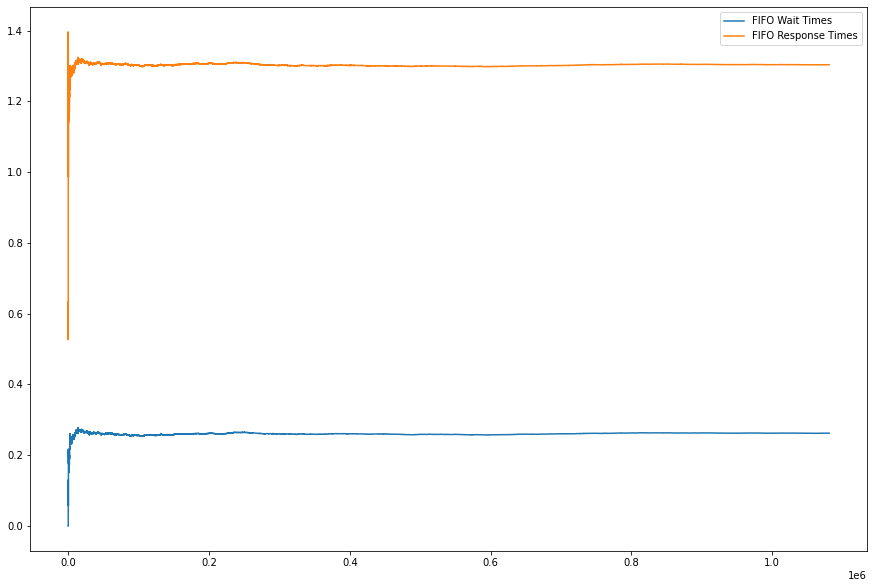

Total time --- 25.565399169921875 seconds ---
µb: 0.7500000000000002, pb: 0.1


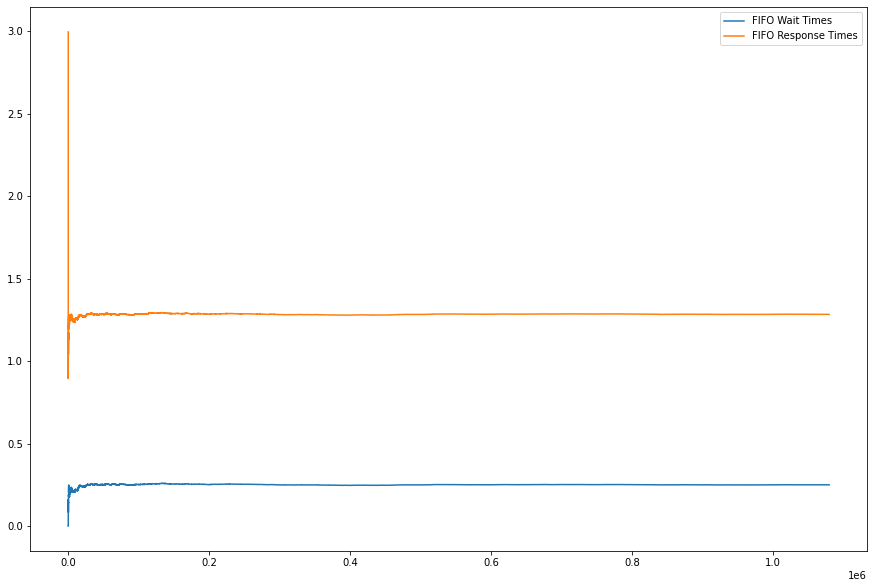

Total time --- 25.487237691879272 seconds ---
µb: 0.7750000000000002, pb: 0.1


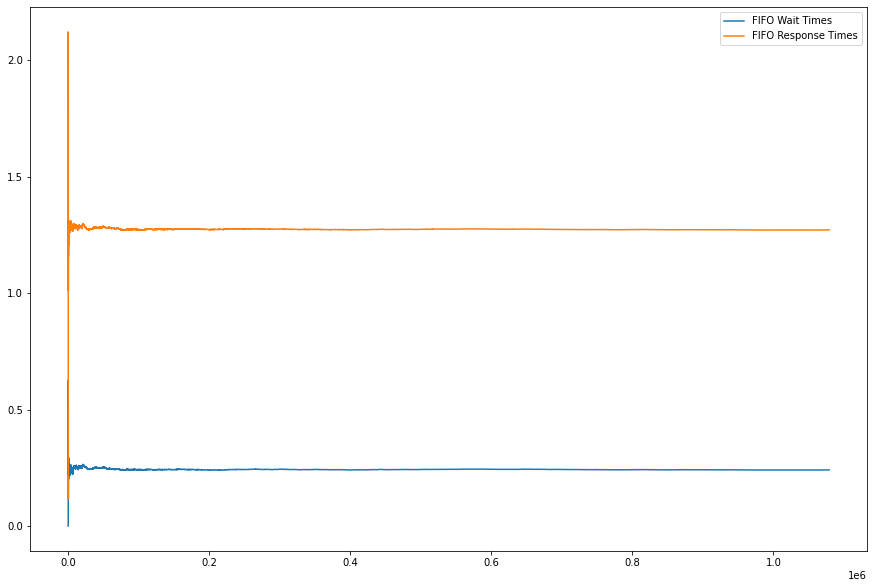

Total time --- 25.614627838134766 seconds ---
µb: 0.8000000000000003, pb: 0.1


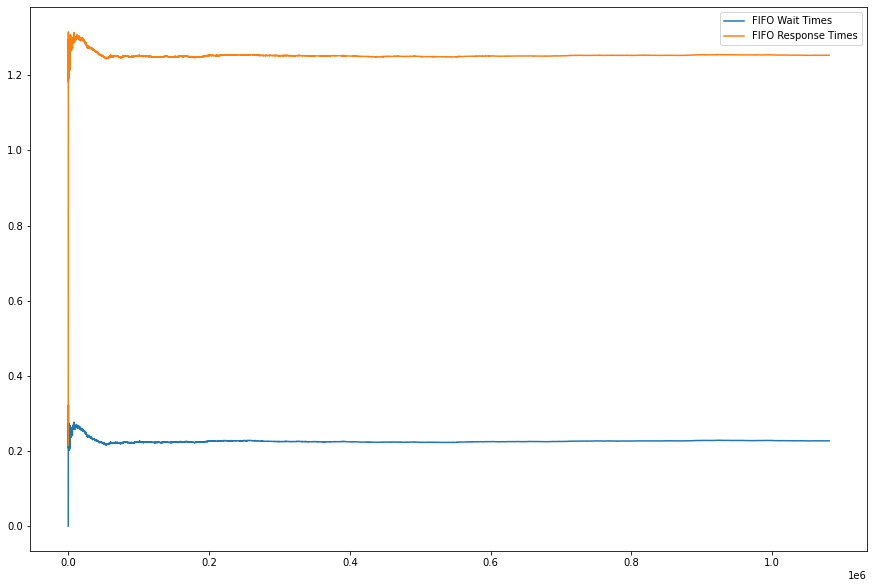

Total time --- 25.43311834335327 seconds ---
µb: 0.8250000000000003, pb: 0.1


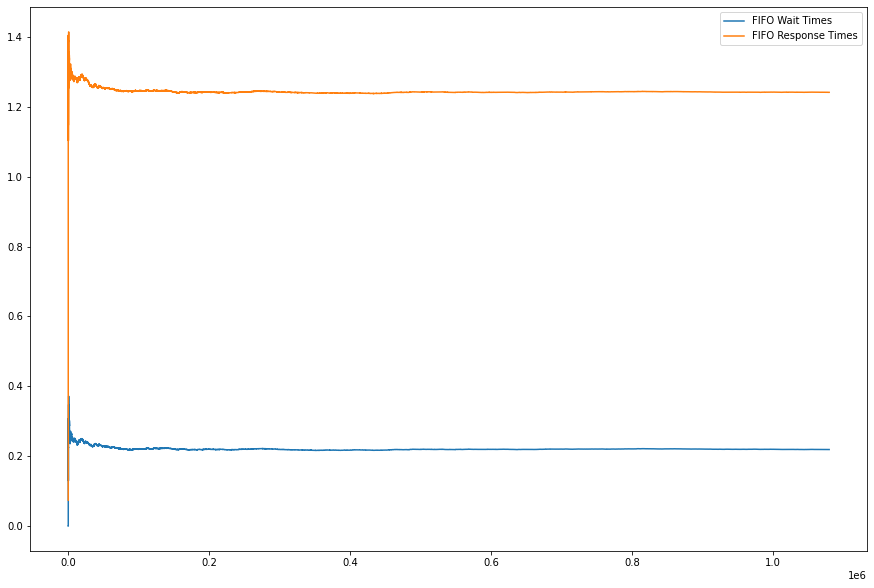

Total time --- 25.602320432662964 seconds ---
µb: 0.8500000000000003, pb: 0.1


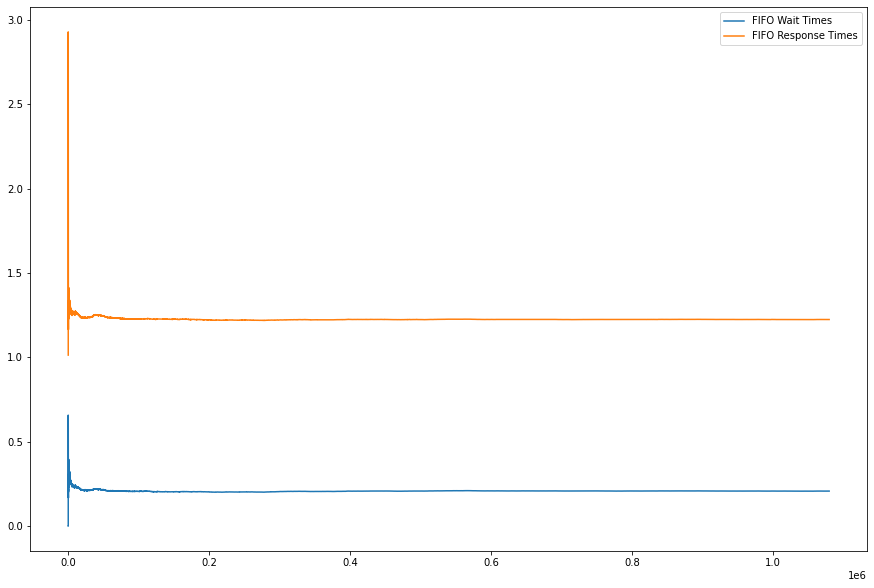

Total time --- 25.91450524330139 seconds ---
µb: 0.8750000000000003, pb: 0.1


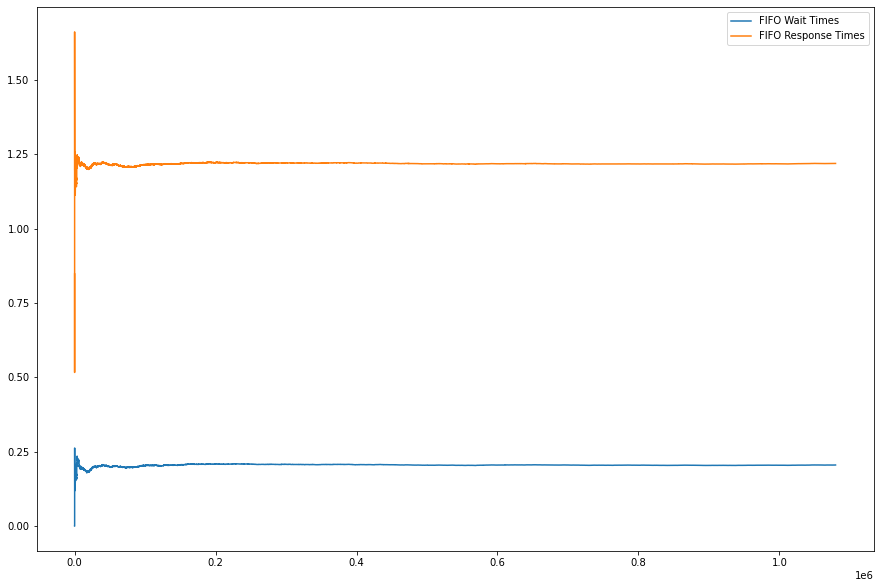

Total time --- 25.496763706207275 seconds ---
µb: 0.9000000000000004, pb: 0.1


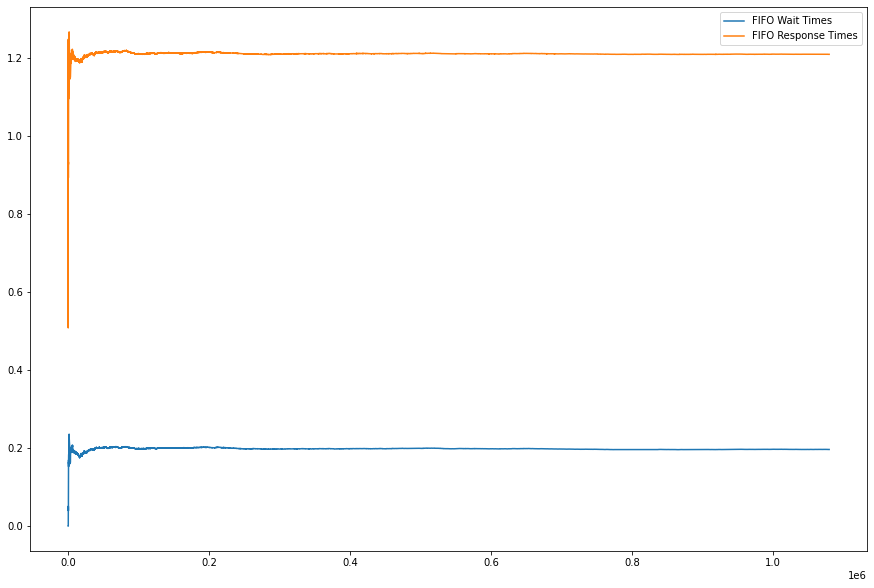

Total time --- 25.41022539138794 seconds ---
µb: 0.9250000000000004, pb: 0.1


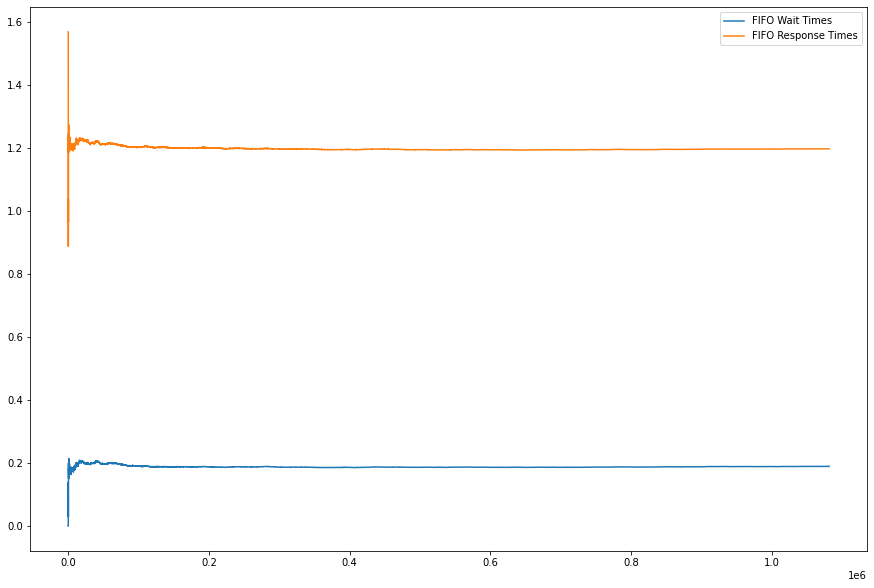

Total time --- 25.5239315032959 seconds ---
µb: 0.9500000000000004, pb: 0.1


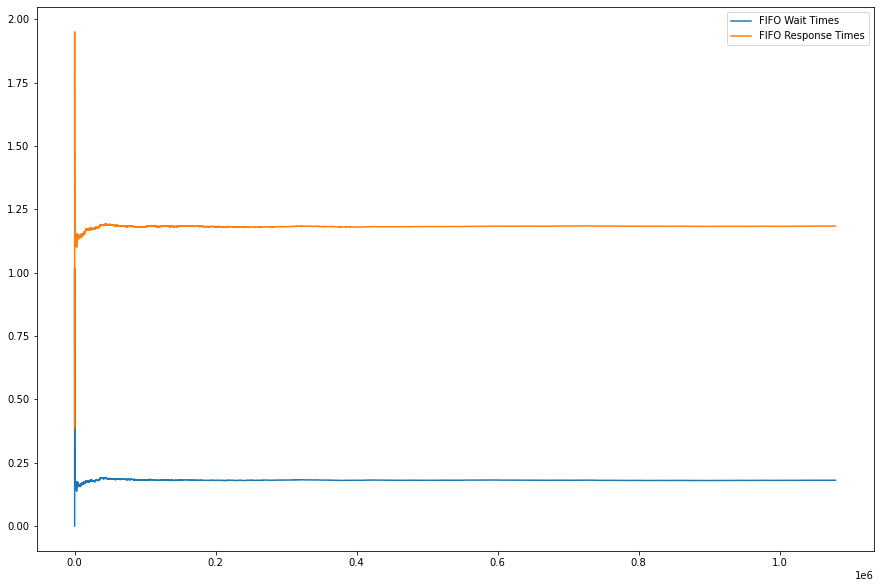

Total time --- 25.40463876724243 seconds ---
µb: 0.9750000000000003, pb: 0.1


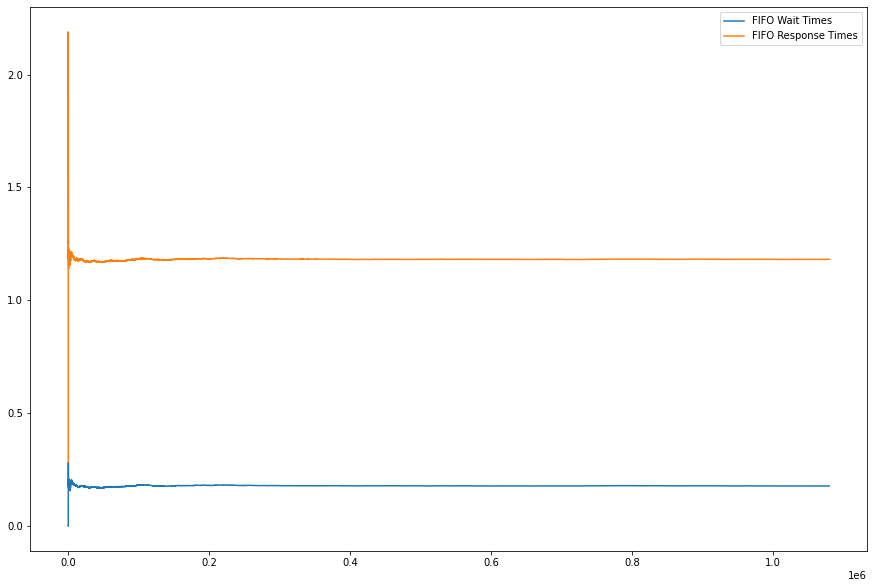

Total time --- 25.430843114852905 seconds ---
µb: 1.0000000000000002, pb: 0.1


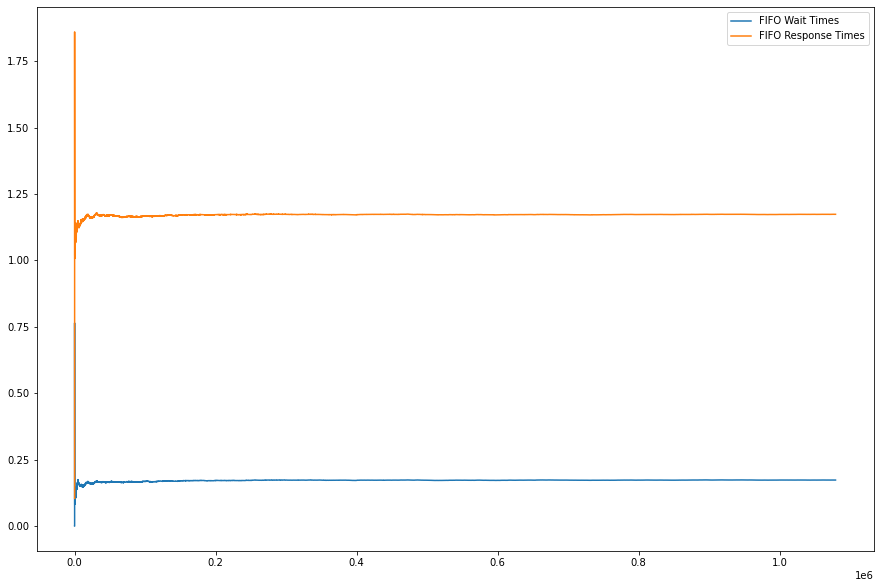

Total time --- 25.332112550735474 seconds ---
µb: 1.0250000000000004, pb: 0.1


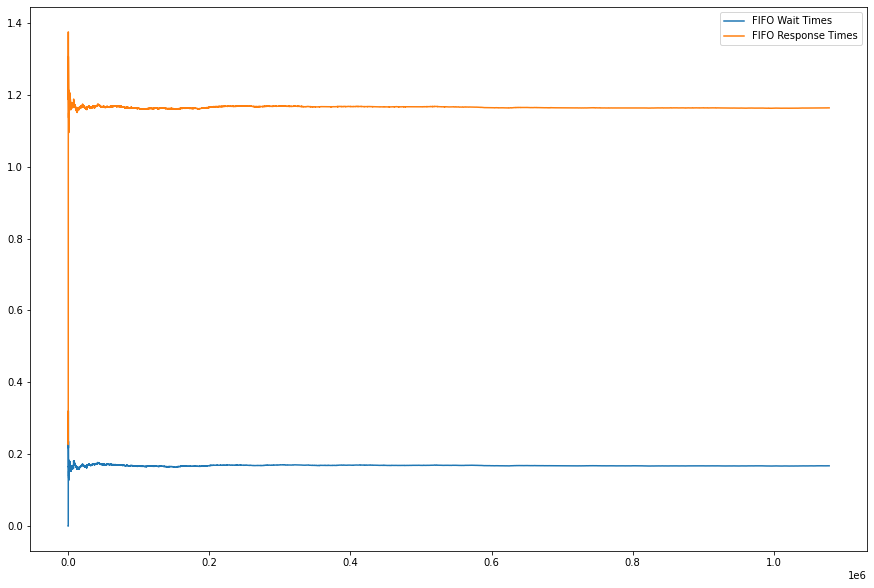

Total time --- 25.429440021514893 seconds ---
µb: 1.0500000000000005, pb: 0.1


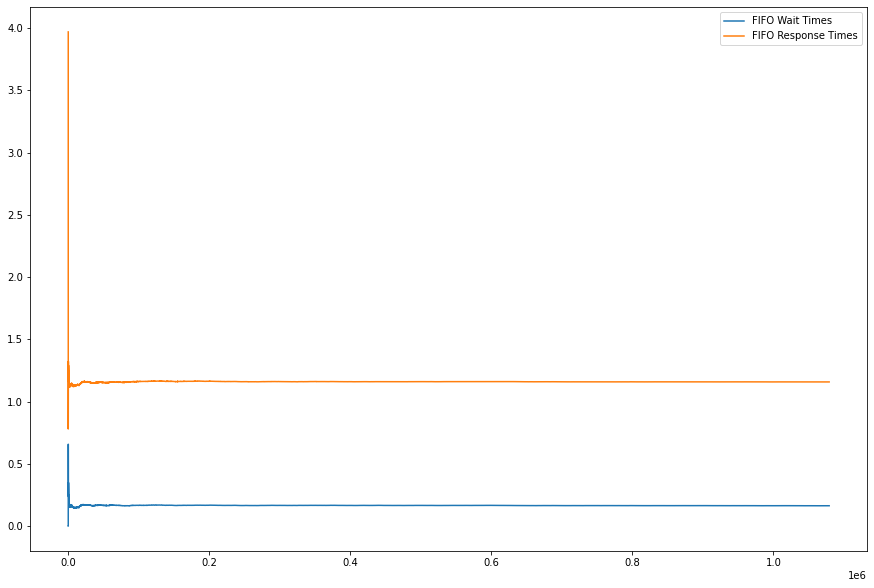

Total time --- 25.243839979171753 seconds ---
µb: 1.0750000000000004, pb: 0.1


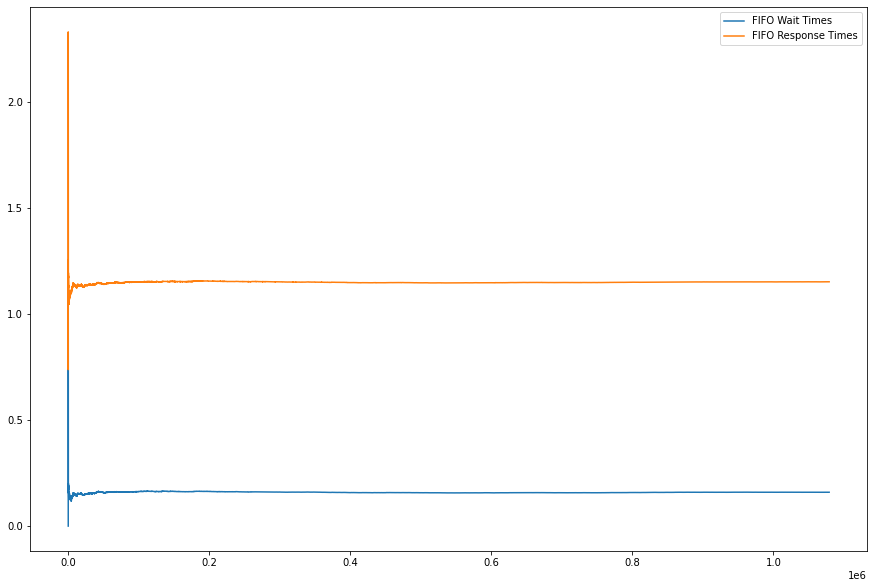

Total time --- 25.392470836639404 seconds ---
µb: 1.1000000000000003, pb: 0.1


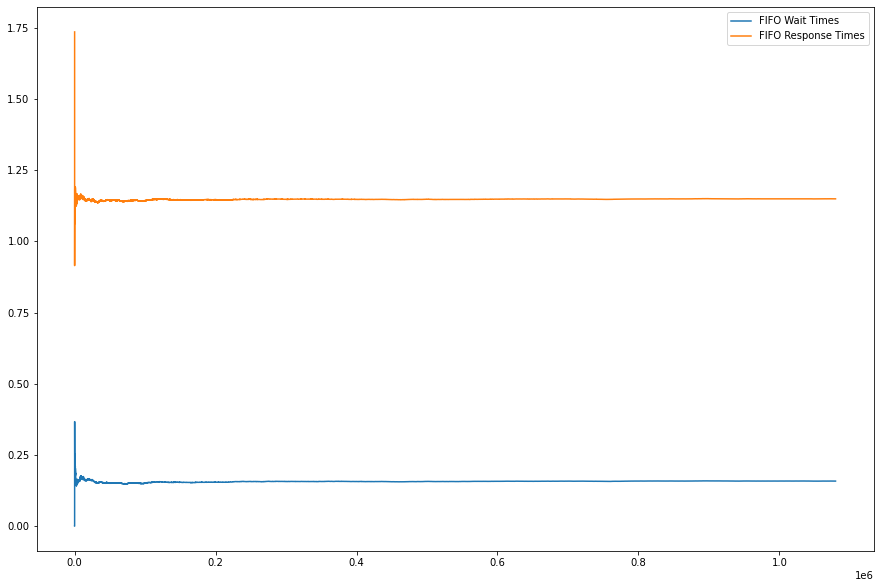

Total time --- 25.279995918273926 seconds ---
µb: 1.1250000000000004, pb: 0.1


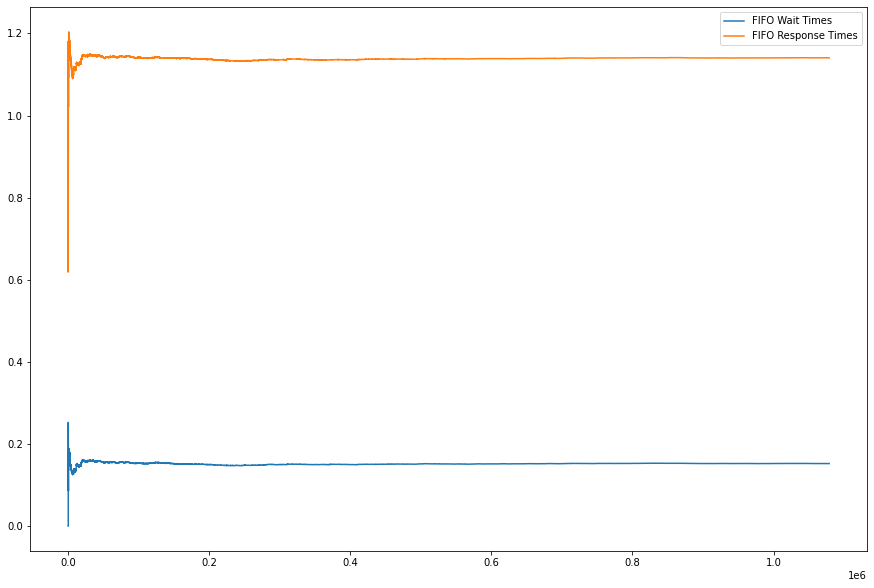

Total time --- 25.334763765335083 seconds ---
µb: 1.1500000000000004, pb: 0.1


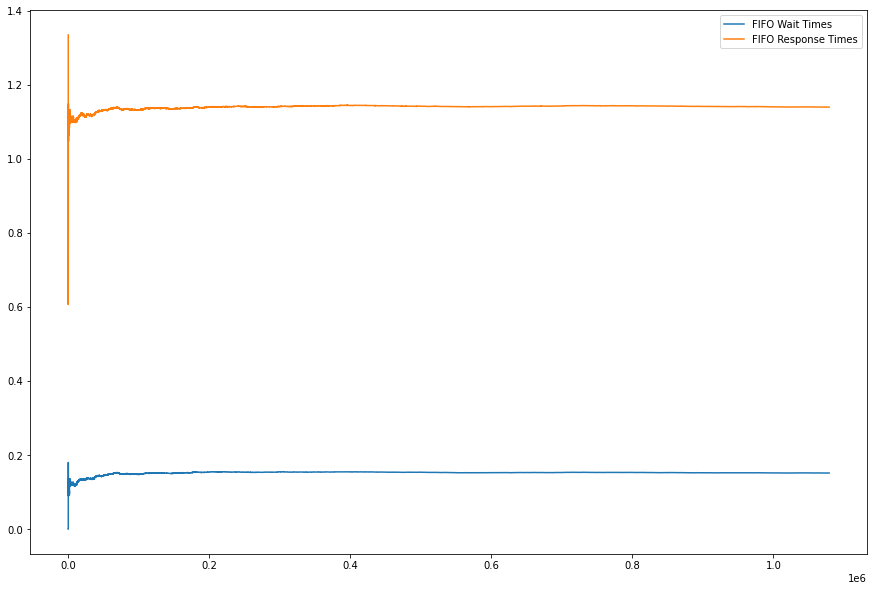

Total time --- 25.166410446166992 seconds ---
µb: 1.1750000000000005, pb: 0.1


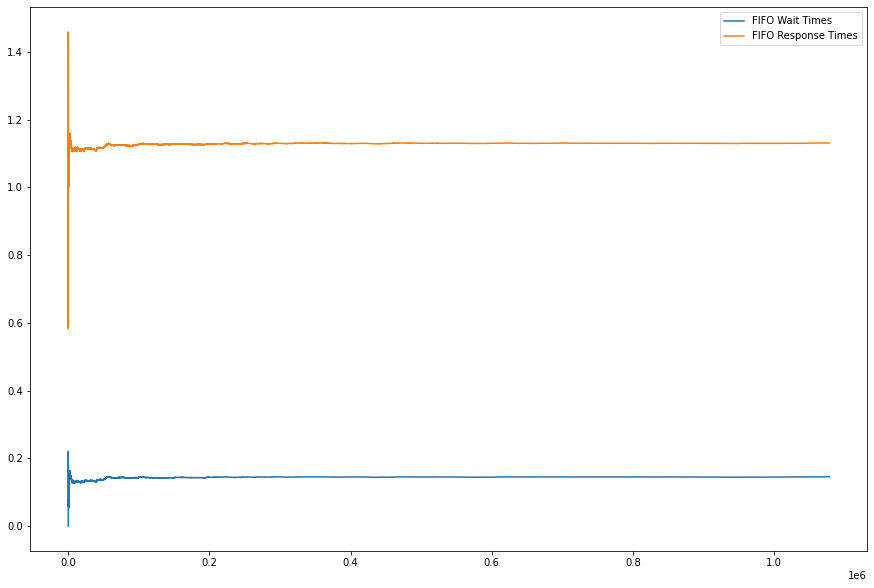

Total time --- 25.227770566940308 seconds ---
µb: 1.2000000000000004, pb: 0.1


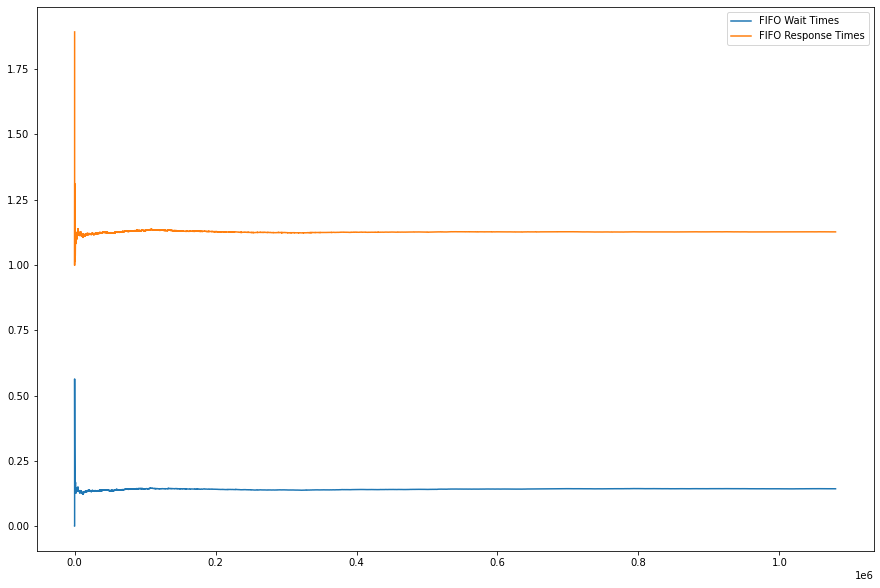

Total time --- 25.24083161354065 seconds ---
µb: 1.2250000000000005, pb: 0.1


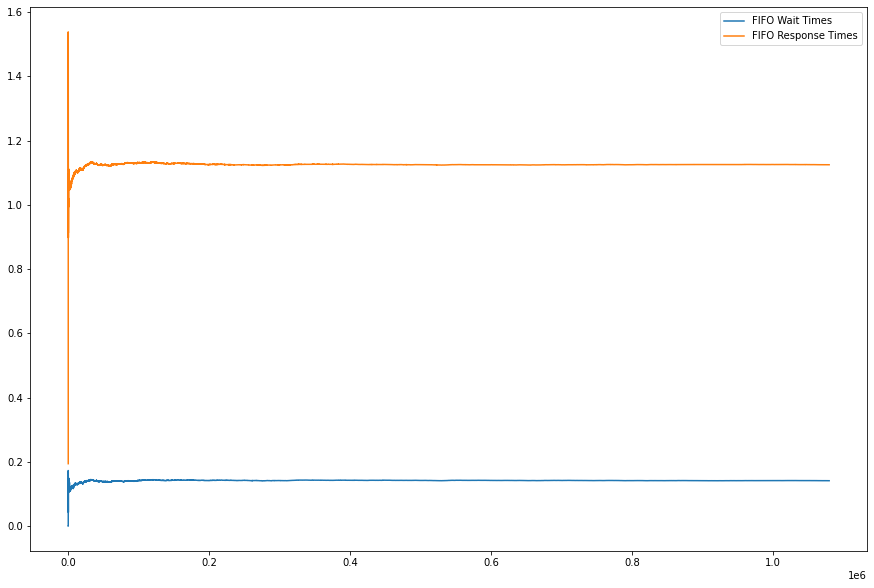

Total time --- 25.20594835281372 seconds ---
µb: 1.2500000000000004, pb: 0.1


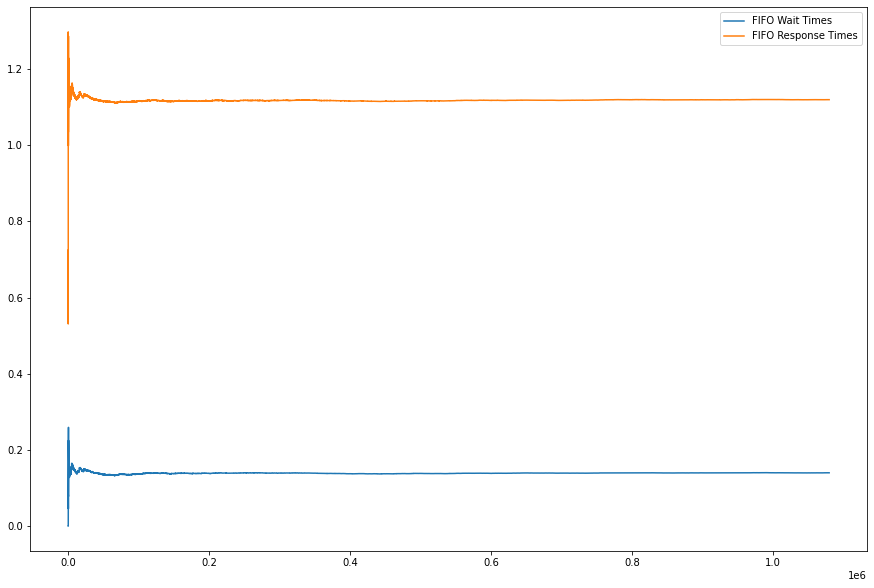

Total time --- 25.480241298675537 seconds ---
µb: 1.2750000000000004, pb: 0.1


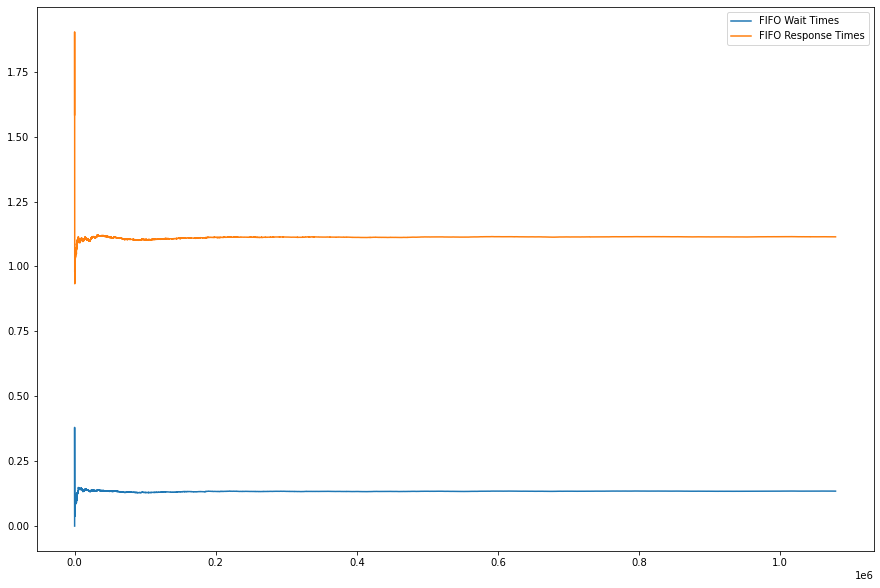

Total time --- 25.228702306747437 seconds ---
µb: 1.3000000000000005, pb: 0.1


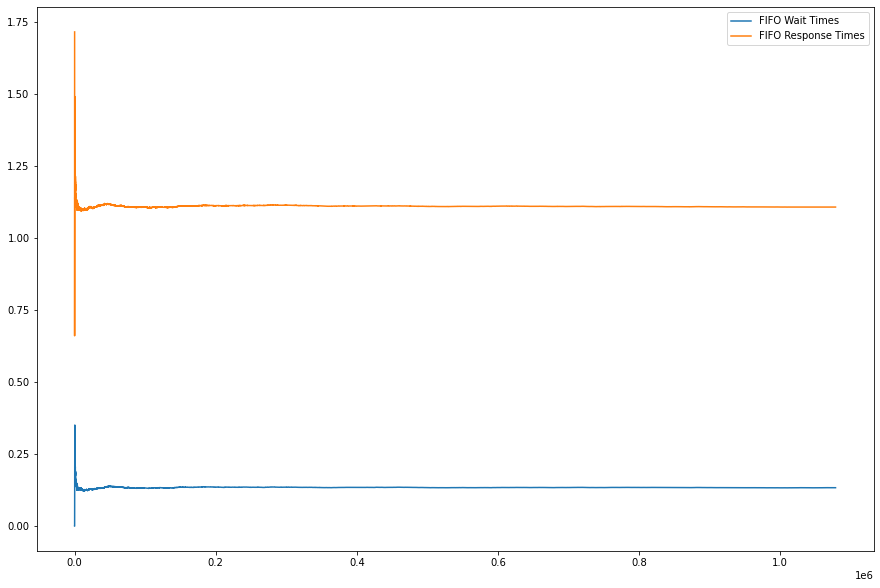

Total time --- 25.54370903968811 seconds ---
µb: 1.3250000000000004, pb: 0.1


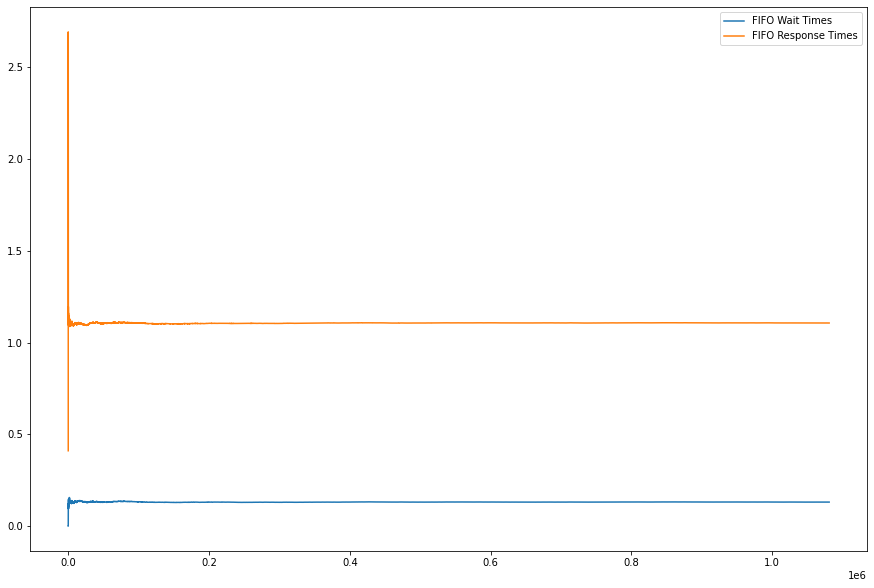

Total time --- 25.369916200637817 seconds ---
µb: 1.3500000000000005, pb: 0.1


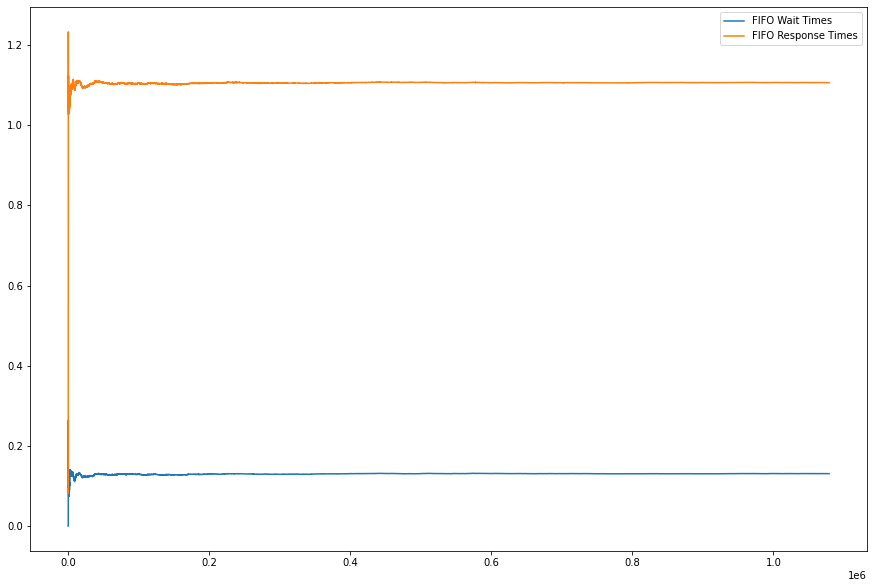

Total time --- 25.286426067352295 seconds ---
µb: 1.3750000000000004, pb: 0.1


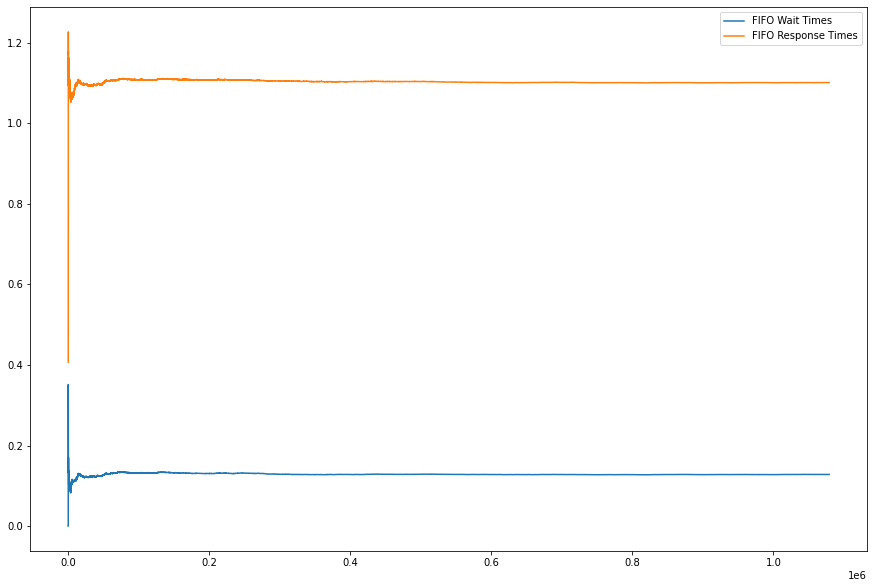

Total time --- 25.33487296104431 seconds ---
µb: 1.4000000000000006, pb: 0.1


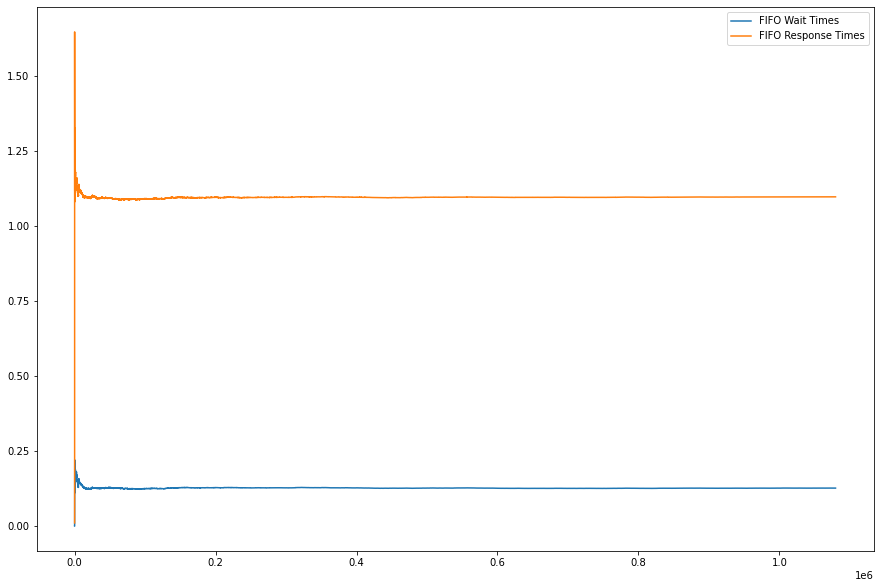

Total time --- 25.347774744033813 seconds ---
µb: 1.4250000000000005, pb: 0.1


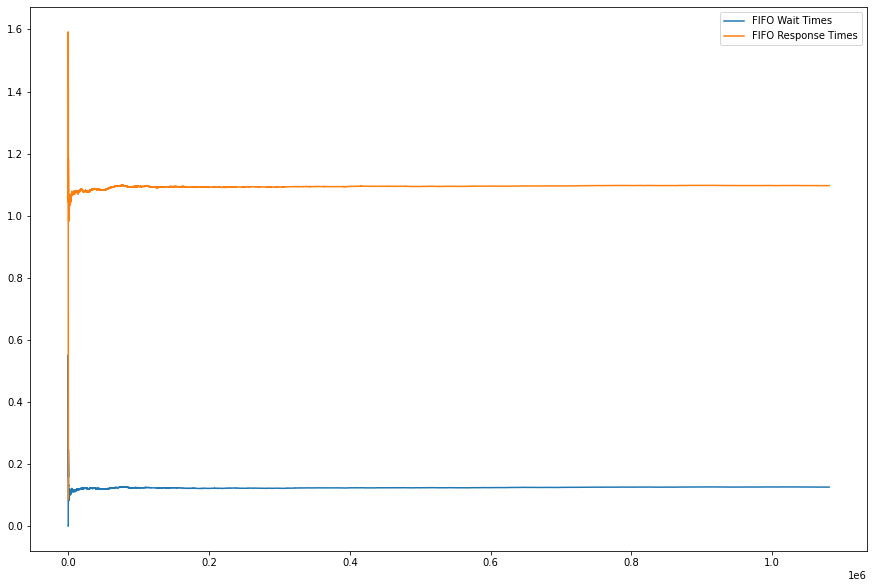

Total time --- 25.358092069625854 seconds ---
µb: 1.4500000000000004, pb: 0.1


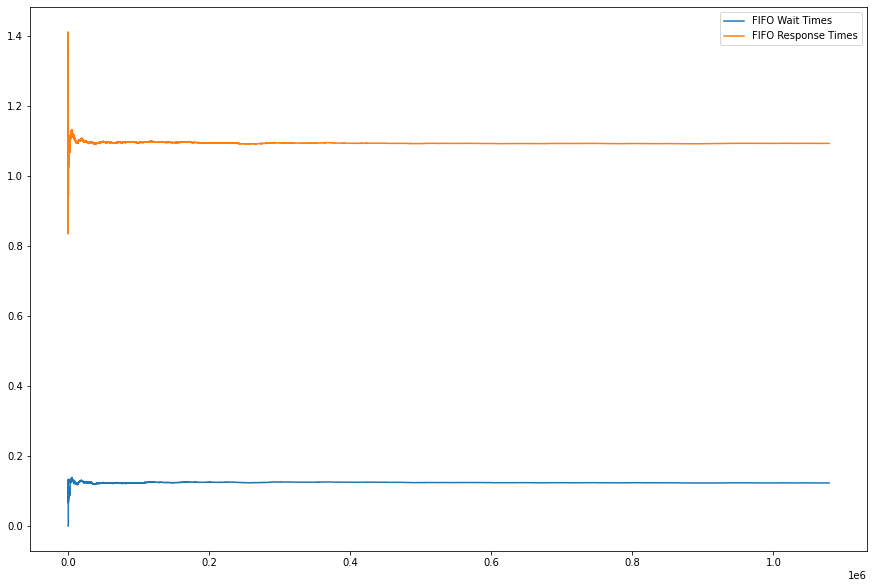

Total time --- 25.372015953063965 seconds ---
µb: 1.4750000000000005, pb: 0.1


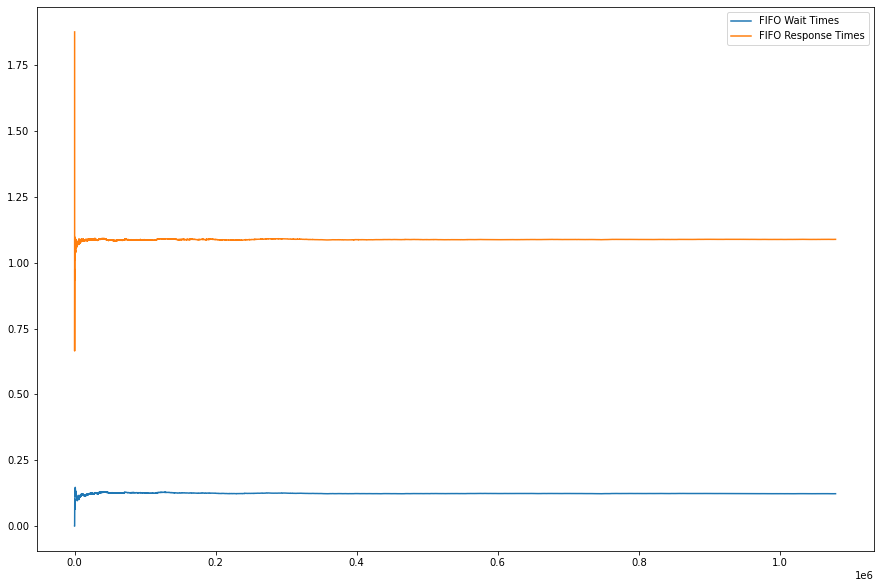

Total time --- 25.301682472229004 seconds ---
µb: 1.5000000000000004, pb: 0.1


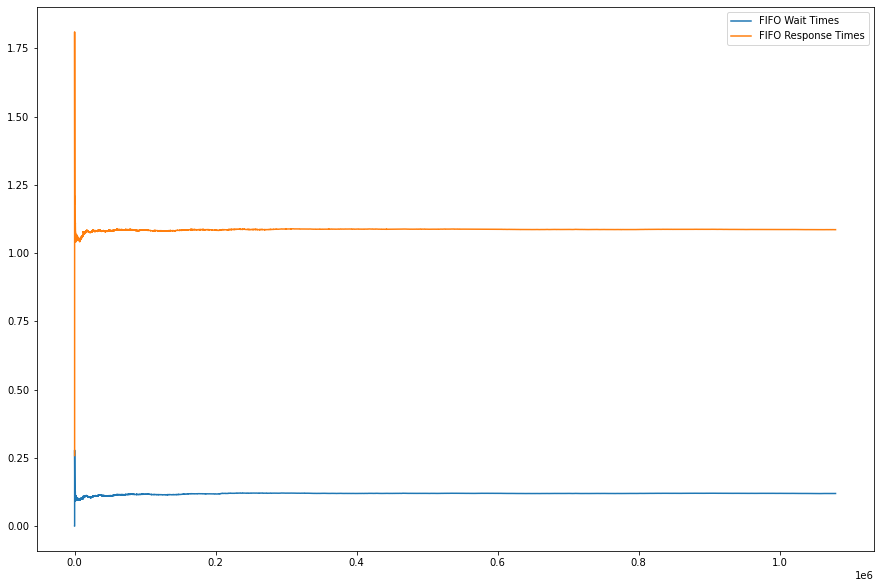

Total time --- 25.356621503829956 seconds ---
µb: 1.5250000000000006, pb: 0.1


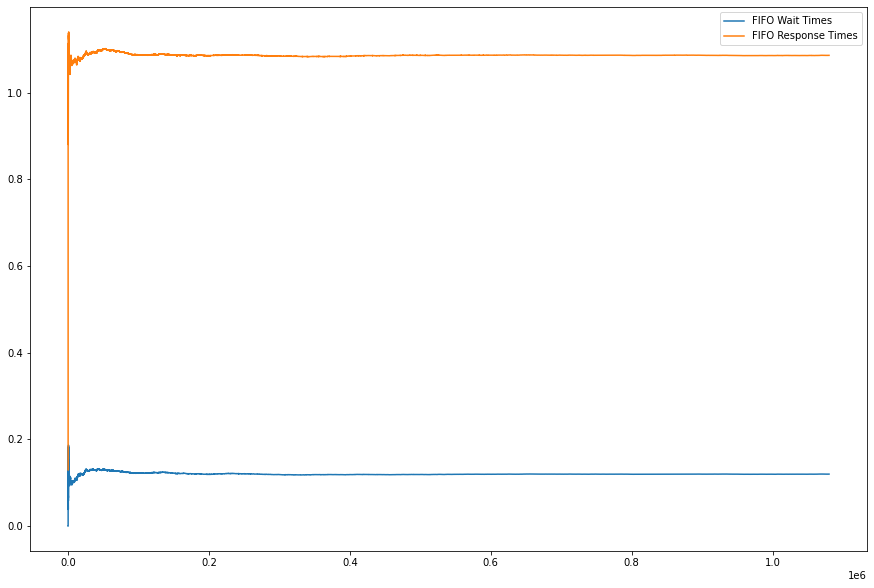

Total time --- 25.456055164337158 seconds ---
µb: 1.5500000000000005, pb: 0.1


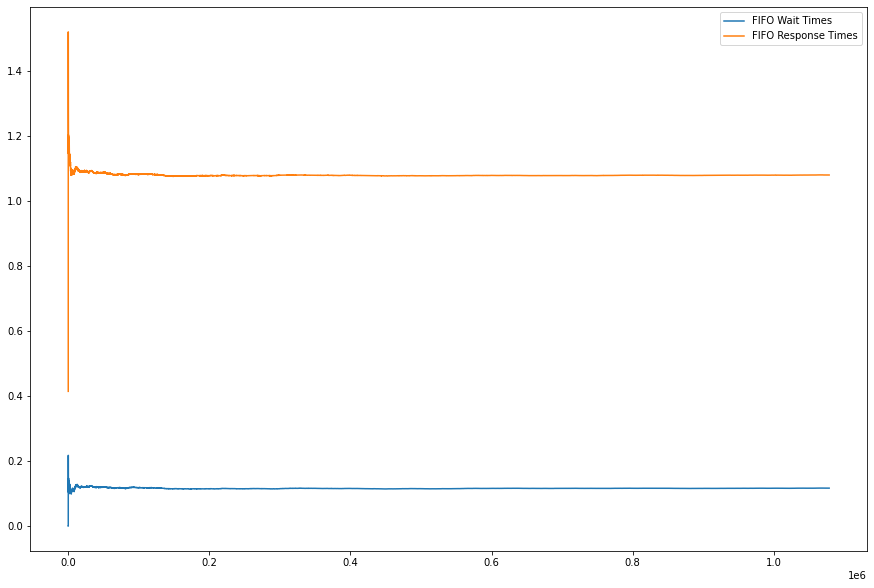

Total time --- 25.324114561080933 seconds ---
µb: 1.5750000000000006, pb: 0.1


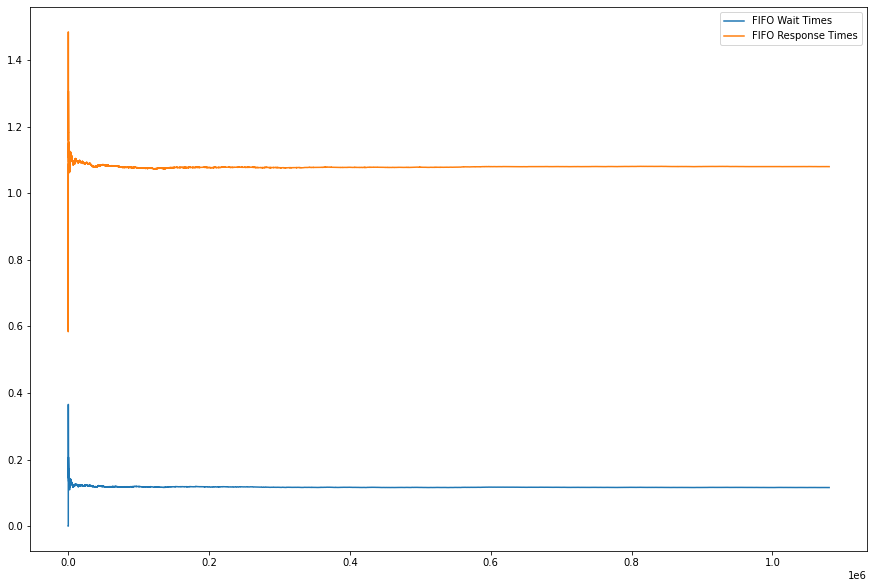

Total time --- 25.104243516921997 seconds ---
µb: 1.6000000000000005, pb: 0.1


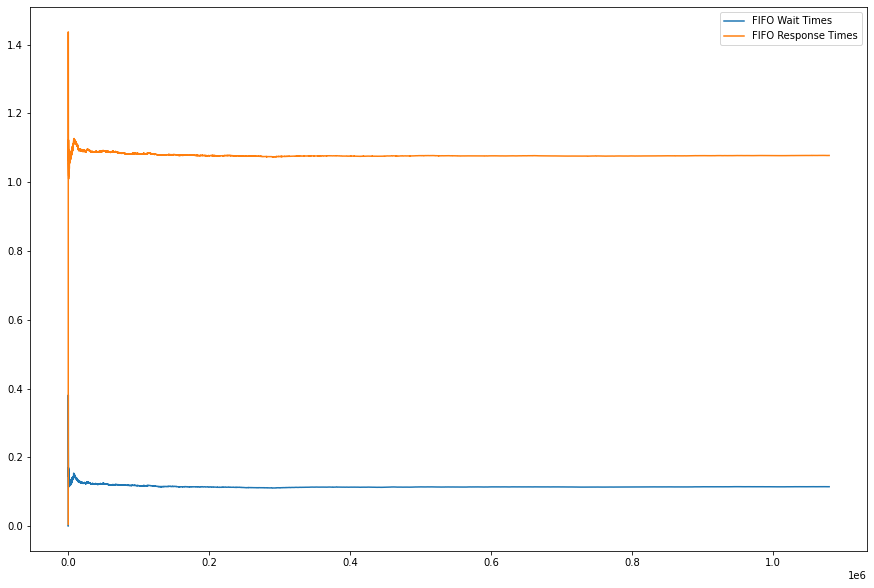

Total time --- 25.22157073020935 seconds ---
µb: 1.6250000000000007, pb: 0.1


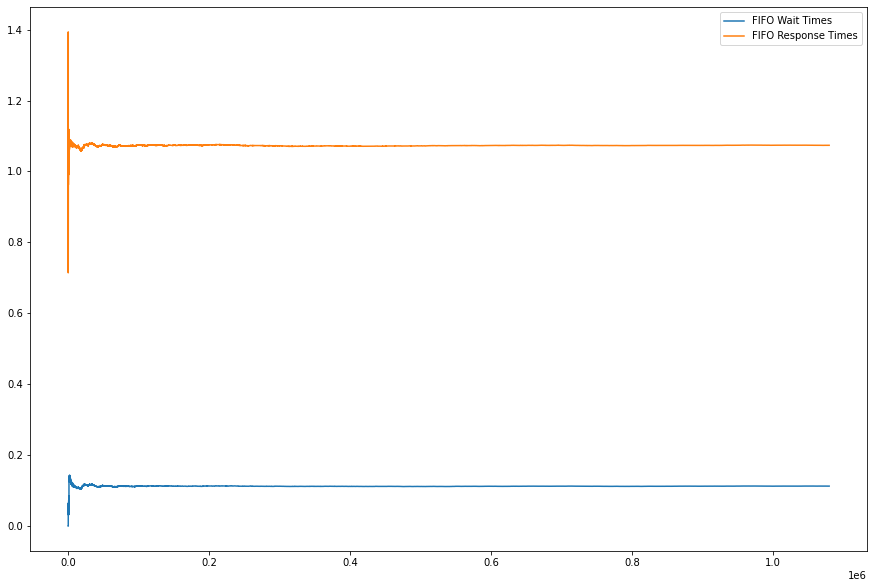

Total time --- 25.234298944473267 seconds ---
µb: 1.6500000000000006, pb: 0.1


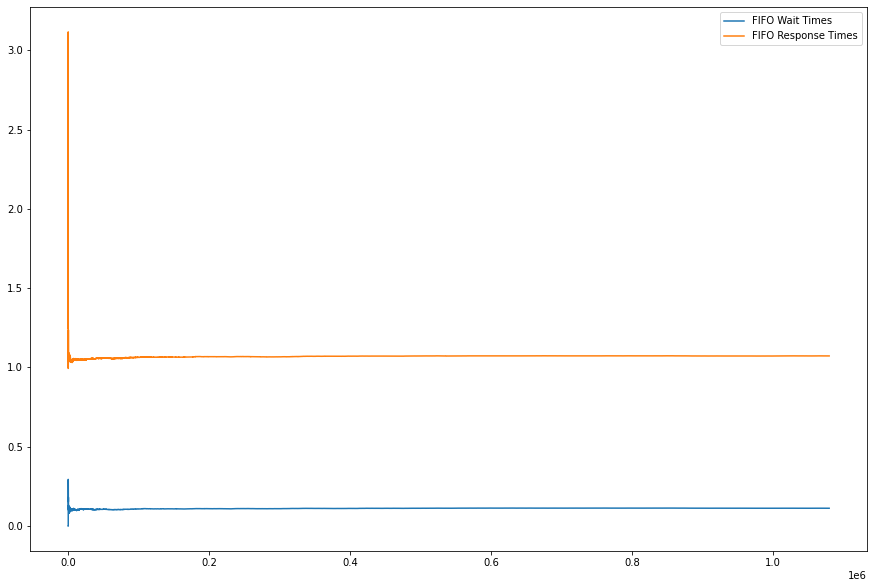

Total time --- 25.507514476776123 seconds ---
µb: 1.6750000000000005, pb: 0.1


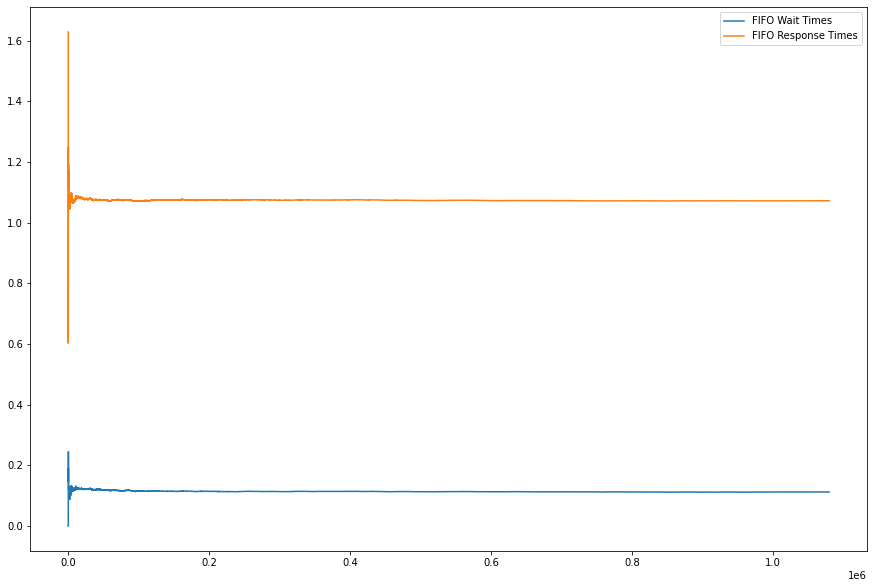

Total time --- 25.182648420333862 seconds ---
µb: 1.7000000000000006, pb: 0.1


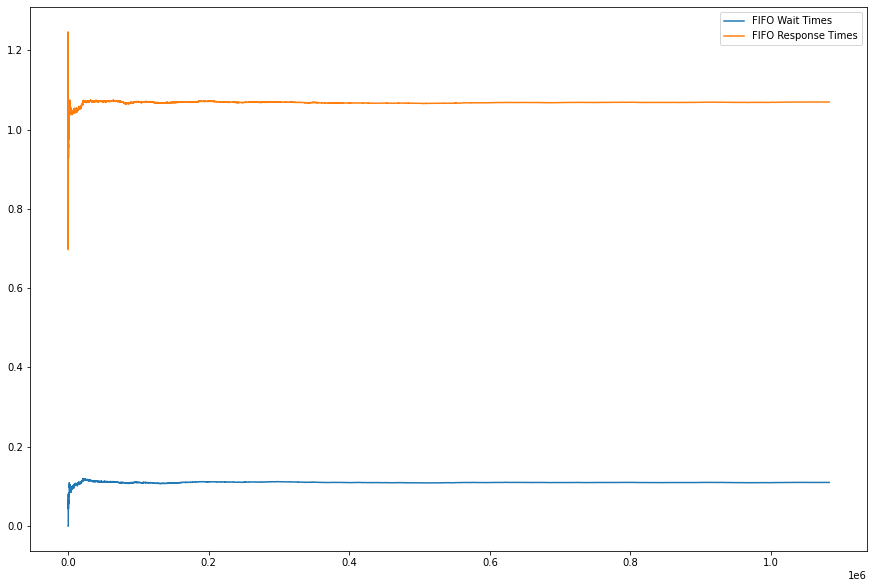

Total time --- 25.22871732711792 seconds ---
µb: 1.7250000000000005, pb: 0.1


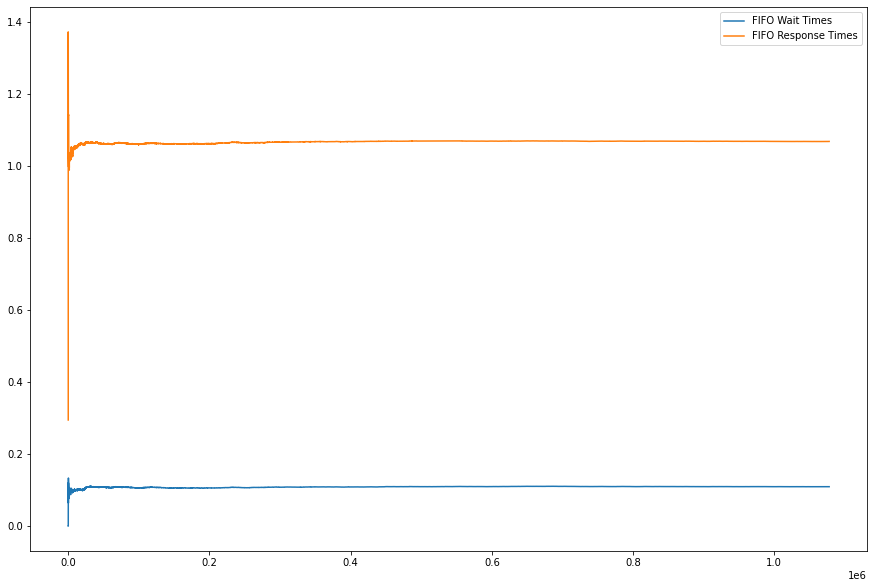

Total time --- 25.190191745758057 seconds ---
µb: 1.7500000000000007, pb: 0.1


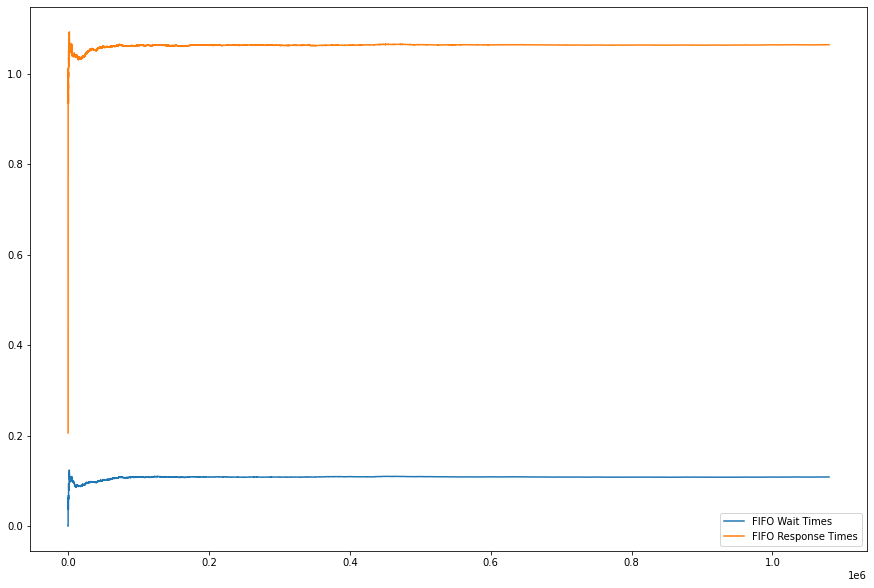

Total time --- 25.56586003303528 seconds ---
µb: 1.7750000000000006, pb: 0.1


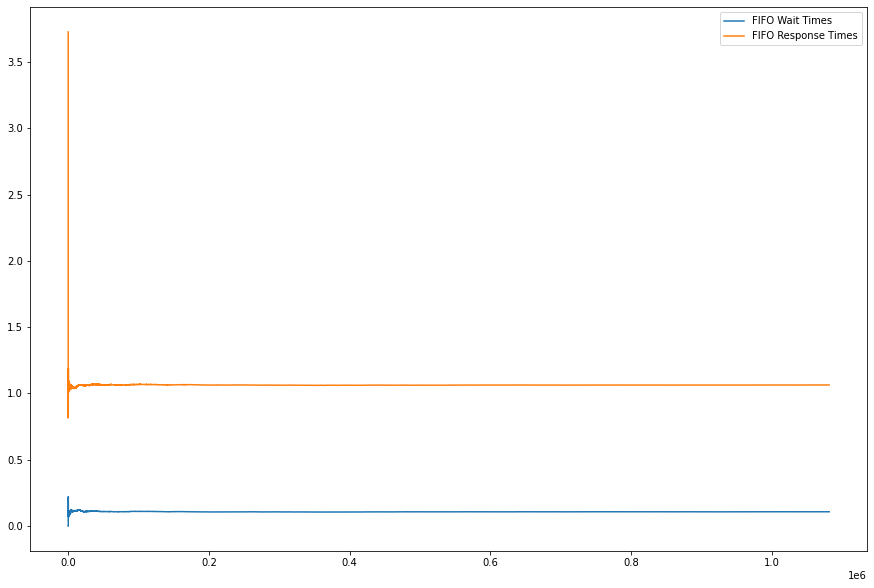

Total time --- 25.221481323242188 seconds ---
µb: 1.8000000000000007, pb: 0.1


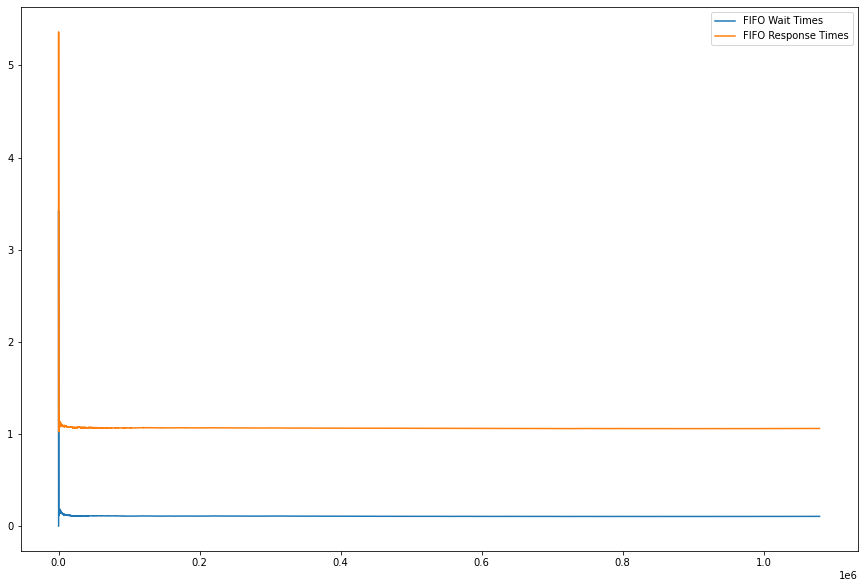

Total time --- 25.14745283126831 seconds ---
µb: 1.8250000000000006, pb: 0.1


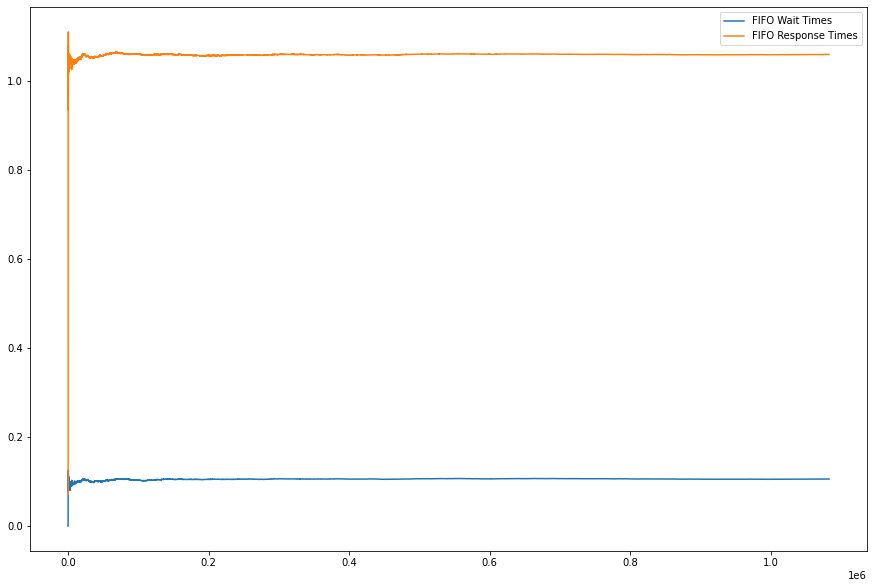

Total time --- 25.197261333465576 seconds ---
µb: 1.8500000000000008, pb: 0.1


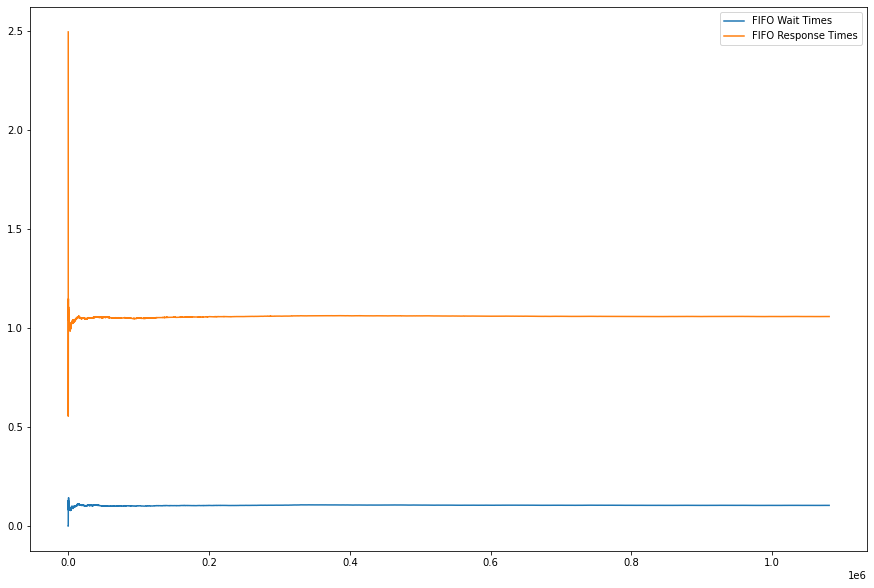

Total time --- 25.428521871566772 seconds ---
µb: 1.8750000000000007, pb: 0.1


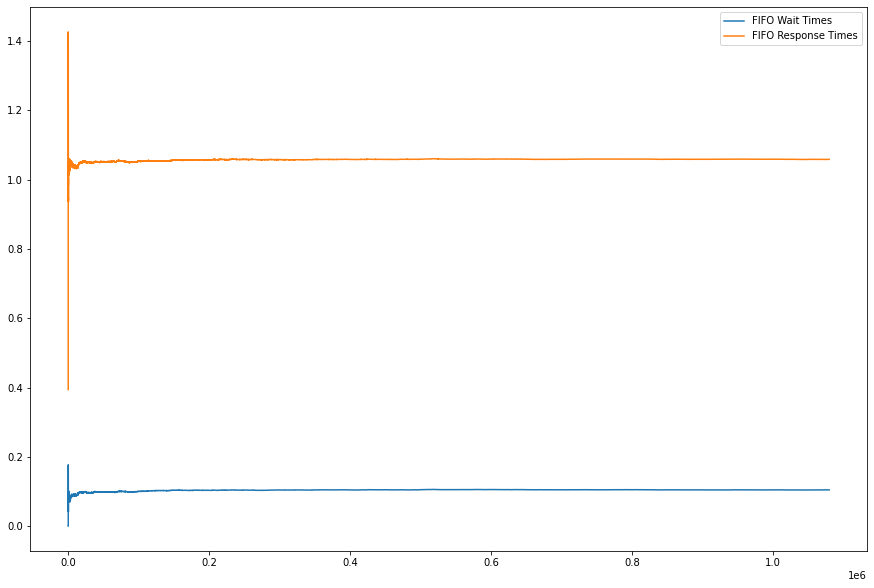

Total time --- 25.194294691085815 seconds ---
µb: 1.9000000000000006, pb: 0.1


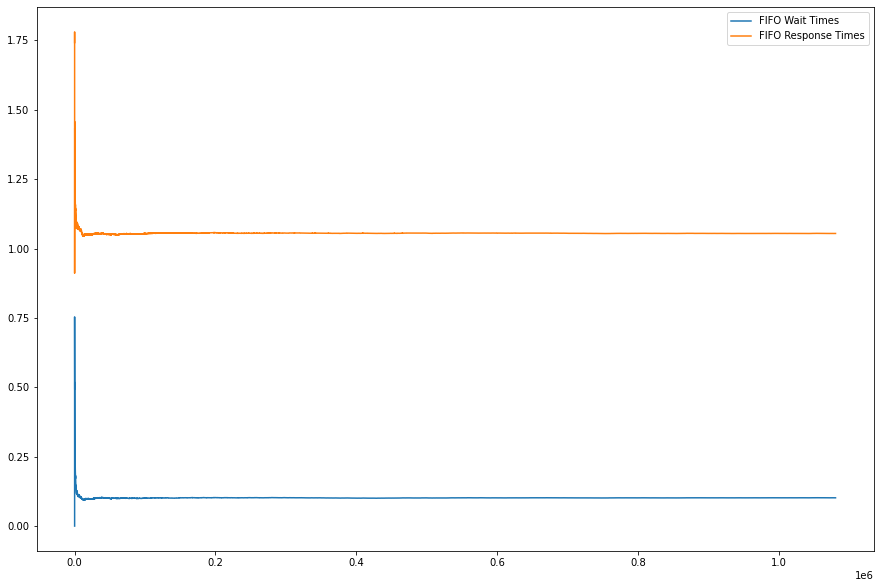

Total time --- 25.125728845596313 seconds ---
µb: 1.9250000000000007, pb: 0.1


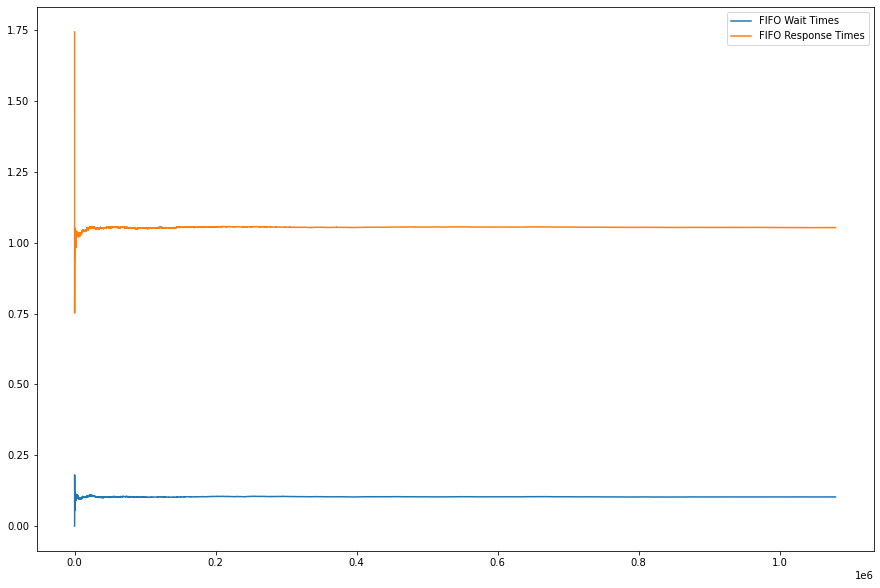

Total time --- 25.242404222488403 seconds ---
µb: 1.9500000000000006, pb: 0.1


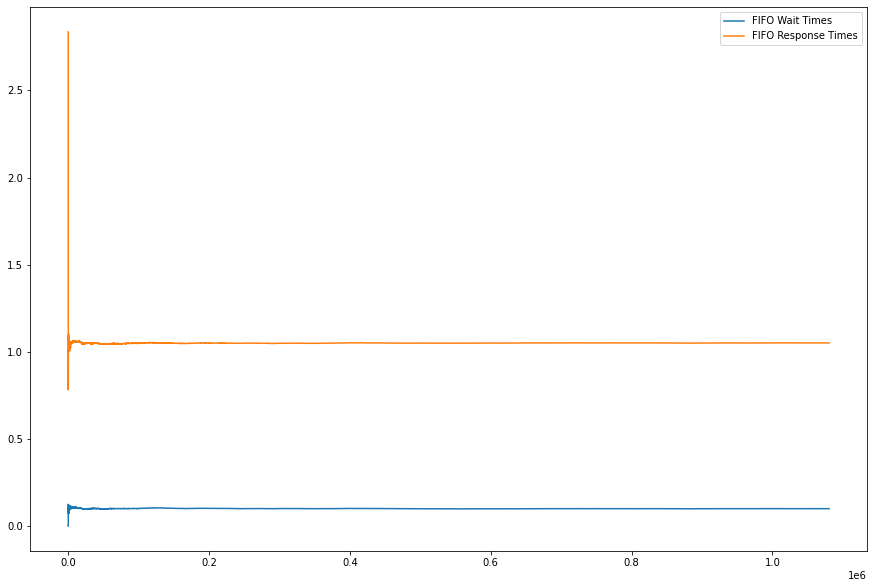

Total time --- 25.21093463897705 seconds ---
µb: 1.9750000000000008, pb: 0.1


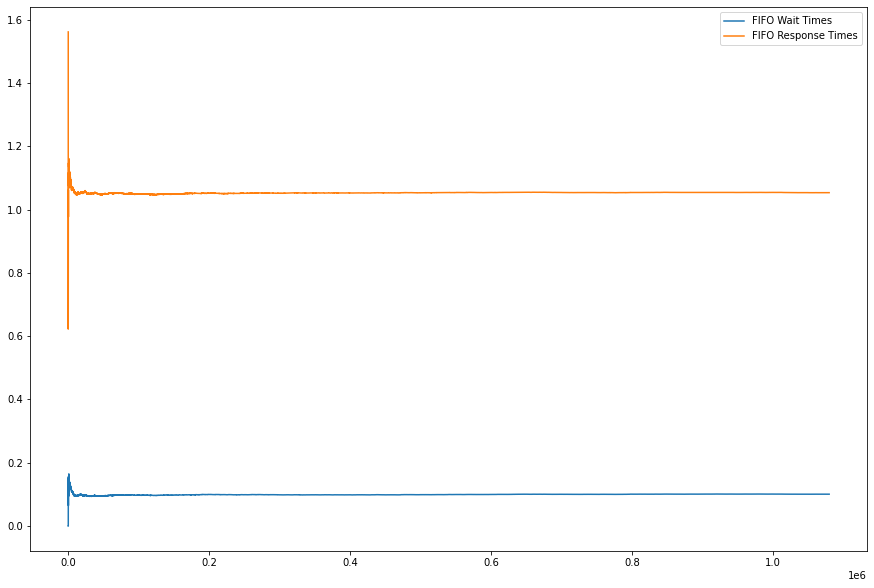

Total time --- 25.20096731185913 seconds ---
µb: 2.0000000000000004, pb: 0.1


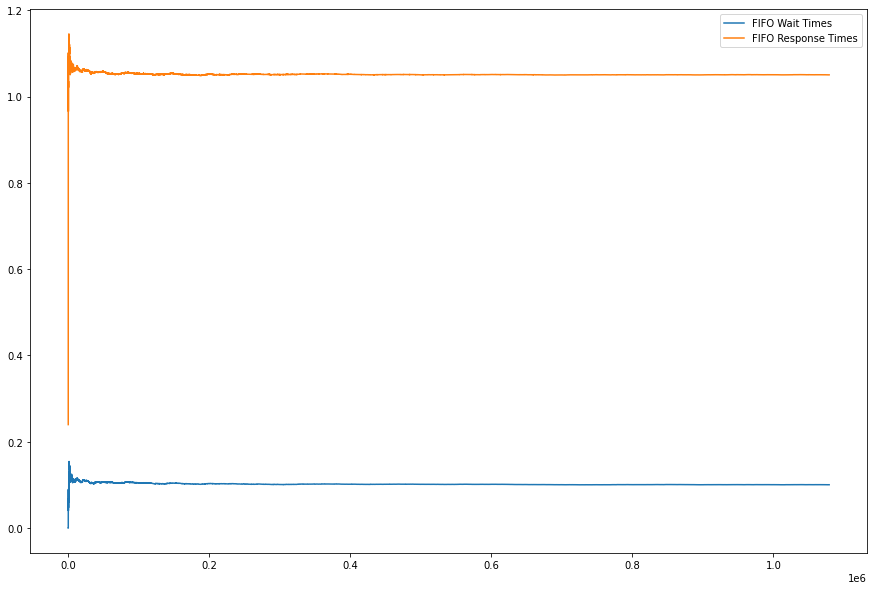

In [2]:
arr_rate = 0.5
mu_s = 1
#mu_b = 0.2
ps = 0.9
pb = 0.1
lambda_s = arr_rate
lambda_b = arr_rate
max_k = 10

measurements = []
abss = []
for mu_b in np.arange(0.05,2.01,0.025):
#for pb in np.arange(0.01,0.51,0.01):
    #ps = 1-pb
    #for mu_b in [0.05,0.1,0.2,0.5,1,2]:
    start_sim = time.time()
    max_job_size = max_k
    prob_b = pb
    mu_s = mu_s
    #mu_b = mu_b
    server_start = 0

    arr_rate = arr_rate
    duration = 3600*600

    server_n = max_k

    # POPULATE THE JOBS ARRIVAL TIMES AND JOB SIZE
    t = 0
    jobs_arr_t = []
    while t <= duration:
        iat = np.random.exponential(1/arr_rate)
        t += iat
        #jobs_arr_t.append((t,random.choice([1,job_size])))
        jobs_arr_t.append((t,get_job_size(max_job_size,prob_b)))

    waiting_times = []
    response_times = []
    queue = []

    # INITIATE THE N SERVERS
    servers = [] #[service_start,end]
    for s in range(server_n):
        servers.append([0,server_start,''])

    server_load = [[0,0]]
    queue_size = [[0,0]]
    jobs_inside = [[0,0,0]]
    throughput_small = 0
    throughput_big = 0

    '''big_job_hol = []
    abs_time = []
    abs_plus = []
    for kk in range (1000):
        abs_time.append([])
        abs_plus.append([])
        for kkk in range(1000):
            abs_time[kk].append([])
            abs_plus[kk].append([])
    #print(abs_time)
    xbxa = []
    big_dones = []'''

    job_id = 0
    big_finish = 0
    big_start = 0
    count_small = False
    xb = 0
    xa = 0
    # ITERATE EVENT-BASED (CAN BE JOBS ARRIVAL OR SERVICE FINISHED)
    while job_id < len(jobs_arr_t):
        t = 999999999
        curr_job = jobs_arr_t[job_id] 
        # ITERATE ALL THE SERVERS AND GET THE NEXT EARLIEST SERVER FINISH
        for s in servers:
            if s[1] > 0 and s[1] < t and s[1] > server_load[-1][0]:
                t = s[1]
        # GET THE NEXT JOBS ARRIVAL
        if jobs_arr_t[job_id][0] < t:
            t = jobs_arr_t[job_id][0]
            queue.append(curr_job)
            job_id += 1
        # NOW, t IS THE NEXT EVENT HAPPENING
        #print(t)

        # HOL TECHNIQUE WHERE SCHEDULERS PRIORITIZE THE JOBS AT THE FRONT,
        # AND WAIT UNTIL HOWEVER MANY SERVERS THAT JOB NEEDS ARE AVAILABLE
        if len(queue) > 0:
            job = queue[0] #only the job at the front
            avl_servers_n = len(servers)-busy_server_n(t,servers)[0] #get the number of available servers
            if avl_servers_n >= job[1]: #if it's enough for the job at the front

                ready_servers = get_avl_servers(t,servers,job[1]) #get all the servers ready to service
                st = np.random.exponential(1/get_srv_rate(job[1],max_job_size,mu_s,mu_b)) #determine the service rate
                for s in ready_servers:# put the job in each ready server
                    '''if count_small and job[0] <= big_finish and job[1] < max_job_size:
                        xb += 1
                    elif count_small and job[0] > big_finish and job[1] < max_job_size:
                        xa += 1
                    elif count_small and job[1] == max_job_size:
                        big_start = t
                        abs_plus[xb][xa].append(big_start-big_finish)
                        small_finish = ready_servers[-1][1]
                        #print(xb)
                        #print(xa)
                        if xb > 0 or xa > 0:
                            abs_time[xb][xa].append(small_finish-big_finish)
                        xbxa.append((xb,xa))
                        xb = 0
                        xa = 0
                        count_small = False'''
                    server_id = s[0]
                    job_name = ''
                    if job[1] == max_job_size: #for graph purpose
                        job_name += 'big'
                    else:
                        job_name += 'small'
                    job_name += '_'+str(job[0])
                    servers[server_id] = [t,t+st,job_name]
                waiting_times.append((t-job[0],job[1])) #for graph purpose
                response_times.append((t+st-job[0],job[1])) #for graph purpose
                queue.pop(0)
                if job[1] == max_job_size: #for graph purpose
                    throughput_big += 1
                    #big_finish = t+st
                    #count_small = True
                    #big_dones.append((job[0],t,t+st))
                else:
                    throughput_small += 1

        '''if len(queue) > 0 and queue[0][1] == max_job_size:
            if len(big_job_hol) > 0:
                if big_job_hol[-1][0] != queue[0][0]:
                    big_job_hol.append((queue[0][0],busy_server_n(t,servers)[1]))
                    #if big_job_hol[-1][1] == 0:
                    #    print(busy_server_n(t,servers))
            else:
                big_job_hol.append((queue[0][0],busy_server_n(t,servers)[1]))'''

        server_state = busy_server_n(t,servers)
        #queue_state = queue_counter(queue,max_job_size)
        server_load.append((t,server_state[0])) #for graph purpose
        queue_size.append((t,len(queue))) #for graph purpose
        jobs_inside.append((t,server_state[1],server_state[2]))

    #print('Arrival rate: '+str(arr_rate))

    # counting the utilization
    '''util = 0 
    n_small = 0
    n_big = 0
    i = 1
    while i < len(server_load):
        if server_load[i-1][0] < server_start:
            i += 1
            continue
        timestamp = server_load[i][0] - server_load[i-1][0]
        load = server_load[i-1][1]
        small_load = jobs_inside[i-1][1]
        big_load = jobs_inside[i-1][2]
        util += (timestamp*load)
        n_small += (timestamp*small_load)
        n_big += (timestamp*big_load)
        i += 1
    duration -= server_start
    avg_util = util/duration/server_n
    avg_n_small = n_small/duration
    avg_n_big = n_big/duration
    avg_thr_small = throughput_small/duration
    avg_thr_big = throughput_big/duration
    measurements.append((avg_util,avg_n_big,avg_n_small,avg_thr_big,avg_thr_small))

    print('Utilization: '+str(avg_util))
    print('Small job throughput: '+str(avg_thr_small))
    print('Big job throughput: '+str(avg_thr_big))
    print('Average number of small job: '+str(avg_n_small))
    print('Average number of big job: '+str(avg_n_big))
    print(mean([wt[0] for wt in waiting_times]))
    print(mean([rt[0] for rt in response_times]))'''

    print("Total time --- %s seconds ---" % (time.time() - start_sim))
    #print('------------')

    '''abss.append([abs_time,abs_plus])

    hols = []
    for h in range(max_job_size+1):
        hols.append(0)
    for hol in big_job_hol:
        hols[hol[1]] = hols[hol[1]] + 1
    print(hols)
    print([h/sum(hols) for h in hols])

    plt.figure(figsize=(17,15))
    plt.bar([n for n in range(max_job_size+1)], [h/sum(hols) for h in hols], label = 'How many small jobs?')
    plt.legend()
    plt.xlabel('Small jobs')
    plt.ylabel('P')
    #plt.xticks([n+(width*0.5) for n in range(max_lambda)],
    #        [n+1 for n in range(max_lambda)])
    plt.show()'''
    
    print('µb: '+str(mu_b)+', pb: '+str(pb))

    avg_wait = []
    n = 1
    tot = 0
    for w in [wt[0] for wt in waiting_times]:
        tot += w
        avg_wait.append(tot/n)
        n += 1

    avg_resp = []
    n = 1
    tot = 0
    for w in [rt[0] for rt in response_times]:
        tot += w
        avg_resp.append(tot/n)
        n += 1

    plt.figure(figsize=(15,10))
    plt.plot([i for i in range(len(avg_wait))], avg_wait, label = "FIFO Wait Times")
    plt.plot([i for i in range(len(avg_resp))], avg_resp, label = "FIFO Response Times")
    plt.legend()
    plt.show()

    busy_times_s = []

    tracking = False
    for j in jobs_inside:
        if (not tracking) and j[1] > 0:
            tracking = True
            busy_times_s.append([j[0]])
        elif tracking and j[1] == 0:
            tracking = False
            busy_times_s[-1].append(j[0])
    if len(busy_times_s[-1]) < 2:
        busy_times_s[-1].append(j[0])
        
    busy_s_exp = np.mean(np.array([b[1]-b[0] for b in busy_times_s[:-1]]))

    busy_times = []

    tracking = False
    for j in jobs_inside:
        if (not tracking) and j[1]+j[2] > 0:
            tracking = True
            busy_times.append([j[0]])
        elif tracking and j[1]+j[2] == 0:
            tracking = False
            busy_times[-1].append(j[0])
    if len(busy_times[-1]) < 2:
        busy_times[-1].append(j[0])
        
    busy_exp = np.mean(np.array([b[1]-b[0] for b in busy_times[:-1]]))

    idle_times = []

    tracking = False
    for j in jobs_inside:
        if (not tracking) and j[1]+j[2] == 0:
            tracking = True
            idle_times.append([j[0]])
        elif tracking and j[1]+j[2] > 0:
            tracking = False
            idle_times[-1].append(j[0])
    if len(idle_times[-1]) < 2:
        idle_times[-1].append(j[0])
        
    idle_exp = np.mean(np.array([b[1]-b[0] for b in idle_times[:-1]]))


    '''if len(busy_times) > 1:
        max_lim = 0

        data = np.sort(np.array([b[1]-b[0] for b in busy_times[:-1]]))
        mean = np.mean(data)
        std_dev = np.std(data)
        # 3. Normalize array around 0
        zero_based = abs(data - mean)
        # 4. Define maximum number of standard deviations
        max_deviations = 3
        # 5. Access only non-outliers using Boolean Indexing
        no_outliers = np.array(data[zero_based < max_deviations * std_dev])
        try:
            max_lim = max(no_outliers)
        except:
            data = np.sort(np.array([b[1]-b[0] for b in busy_times_s[:-1]]))
            mean = np.mean(data)
            std_dev = np.std(data)
            # 3. Normalize array around 0
            zero_based = abs(data - mean)
            # 4. Define maximum number of standard deviations
            max_deviations = 3
            # 5. Access only non-outliers using Boolean Indexing
            no_outliers = np.array(data[zero_based < max_deviations * std_dev])
            max_lim = max(no_outliers)

        data = np.sort(np.array([b[1]-b[0] for b in busy_times_s[:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
        plt.xlim([0, max_lim+1])
        plt.xlabel('Bs')
        plt.ylabel('pdf')
        plt.savefig('graphs/Bs '+str(mu_b)+' '+str(pb)+'.png', bbox_inches='tight')
        plt.show()

        data = np.sort(np.array([b[1]-b[0] for b in busy_times[:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
        plt.xlim([0, max_lim+1])
        plt.xlabel('B')
        plt.ylabel('pdf')
        plt.savefig('graphs/B '+str(mu_b)+' '+str(pb)+'.png', bbox_inches='tight')
        plt.show()

        data = np.sort(np.array([b[1]-b[0] for b in idle_times[:-1]]))

        plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
        plt.xlim([0, max_lim+1])
        plt.xlabel('I')
        plt.ylabel('pdf')
        plt.savefig('graphs/I '+str(mu_b)+' '+str(pb)+'.png', bbox_inches='tight')
        plt.show()
    else:
        print('Saturated')
        print('')
        print('----------------------------')'''
    
    abss.append([busy_s_exp,busy_exp,idle_exp])

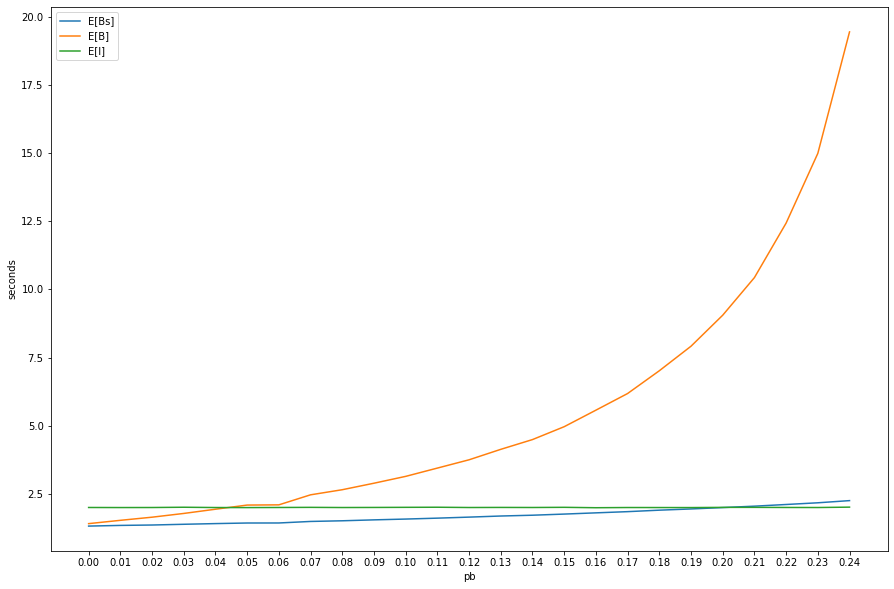

In [20]:
limit = 25

#busy_s_exp = [np.mean(np.array([b[1]-b[0] for b in p[1][:-1]])) for p in abss[:limit]]

plt.figure(figsize=(15,10))
plt.plot([n/100 for n in range(limit)], [a[0] for a in abss[:limit]], label = 'E[Bs]')
#plt.xticks([n/100 for n in range(limit)])
#plt.show()

#busy_exp = [np.mean(np.array([b[1]-b[0] for b in p[0][:-1]])) for p in abss[:limit]]

#plt.figure(figsize=(15,10))
plt.plot([n/100 for n in range(limit)], [a[1] for a in abss[:limit]], label = 'E[B]')
#plt.xticks([n/100 for n in range(limit)])
#plt.show()

#limit = 35
#idle_exp = [np.mean(np.array([b[1]-b[0] for b in p[2][:-1]])) for p in abss[:limit]]

#plt.figure(figsize=(15,10))
plt.plot([n/100 for n in range(limit)], [a[2] for a in abss[:limit]], label = 'E[I]')
plt.xticks([n/100 for n in range(limit)])
#plt.yticks(np.arange(0,4,0.5))
plt.xlabel('pb')
plt.ylabel('seconds')
plt.legend()
plt.show()

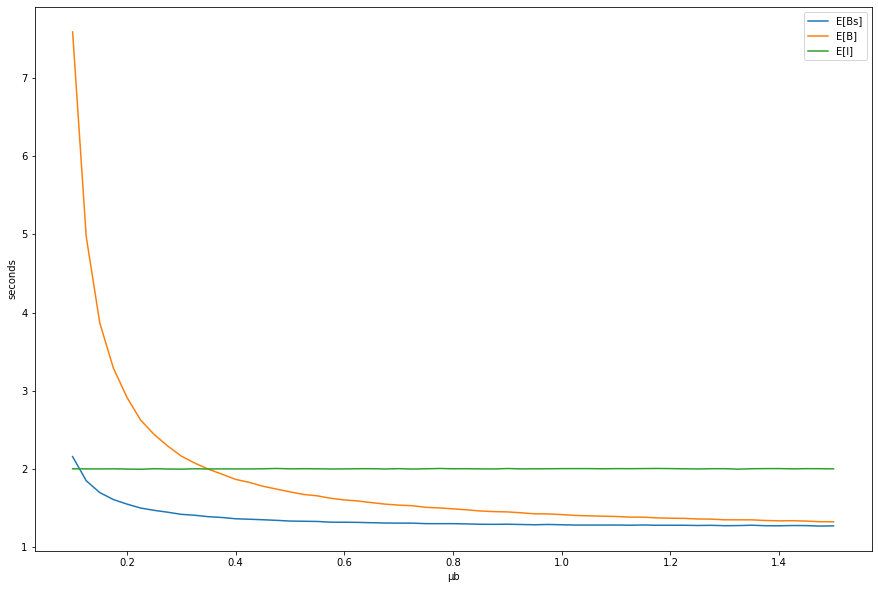

In [15]:
limit = 25

plt.figure(figsize=(15,10))
plt.plot(np.arange(0.1,1.51,0.025), [a[0] for a in abss[2:59]], label = 'E[Bs]')
#plt.xticks([n/100 for n in range(limit)])
#plt.show()

#plt.figure(figsize=(15,10))
plt.plot(np.arange(0.1,1.51,0.025), [a[1] for a in abss[2:59]], label = 'E[B]')
#plt.xticks([n/100 for n in range(limit)])
#plt.show()

#limit = 35

#plt.figure(figsize=(15,10))
plt.plot(np.arange(0.1,1.51,0.025), [a[2] for a in abss[2:59]], label = 'E[I]')
#plt.xticks([n/100 for n in range(limit)])
#plt.yticks(np.arange(0,4,0.5))
plt.xlabel('µb')
plt.ylabel('seconds')
plt.legend()
plt.show()

In [29]:
[n/100 for n in range(40)]

[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39]

In [30]:
busy_exp

[1.4074890127975461,
 1.5204738773653896,
 1.6499308944844884,
 1.7850031826774573,
 1.9344248006442666,
 2.0915475294610437,
 2.0933849793637775,
 2.468553494627642,
 2.676719534017094,
 2.9038515307433905,
 3.1422978440159217,
 3.4546344104359137,
 3.758649049164698,
 4.1264966357829795,
 4.541223724345595,
 4.971669360155143,
 5.5792036125852205,
 6.211163992632677,
 7.018981880688357,
 7.871988592098305,
 8.952253935131033,
 10.461532026188056,
 12.781408640041414,
 15.022345998515483,
 18.726085530153256,
 25.57030296882788,
 35.16339482672406,
 59.4789519883187,
 263.8701084165649,
 172.8776314226838,
 46.862043183459704,
 7.397994624198612,
 98.06682494663347,
 17.952803838664238,
 11.88139812189626,
 6.553904561726297,
 40.45072324863574,
 6.305996473982602,
 0.011361815751116389,
 6.38757382771035]

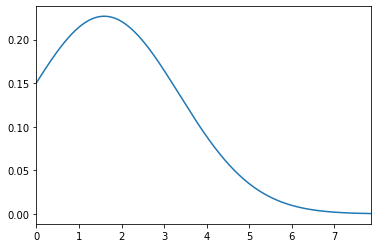

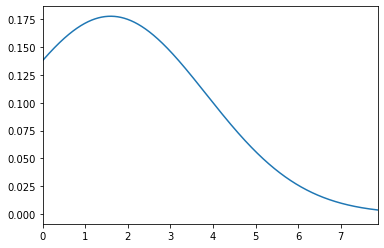

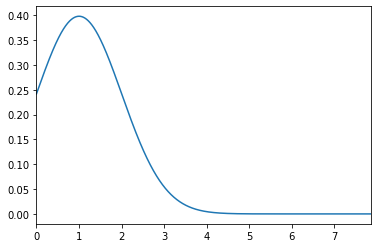

In [182]:
data = np.sort(np.array([b[1]-b[0] for b in busy_times_s[:-1]]))

mean = np.mean(data)
std_dev = np.std(data)
# 3. Normalize array around 0
zero_based = abs(data - mean)
# 4. Define maximum number of standard deviations
max_deviations = 3
# 5. Access only non-outliers using Boolean Indexing
no_outliers = np.array(data[zero_based < max_deviations * std_dev])
max_lim = max(no_outliers)

plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
plt.xlim([0, max_lim+1])
plt.show()

data = np.sort(np.array([b[1]-b[0] for b in busy_times[:-1]]))

mean = np.mean(data)
std_dev = np.std(data)
# 3. Normalize array around 0
zero_based = abs(data - mean)
# 4. Define maximum number of standard deviations
max_deviations = 2
# 5. Access only non-outliers using Boolean Indexing
no_outliers = np.array(data[zero_based < max_deviations * std_dev])

plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
plt.xlim([0, max_lim+1])
plt.show()

data = np.sort(np.array([b[1]-b[0] for b in idle_times[:-1]]))

mean = np.mean(data)
std_dev = np.std(data)
# 3. Normalize array around 0
zero_based = abs(data - mean)
# 4. Define maximum number of standard deviations
max_deviations = 2
# 5. Access only non-outliers using Boolean Indexing
no_outliers = np.array(data[zero_based < max_deviations * std_dev])

plt.plot(data, sct.norm.pdf(data, loc=data.mean(), scale=data.std()))
plt.xlim([0, max_lim+1])
plt.show()

In [62]:
busy_times_s = []

tracking = False
for j in jobs_inside:
    if (not tracking) and j[1] > 0:
        tracking = True
        busy_times_s.append([j[0]])
    elif tracking and j[1] == 0:
        tracking = False
        busy_times_s[-1].append(j[0])
        
busy_times_s[:100]

[[0.012259441142677524, 0.023080205050944148],
 [0.048670646059542896, 0.13474040142380672],
 [0.16279054776535432, 0.16379862475720425],
 [0.2022349824757669, 0.3455504883505879],
 [0.3565097156721439, 0.4758149339640064],
 [0.5782261268211835, 0.8554760443950337],
 [3.04518757609616, 3.450155534526193],
 [3.6570180851711207, 4.211121601509271],
 [6.176425739298532, 6.334259126400889],
 [6.709941538302188, 7.613274909970462],
 [10.682604314102306, 11.584639187748957],
 [17.33852051112478, 17.76243046324484],
 [19.079887425955498, 20.400630745973732],
 [20.698008040179545, 21.438919758266294],
 [22.923351591923623, 23.436134627594353],
 [23.620533997321164, 24.29792184473723],
 [24.360775141552825, 24.54690281968695],
 [24.68439488343017, 25.262543091109656],
 [26.39273268584998, 26.895606185363444],
 [30.188916415214763, 30.87377671454158],
 [33.908726767495565, 34.10642349529052],
 [37.62239945475547, 37.8917174864853],
 [39.992027654942184, 40.567353747172454],
 [46.9352613947991, 4

In [64]:
busy_times = []

tracking = False
for j in jobs_inside:
    if (not tracking) and j[1]+j[2] > 0:
        tracking = True
        busy_times.append([j[0]])
    elif tracking and j[1]+j[2] == 0:
        tracking = False
        busy_times[-1].append(j[0])
        
busy_times[:100]

[[0.012259441142677524, 0.023080205050944148],
 [0.048670646059542896, 0.13474040142380672],
 [0.16279054776535432, 0.16379862475720425],
 [0.2022349824757669, 0.3455504883505879],
 [0.3565097156721439, 0.4758149339640064],
 [0.5782261268211835]]

In [65]:
idle_times = []

tracking = False
for j in jobs_inside:
    if (not tracking) and j[1]+j[2] == 0:
        tracking = True
        idle_times.append([j[0]])
    elif tracking and j[1]+j[2] > 0:
        tracking = False
        tracked[1] = j[0]
        idle_times[-1].append(j[0])
        
idle_times[:100]

[[0, 0.012259441142677524],
 [0.023080205050944148, 0.048670646059542896],
 [0.13474040142380672, 0.16279054776535432],
 [0.16379862475720425, 0.2022349824757669],
 [0.3455504883505879, 0.3565097156721439],
 [0.4758149339640064, 0.5782261268211835]]

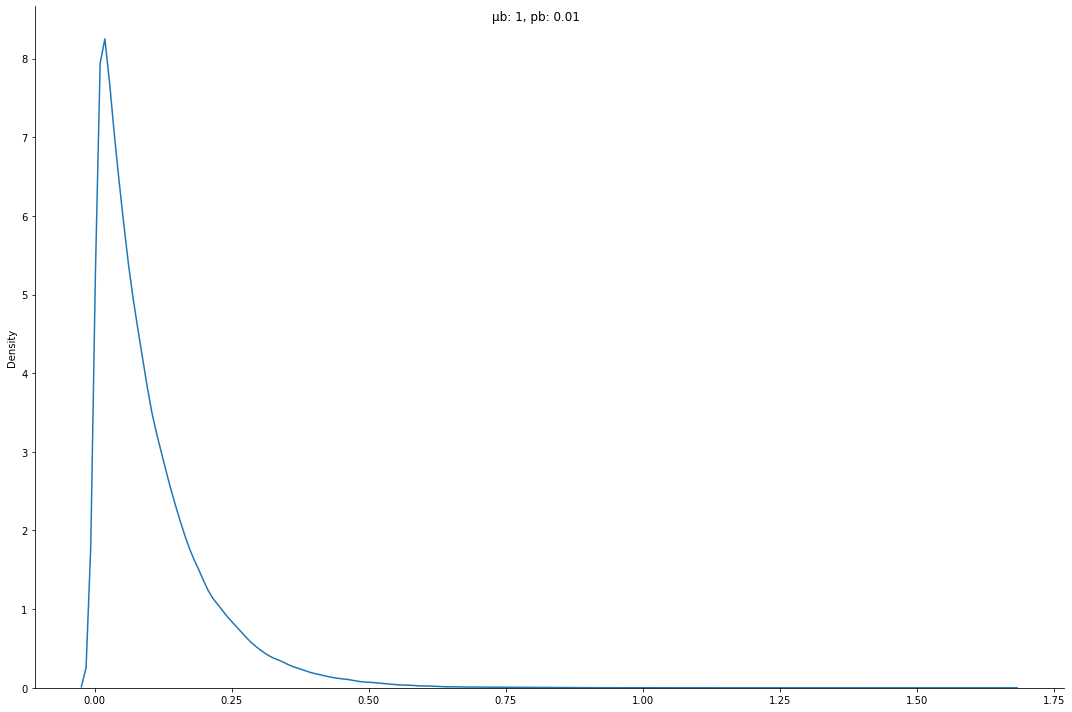

In [49]:
dist = sns.displot([b[1]-b[0] for b in idle_times[:-1]], kind='kde', height = 10, aspect = 1.5)
dist.fig.suptitle('µb: '+str(mu_b)+', pb: '+str(pb))
plt.show()

In [38]:
print('µb: '+str(mu_b)+', pb: '+str(pb))

µ


In [69]:
table = [['']]
max_n = 10
table[0] += [i for i in range(max_n)]
for xb in range(max_n):
    temp_row = [xb]
    for xa in range (max_n):
        #approx = calc_t(xb,xa)
        approx = calc_t_plus(xb,xa,False)
        '''sim = []
        if xb == 0 and xa == 0:
            sim = [0 for i in range(20)]
        else:
            sim = [mean(a[0][xb][xa]) for a in abss]'''
        sim = [mean(a[1][xb][xa]) for a in abss]
        #print(xb)
        #print(xa)
        conf = sct.t.interval(alpha=0.95, df=len(sim)-1, loc=np.mean(sim), scale=sct.sem(sim))
        if approx >= conf[0] and approx <= conf[1]:
            temp_row.append('IN')
            continue
        #temp_row.append((round(approx,3),''+str(round(conf[0],3))+'-'+str(round(conf[1],3))))
        #temp_row.append(check)
        #if xb == 0 and xa == 0:
        #    temp_row.append('IN')
        elif approx < conf[0]:
            temp_row.append(round(approx-conf[0],3))
        else:
            temp_row.append(round(approx-conf[1],3))
    table.append(temp_row)
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════╤════════╤════════╤════════╤════════╤════════╤════════╤═════╤═════╤═════╤════════╕
│    │      0 │ 1      │ 2      │ 3      │ 4      │ 5      │ 6   │ 7   │ 8   │ 9      │
╞════╪════════╪════════╪════════╪════════╪════════╪════════╪═════╪═════╪═════╪════════╡
│  0 │  0.226 │ IN     │ -0.001 │ 0.001  │ IN     │ IN     │ IN  │ IN  │ IN  │ IN     │
├────┼────────┼────────┼────────┼────────┼────────┼────────┼─────┼─────┼─────┼────────┤
│  1 │  0.16  │ IN     │ IN     │ IN     │ IN     │ IN     │ IN  │ IN  │ IN  │ IN     │
├────┼────────┼────────┼────────┼────────┼────────┼────────┼─────┼─────┼─────┼────────┤
│  2 │  0.099 │ -0.005 │ -0.0   │ IN     │ IN     │ IN     │ IN  │ IN  │ IN  │ IN     │
├────┼────────┼────────┼────────┼────────┼────────┼────────┼─────┼─────┼─────┼────────┤
│  3 │  0.044 │ -0.013 │ -0.001 │ IN     │ IN     │ IN     │ IN  │ IN  │ IN  │ IN     │
├────┼────────┼────────┼────────┼────────┼────────┼────────┼─────┼─────┼─────┼────────┤
│  4 │ -0.005 │ -0.025 │ -0.006 

In [45]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│    │ 0     │ 1     │ 2     │ 3     │ 4     │
╞════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│  0 │ False │ True  │ True  │ False │ True  │
├────┼───────┼───────┼───────┼───────┼───────┤
│  1 │ True  │ True  │ True  │ True  │ True  │
├────┼───────┼───────┼───────┼───────┼───────┤
│  2 │ False │ False │ False │ True  │ True  │
├────┼───────┼───────┼───────┼───────┼───────┤
│  3 │ False │ False │ False │ True  │ True  │
├────┼───────┼───────┼───────┼───────┼───────┤
│  4 │ False │ False │ False │ False │ False │
╘════╧═══════╧═══════╧═══════╧═══════╧═══════╛


In [61]:
sim = [0 for i in range(20)]
sct.t.interval(alpha=0.95, df=len(sim)-1, loc=np.mean(sim), scale=sct.sem(sim))

(nan, nan)

In [42]:
[mean(a[0][xb][xa]) for a in abss]

StatisticsError: mean requires at least one data point